In [1]:
from shapely.geometry import Point
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from haversine import haversine
from datetime import datetime
import seaborn as sns
import matplotlib
from matplotlib.pyplot import figure
#import geopandas as gpd
#from geopandas import GeoDataFrame

In [2]:
df = pd.read_csv(r'../../data/tidy/vehicle-locations.csv', delimiter=',', skiprows=0, low_memory=False)

In [3]:
df.head()

ServiceDateTime  Unnamed: 0  DateKey             CalendarDate  Year  \
0  2022-04-04 06:43:24      112564     8763  2022-04-04 00:00:00.000  2022   
1  2022-04-04 06:51:27      109326     8763  2022-04-04 00:00:00.000  2022   
2  2022-04-04 06:51:27      112565     8763  2022-04-04 00:00:00.000  2022   
3  2022-04-04 06:52:52      109327     8763  2022-04-04 00:00:00.000  2022   
4  2022-04-04 06:54:33      109328     8763  2022-04-04 00:00:00.000  2022   

   Month  OpKey Operator  RtKey  RtKey2  ... Onboard Bike  Wheelchair Weekday  \
0      4      1    VATCo   3519    1006  ...       0    0           0       2   
1      4      1    VATCo   3513    3380  ...       1    0           0       2   
2      4      1    VATCo   3519    1006  ...       1    0           0       2   
3      4      1    VATCo   3513    3380  ...       1    0           0       2   
4      4      1    VATCo   3513    3380  ...       1    0           0       2   

   Hour  Minute Second        Date  Daytype      time  
0     6      43     24  2022-04-04  Weekday  06:43:24  
1     6      51     27  2022-04-04  Weekday  06:51:27  
2     6      51     27  2022-04-04  Weekday  06:51:27  
3     6      52     52  2022-04-04  Weekday  06:52:52  
4     6      54     33  2022-04-04  Weekday  06:54:33  

[5 rows x 35 columns]

In [4]:
df.tail()

ServiceDateTime  Unnamed: 0  DateKey             CalendarDate  \
1361544  2022-04-30 23:54:20     1325566     8789  2022-04-30 00:00:00.000   
1361545  2022-04-30 23:55:24     1325567     8789  2022-04-30 00:00:00.000   
1361546  2022-04-30 23:56:47     1325568     8789  2022-04-30 00:00:00.000   
1361547  2022-04-30 23:57:32     1325569     8789  2022-04-30 00:00:00.000   
1361548  2022-04-30 23:59:29     1325570     8789  2022-04-30 00:00:00.000   

         Year  Month  OpKey Operator  RtKey  RtKey2  ... Onboard Bike  \
1361544  2022      4      1    VATCo   3515    1001  ...       5    0   
1361545  2022      4      1    VATCo   3515    1001  ...       5    0   
1361546  2022      4      1    VATCo   3515    1001  ...       4    0   
1361547  2022      4      1    VATCo   3515    1001  ...       4    0   
1361548  2022      4      1    VATCo   3515    1001  ...       3    0   

         Wheelchair Weekday  Hour  Minute Second        Date  Daytype  \
1361544           0       7    23      54     20  2022-04-30  Weekend   
1361545           0       7    23      55     24  2022-04-30  Weekend   
1361546           0       7    23      56     47  2022-04-30  Weekend   
1361547           0       7    23      57     32  2022-04-30  Weekend   
1361548           0       7    23      59     29  2022-04-30  Weekend   

             time  
1361544  23:54:20  
1361545  23:55:24  
1361546  23:56:47  
1361547  23:57:32  
1361548  23:59:29  

[5 rows x 35 columns]

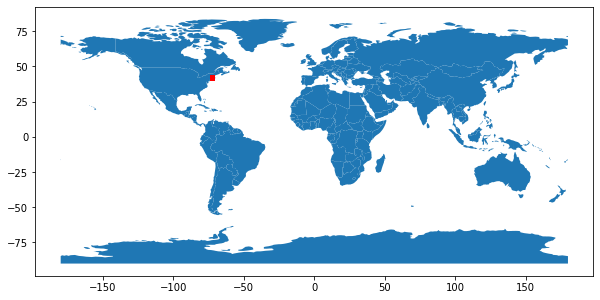

In [69]:
geometry = [Point(xy) for xy in zip(df['Lon'], df['Lat'])]
gdf = GeoDataFrame(df, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

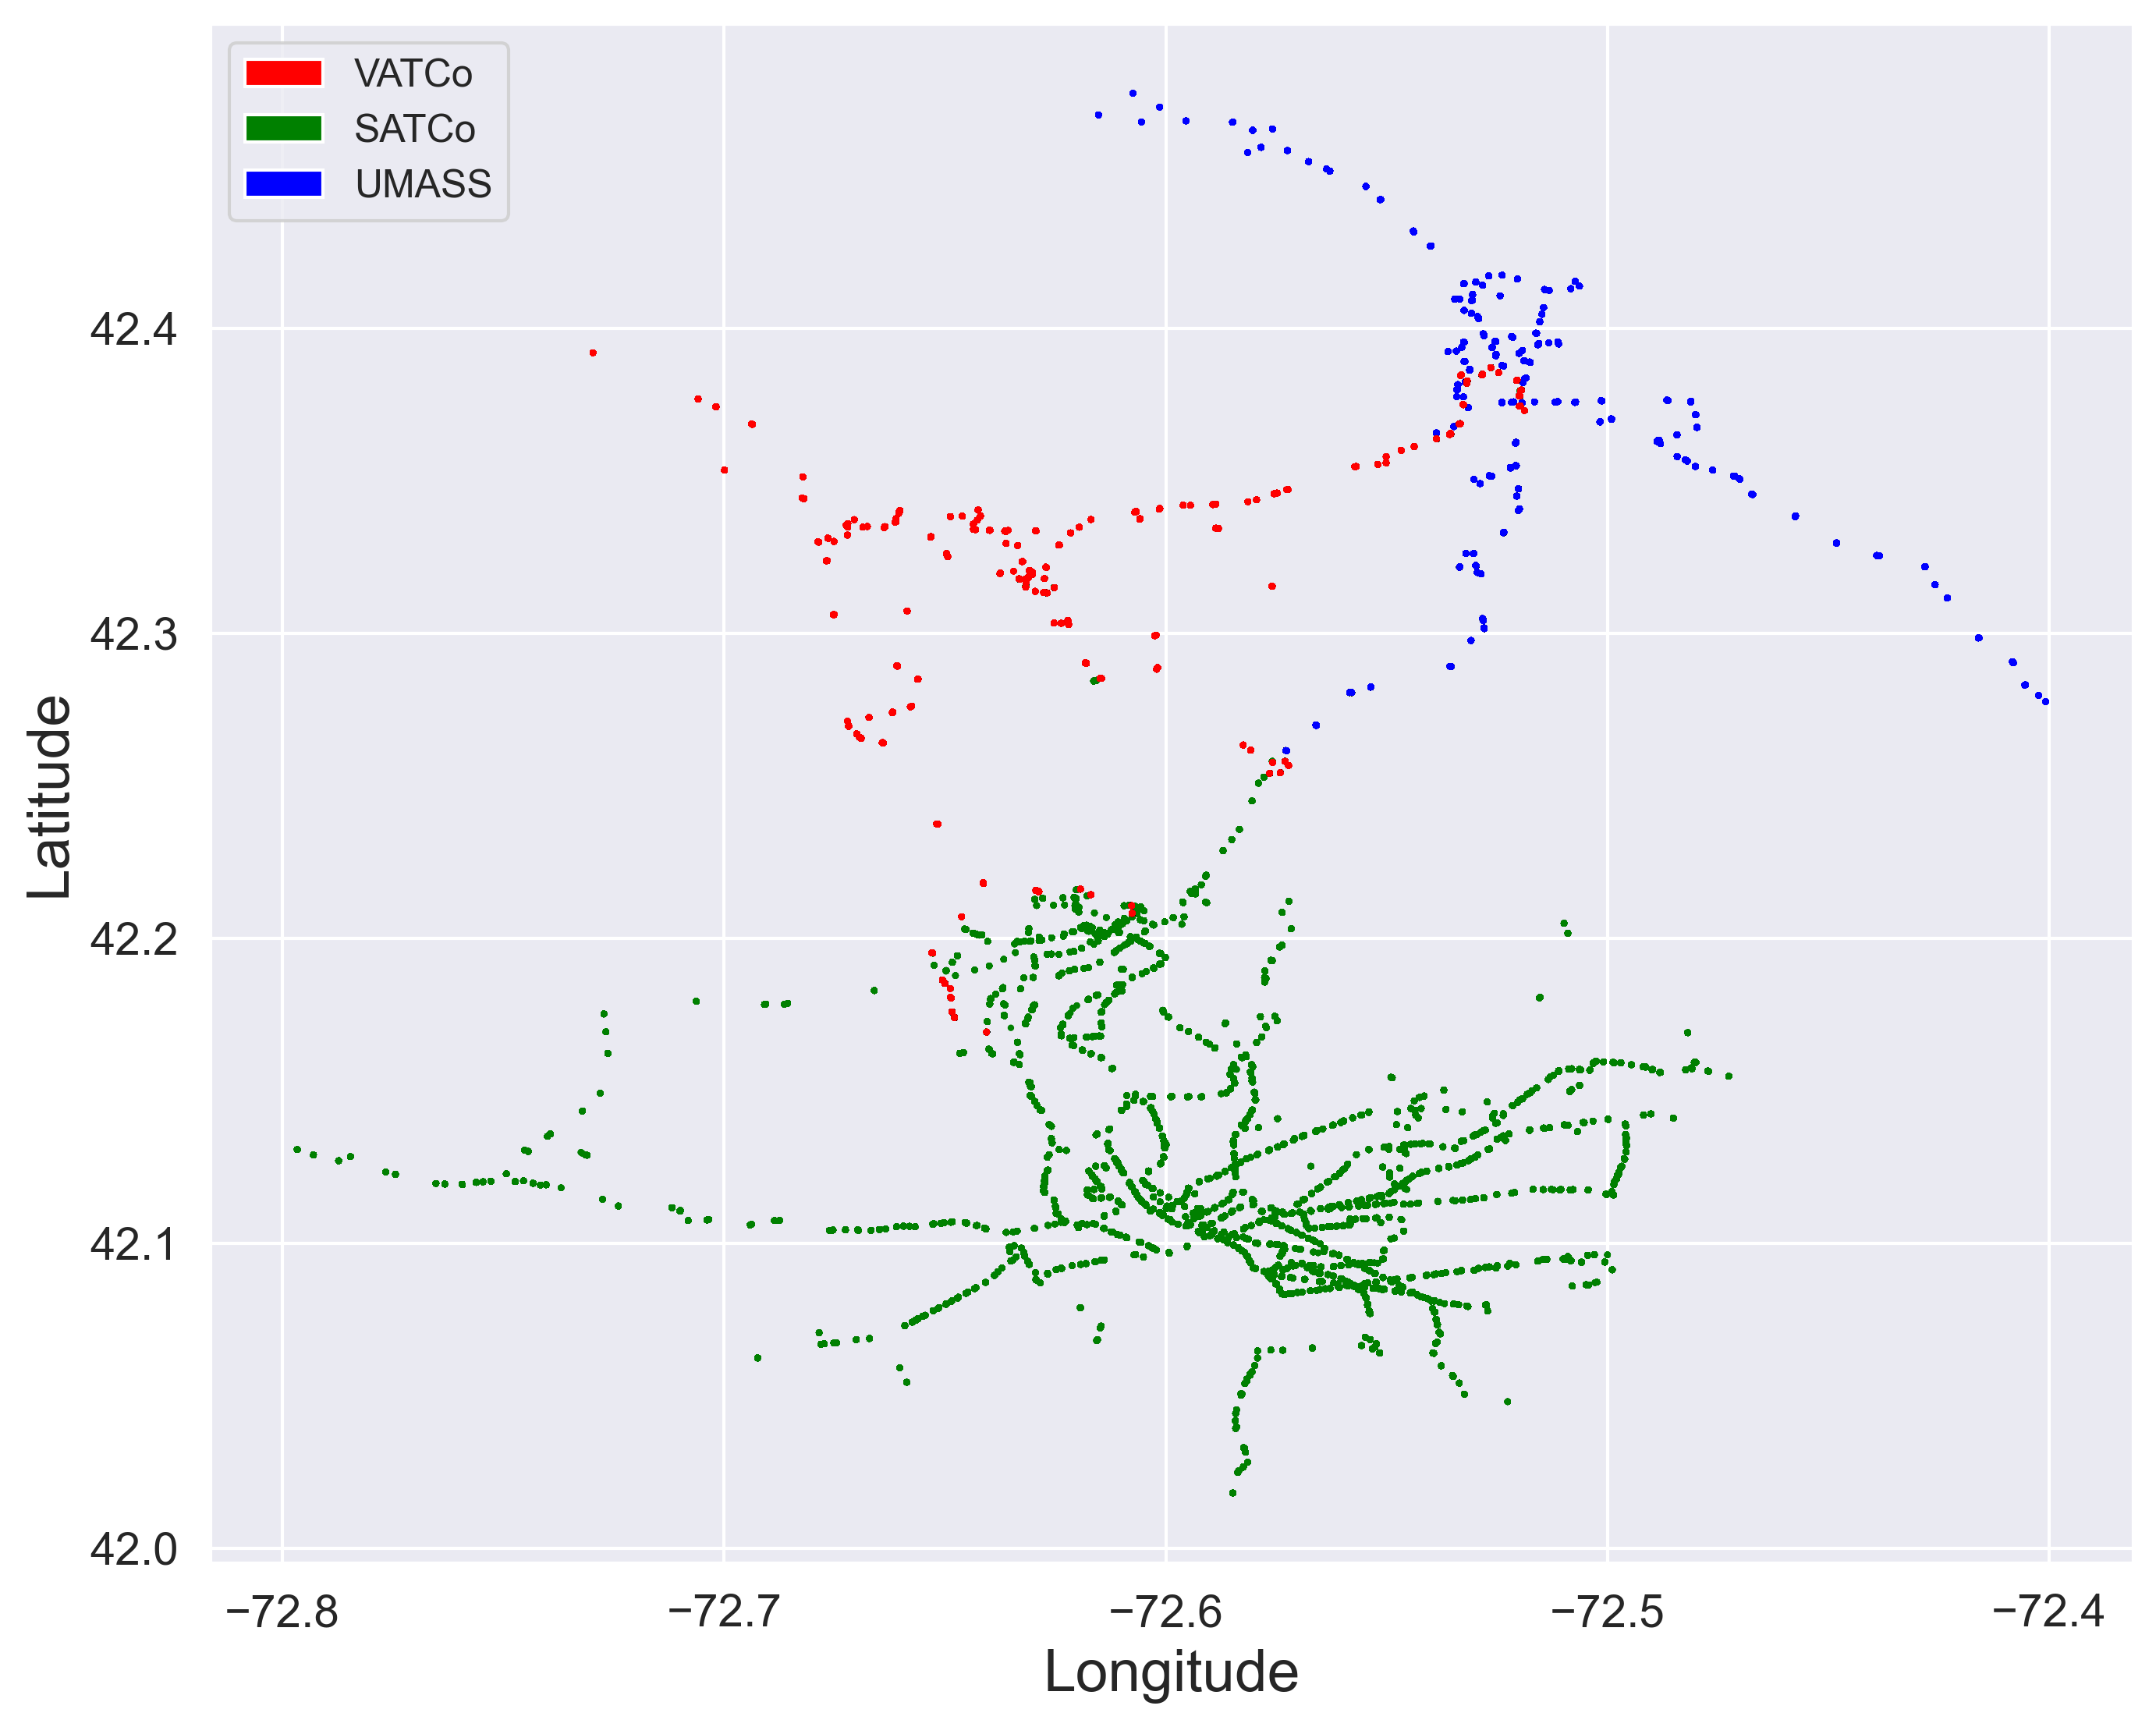

In [125]:
plt.figure(figsize=(10, 8), dpi=300)
colors = {'VATCo':'red', 'SATCo':'green', 'UMASS':'blue'}
plt.scatter(x=df['Lon'], y=df['Lat'], c= df['Operator'].map(colors), s=1)
plt.xlabel("Longitude", fontsize=18)
plt.ylabel("Latitude", fontsize=18)

circ1 = mpatches.Patch(facecolor='red',label='VATCo')
circ2= mpatches.Patch(facecolor='green',label='SATCo')
circ3 = mpatches.Patch(facecolor='blue',label='UMASS')

plt.legend(handles = [circ1,circ2,circ3],loc=2,fontsize=12)
plt.tight_layout()
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.savefig(r'../../figures/operators-stops.png', dpi=400, bbox_inches='tight')
plt.show()

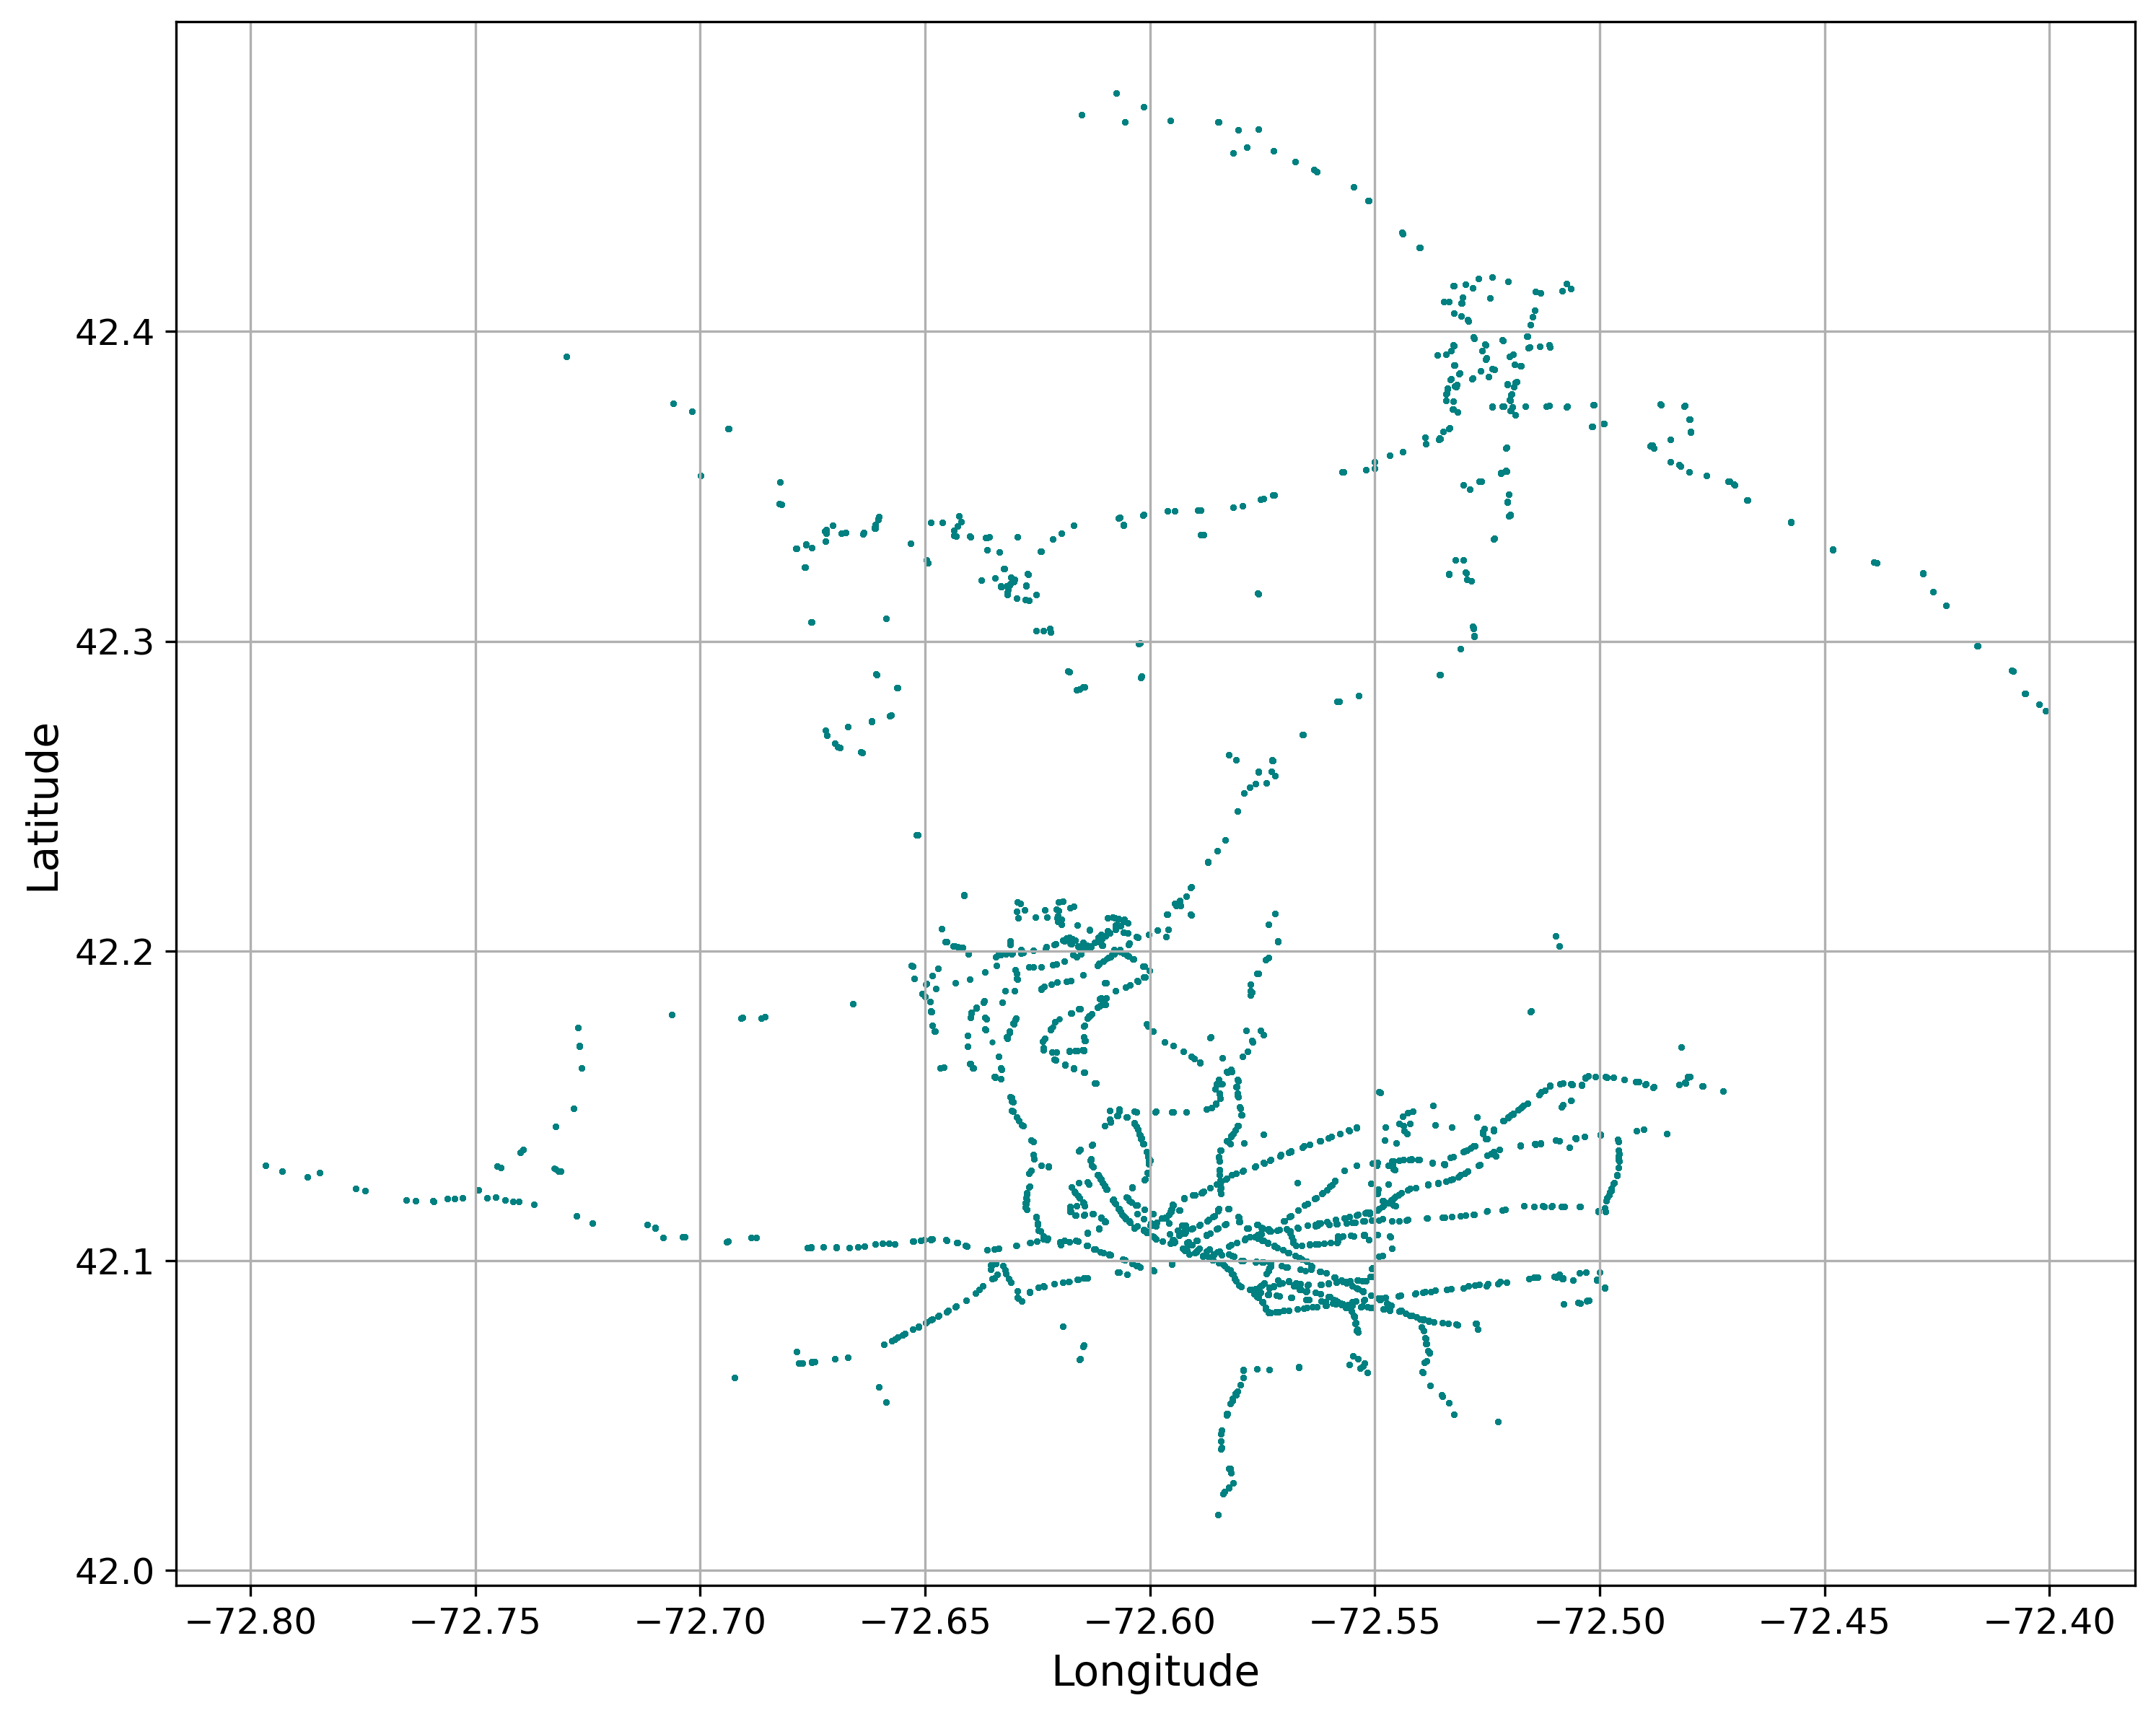

In [339]:
# ver02
plt.figure(figsize=(10, 8), dpi=300)
plt.scatter(x=df['Lon'], y=df['Lat'], s=1, color="teal")
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)

circ1 = mpatches.Patch(facecolor='red',label='VATCo')
circ2= mpatches.Patch(facecolor='green',label='SATCo')
circ3 = mpatches.Patch(facecolor='blue',label='UMASS')

#plt.legend(handles = [circ1,circ2,circ3],loc=2,fontsize=12)
plt.tight_layout()
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.grid()

plt.savefig(r'../../figures/operators-stops.png', dpi=400, bbox_inches='tight')
plt.show()

In [345]:
df.columns

Index(['ServiceDateTime', 'Unnamed: 0', 'DateKey', 'CalendarDate', 'Year',
       'Month', 'OpKey', 'Operator', 'RtKey', 'RtKey2', 'Route', 'RouteName',
       'TripKey', 'Trip', 'StopKey', 'Stop', 'StopName', 'Lat', 'Lon',
       'Vehicle', 'VehicleType', 'SeatedCap', 'TotalCap', 'Boards', 'Alights',
       'Onboard', 'Bike', 'Wheelchair', 'Weekday', 'Hour', 'Minute', 'Second',
       'Date', 'Daytype', 'time'],
      dtype='object')

In [6]:
len(df.Vehicle.unique())

178

In [7]:
df.Vehicle.unique()

array([1205, 1320, 1321, 1322, 1323, 1410, 1411, 1412, 1413, 1415, 1416,
       1420, 1421, 1552, 1553, 1555, 1557, 1563, 1564, 1565, 1566, 1567,
       1568, 1571, 1572, 1574, 1575, 1576, 1577, 1578, 1619, 1640, 1642,
       1643, 1644, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656,
       1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1670, 1671, 1672,
       1701, 1710, 1711, 1712, 1714, 1715, 1716, 1717, 1718, 1719, 1720,
       1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 1801, 1802,
       1803, 1804, 1805, 1811, 1812, 1813, 1814, 1815, 1817, 1819, 1821,
       1822, 1823, 1824, 1825, 1826, 1831, 1832, 1833, 1834, 1835, 1836,
       1837, 1840, 1841, 1842, 1843, 1844, 1845, 1847, 1848, 1849, 1850,
       1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861,
       1862, 1864, 3212, 3221, 3222, 3223, 3225, 3226, 3228, 3301, 3302,
       3303, 3304, 3305, 3306, 3307, 3308, 3309, 3310, 3311, 3312, 3313,
       3314, 3316, 3317, 3318, 3319, 3320, 3321, 33

In [8]:
vehicles=df.Vehicle.unique()

In [9]:
df

ServiceDateTime  Unnamed: 0  DateKey             CalendarDate  \
0        2022-04-04 06:43:24      112564     8763  2022-04-04 00:00:00.000   
1        2022-04-04 06:51:27      109326     8763  2022-04-04 00:00:00.000   
2        2022-04-04 06:51:27      112565     8763  2022-04-04 00:00:00.000   
3        2022-04-04 06:52:52      109327     8763  2022-04-04 00:00:00.000   
4        2022-04-04 06:54:33      109328     8763  2022-04-04 00:00:00.000   
...                      ...         ...      ...                      ...   
1361544  2022-04-30 23:54:20     1325566     8789  2022-04-30 00:00:00.000   
1361545  2022-04-30 23:55:24     1325567     8789  2022-04-30 00:00:00.000   
1361546  2022-04-30 23:56:47     1325568     8789  2022-04-30 00:00:00.000   
1361547  2022-04-30 23:57:32     1325569     8789  2022-04-30 00:00:00.000   
1361548  2022-04-30 23:59:29     1325570     8789  2022-04-30 00:00:00.000   

         Year  Month  OpKey Operator  RtKey  RtKey2  ... Onboard Bike  \
0        2022      4      1    VATCo   3519    1006  ...       0    0   
1        2022      4      1    VATCo   3513    3380  ...       1    0   
2        2022      4      1    VATCo   3519    1006  ...       1    0   
3        2022      4      1    VATCo   3513    3380  ...       1    0   
4        2022      4      1    VATCo   3513    3380  ...       1    0   
...       ...    ...    ...      ...    ...     ...  ...     ...  ...   
1361544  2022      4      1    VATCo   3515    1001  ...       5    0   
1361545  2022      4      1    VATCo   3515    1001  ...       5    0   
1361546  2022      4      1    VATCo   3515    1001  ...       4    0   
1361547  2022      4      1    VATCo   3515    1001  ...       4    0   
1361548  2022      4      1    VATCo   3515    1001  ...       3    0   

         Wheelchair Weekday  Hour  Minute Second        Date  Daytype  \
0                 0       2     6      43     24  2022-04-04  Weekday   
1                 0       2     6      51     27  2022-04-04  Weekday   
2                 0       2     6      51     27  2022-04-04  Weekday   
3                 0       2     6      52     52  2022-04-04  Weekday   
4                 0       2     6      54     33  2022-04-04  Weekday   
...             ...     ...   ...     ...    ...         ...      ...   
1361544           0       7    23      54     20  2022-04-30  Weekend   
1361545           0       7    23      55     24  2022-04-30  Weekend   
1361546           0       7    23      56     47  2022-04-30  Weekend   
1361547           0       7    23      57     32  2022-04-30  Weekend   
1361548           0       7    23      59     29  2022-04-30  Weekend   

             time  
0        06:43:24  
1        06:51:27  
2        06:51:27  
3        06:52:52  
4        06:54:33  
...           ...  
1361544  23:54:20  
1361545  23:55:24  
1361546  23:56:47  
1361547  23:57:32  
1361548  23:59:29  

[1361549 rows x 35 columns]

In [349]:
df.index

RangeIndex(start=0, stop=1361549, step=1)

In [350]:
df['ServiceDateTime']= pd.to_datetime(df['ServiceDateTime'])

In [351]:
df['time_delta'] = df.groupby(['Vehicle', 'Date'])['ServiceDateTime'].diff()

In [352]:
df.time_delta=df.time_delta.astype(str).str.replace('0 days ', '')

In [353]:
df['time_delta']= pd.to_datetime(df['time_delta'])

In [354]:
df['time_delta_in_seconds'] = df['time_delta'].dt.hour * 3600 + df['time_delta'].dt.minute * 60 + df['time_delta'].dt.second

In [355]:
df.sort_values(by=['Vehicle','ServiceDateTime'], ascending=True, inplace=True)

In [356]:
#calculating distances by unique vehicle Id and unique day
dist=[]
for i in df.index:
    if i==0:
        dist.append(0) 
    else:
        if df['Vehicle'].loc[i]==df['Vehicle'].loc[i-1]:
            if df['Date'].loc[i]==df['Date'].loc[i-1]:           
                coordinate_x = (df['Lon'].loc[i] ,df['Lat'].loc[i]) # (lat, lon) for x
                coordinate_x_minus_1 = (df['Lon'].loc[i-1] ,df['Lat'].loc[i-1]) #(lat, lon) for x-1
                distance=haversine(coordinate_x_minus_1, coordinate_x, unit='mi')
                dist.append(distance) 
            else:
                dist.append(0) 
        else:   
            dist.append(0) 
df['dist'] = dist
#df.to_csv(r'../../results/computed-distances.csv')

In [357]:
#calculating speed by unique vehicle Id and unique day
speed=[]
for i in df.index:
    if i==0 or i==1:
        speed.append(0) 
    else:
        if df['Vehicle'].loc[i]==df['Vehicle'].loc[i-1]:
            if df['Date'].loc[i]==df['Date'].loc[i-1]:
                FMT = '%H:%M:%S'
                time_diff = abs(datetime.strptime(df['time'].loc[i-1], FMT) - datetime.strptime(df['time'].loc[i], FMT)).total_seconds() / 3600.0
                distance = df['dist'].loc[i]
                if time_diff==0:
                    speed.append(0) 
                else:
                    speed_current=distance/time_diff
                    if speed_current>=90:
                        speed.append(0) 
                    else:    
                        speed.append(speed_current) 
            else:
                speed.append(0) 
        else:   
            speed.append(0) 
df['speed'] = speed
#df.to_csv(r'../../results/computed-speeds.csv')

In [358]:
#calculating acceleration by unique vehicle Id and unique day
acc=[]
for i in df.index:
    if i==0 or i==1 or i==2:
        acc.append(0) 
    else:
        if df['Vehicle'].loc[i]==df['Vehicle'].loc[i-1]:
            if df['Date'].loc[i]==df['Date'].loc[i-1]:
                FMT = '%H:%M:%S'
                time_diff = abs(datetime.strptime(df['time'].loc[i-1], FMT) - datetime.strptime(df['time'].loc[i], FMT)).total_seconds() / 3600.0
                speed_diff = df['speed'].loc[i] - df['speed'].loc[i-1]
                if time_diff==0:
                    acc.append(0) 
                else:
                    acc_current=(speed_diff/time_diff)*0.00012417777777778 # 1 miles/h2 = 0.00012417777777778 m/s2
                    if -5<acc_current<5:
                        acc.append(acc_current)
                    else:
                        acc.append(0)
            else:
                acc.append(0) 
        else:   
            acc.append(0) 
df['acc'] = acc
df.to_csv(r'../../results/computed-trajectories.csv')

In [359]:
# Filtering all rows related to interval less than 2 seconds
df=df.drop(df[(df['time_delta_in_seconds'] !=0) & (df['time_delta_in_seconds']< 2)].index)
#df = df.loc[~((df['time_delta_in_seconds'] != 0) & (df['time_delta_in_seconds'] < 2)),:]

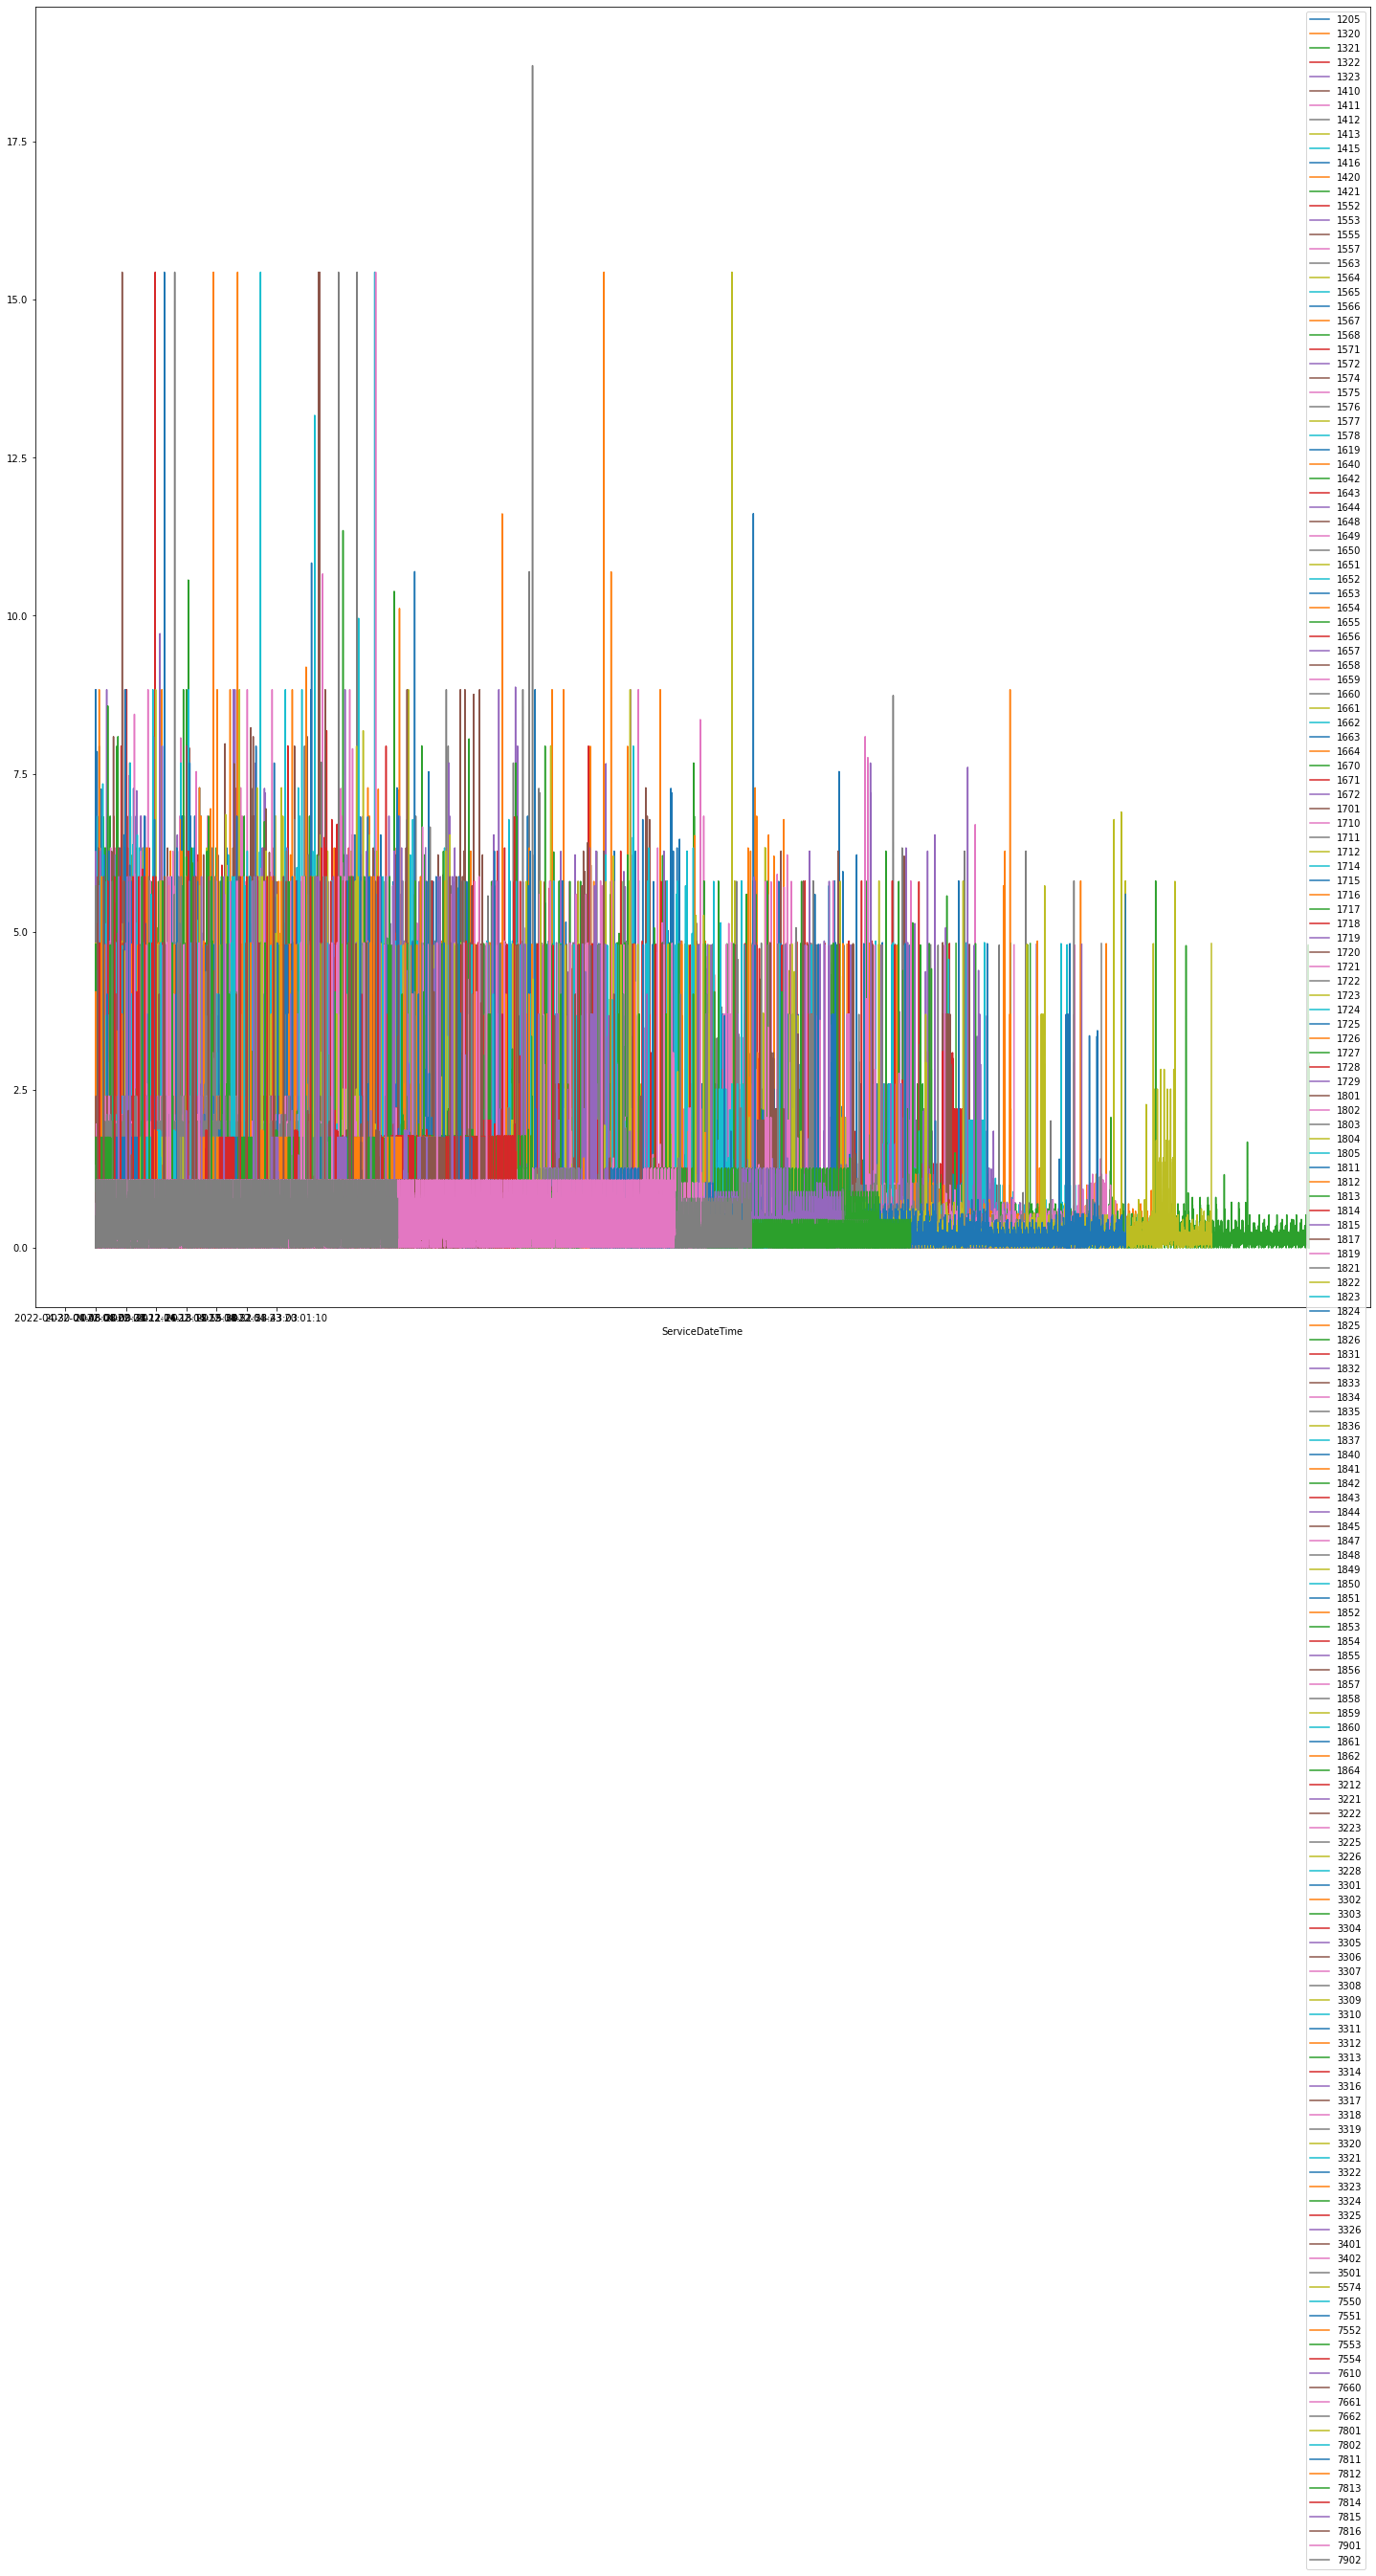

In [82]:
fig, ax = plt.subplots(figsize=(25,25))
for vehicle, gp in df.groupby('Vehicle'):
    gp.plot(x='ServiceDateTime', y='dist', ax=ax, label=vehicle)

In [83]:
#import seaborn as sns
#sns.lineplot(data=df, hue='Vehicle', x='ServiceDateTime', y='dist')

In [84]:
#import seaborn as sns
#sns.lineplot(data=df, hue='Vehicle', x='ServiceDateTime', y='speed')

In [85]:
#import seaborn as sns
#sns.lineplot(data=df, hue='Vehicle', x='ServiceDateTime', y='acc')

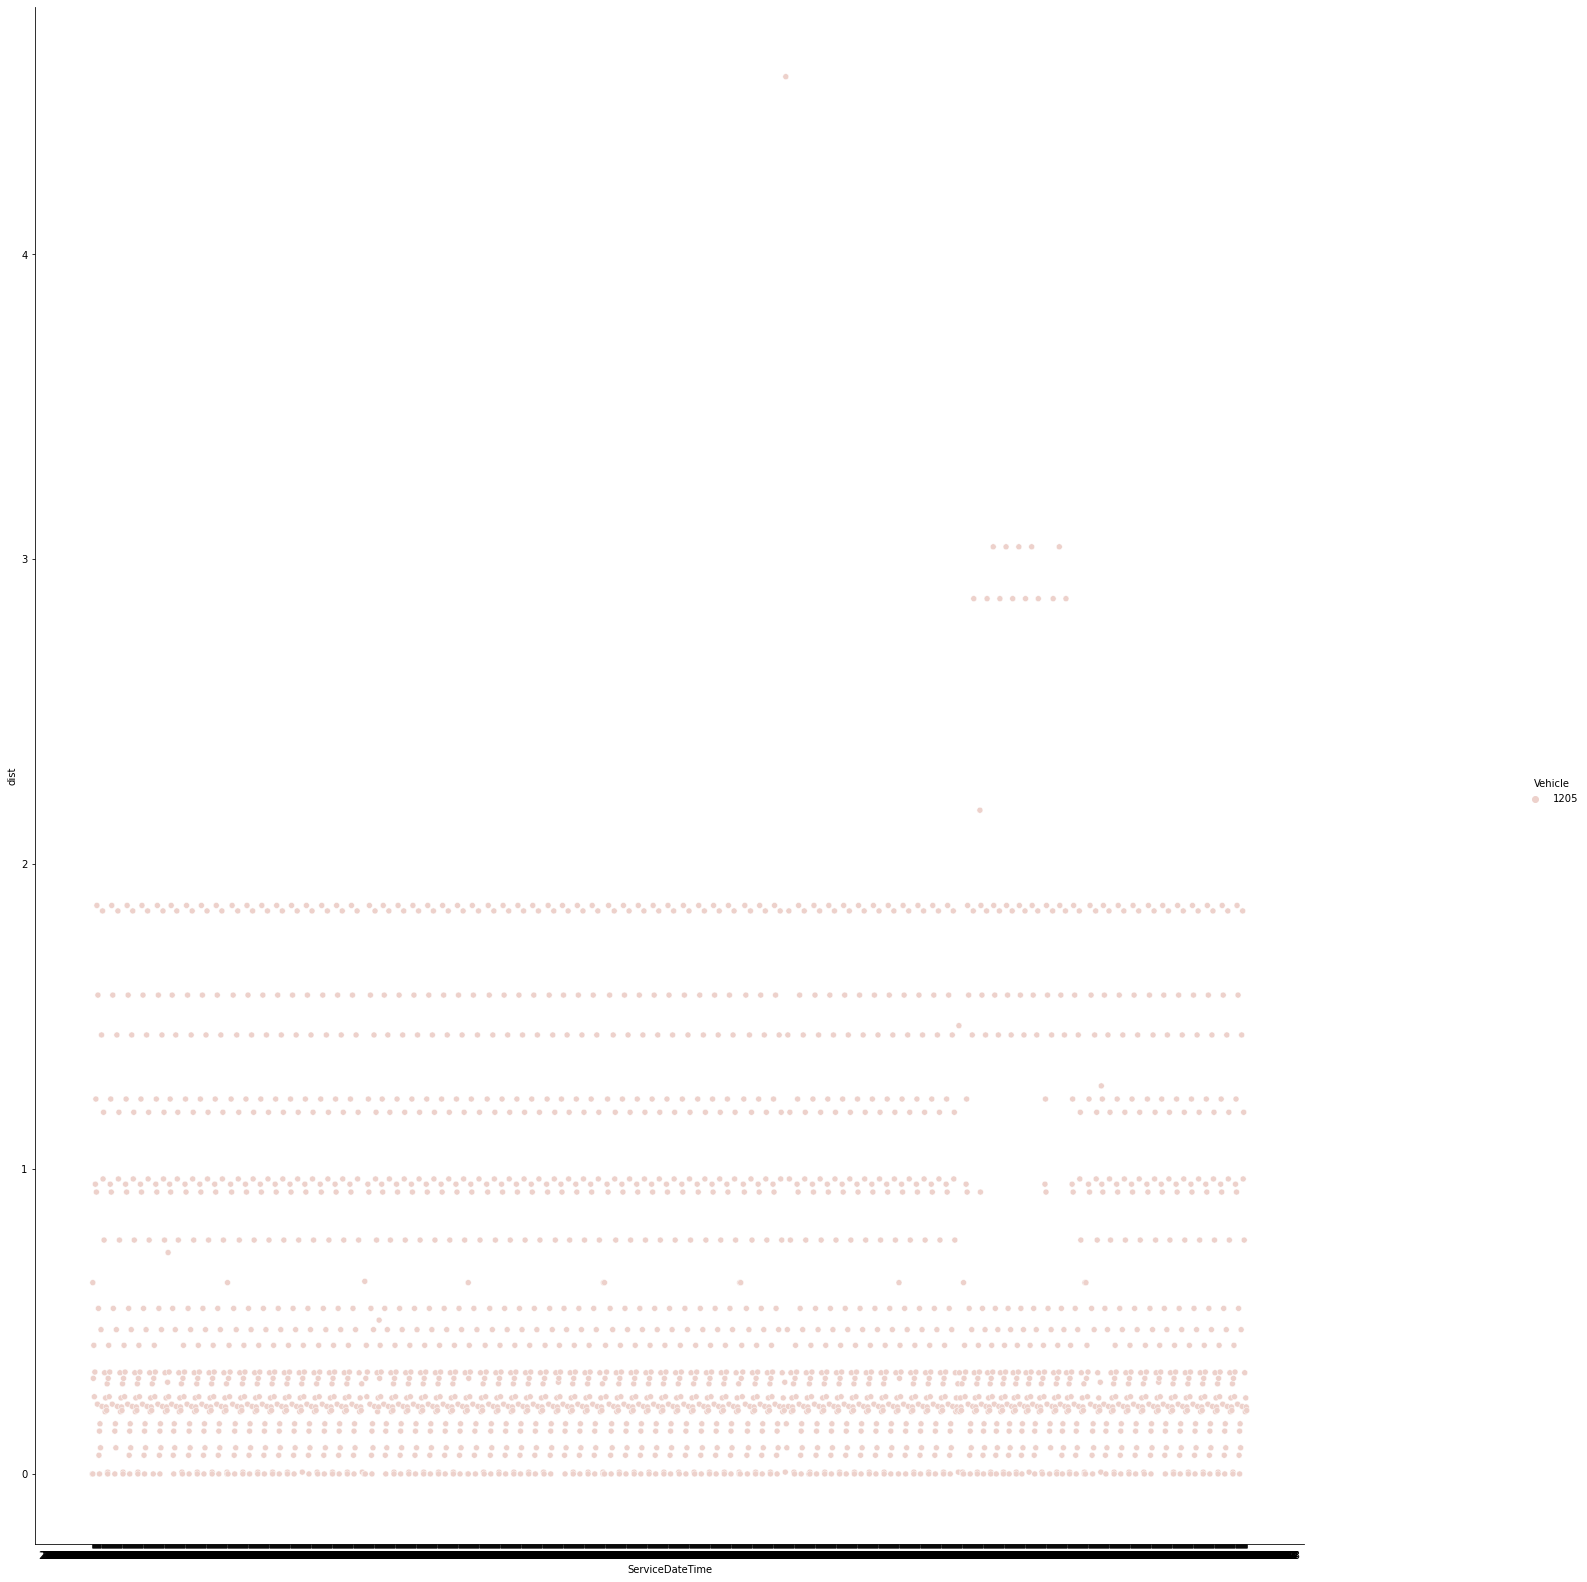

In [86]:
egs = [1205]
ax=sns.relplot(x='ServiceDateTime', y='dist',
            hue='Vehicle',
            data=df.loc[df.Vehicle.isin(egs)],
            kind='scatter', ci=None
           )
ax.fig.set_size_inches(25,25)

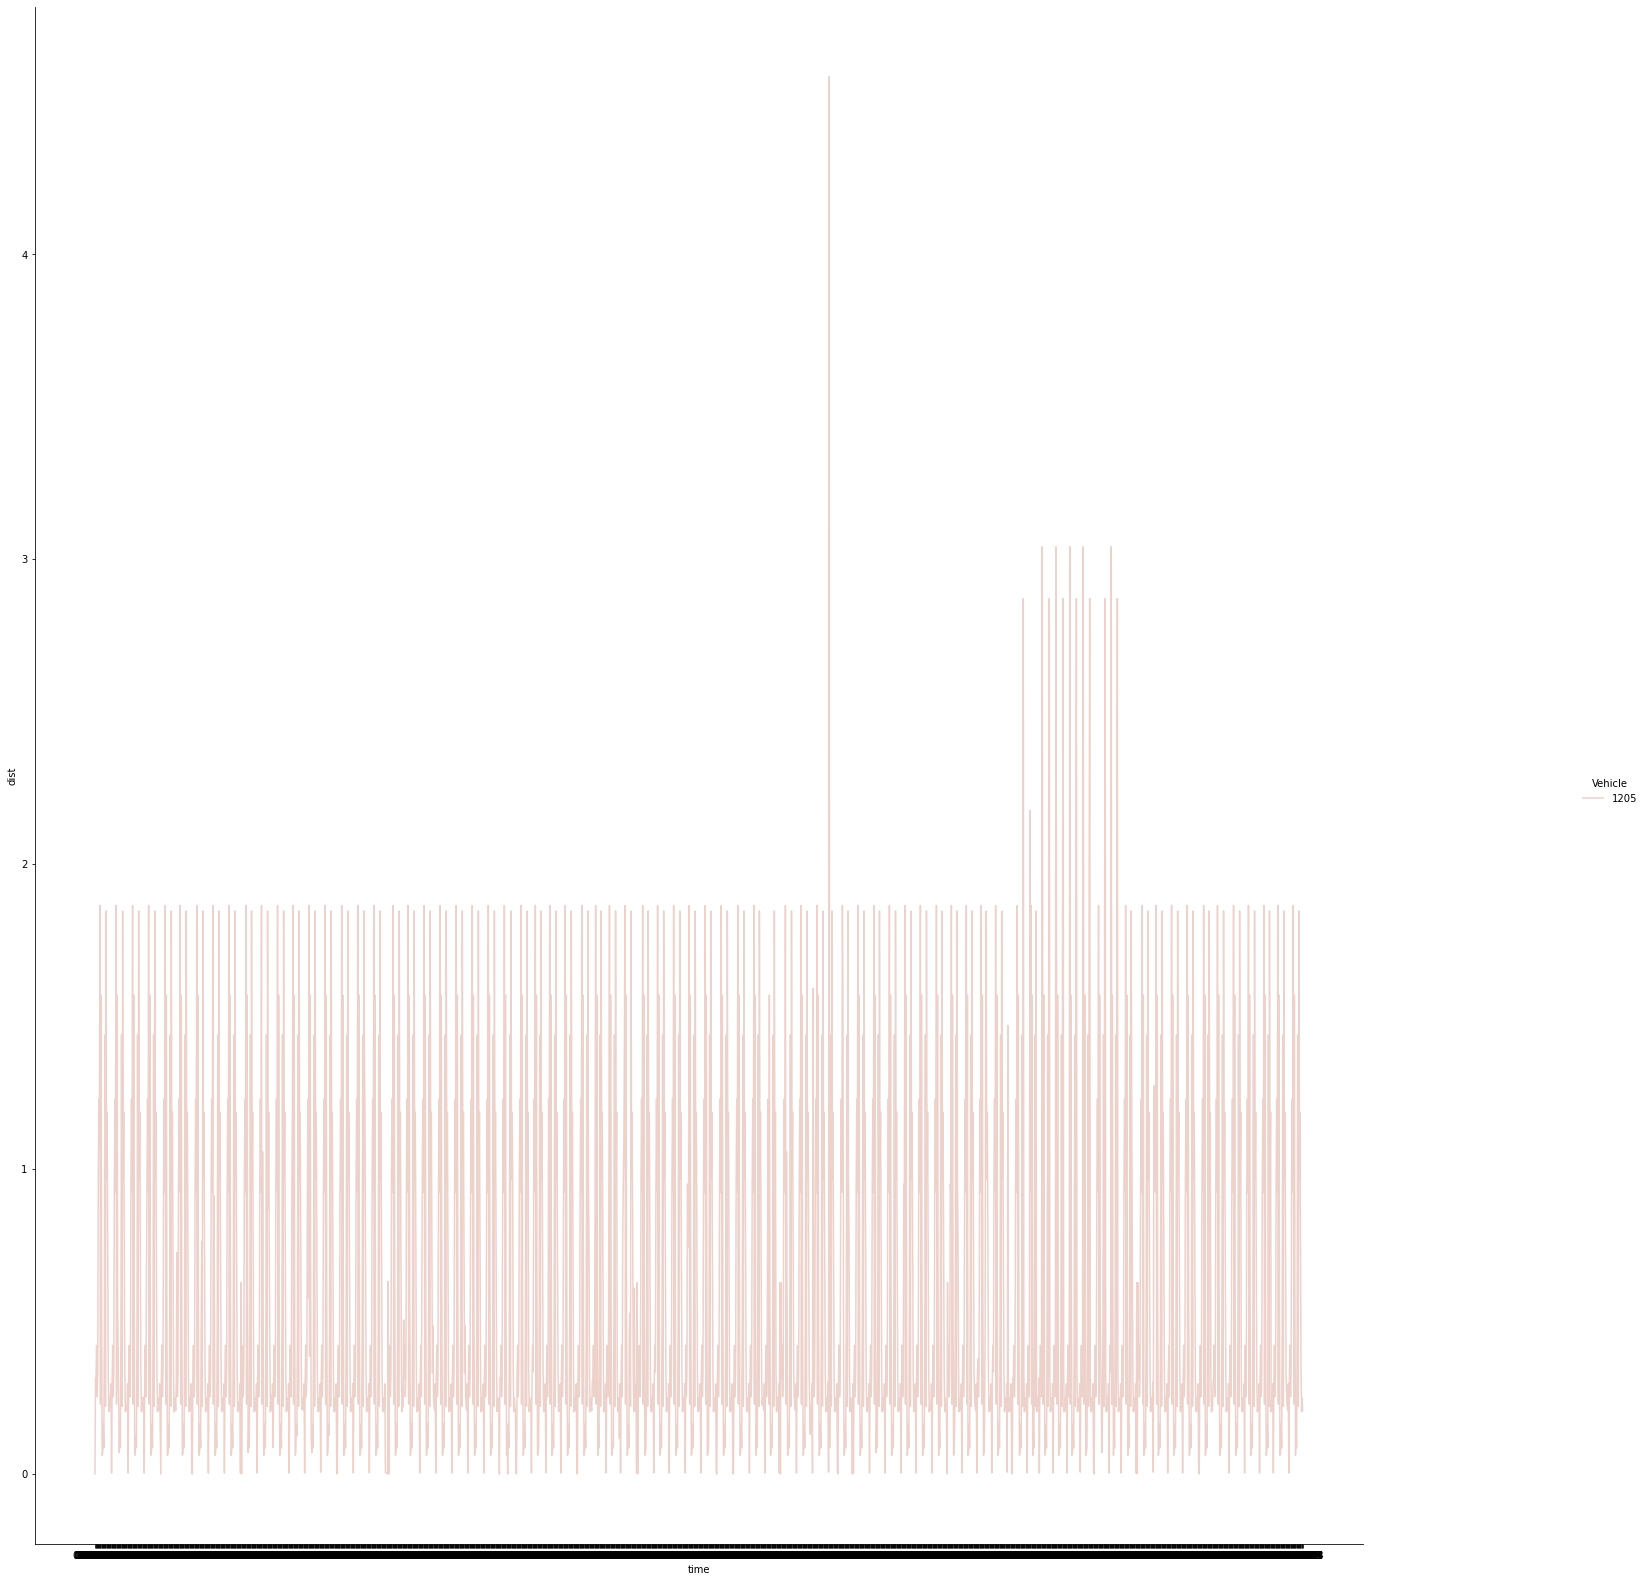

In [87]:
egs = [1205]
ax=sns.relplot(x='time', y='dist',
            hue='Vehicle',
            data=df.loc[df.Vehicle.isin(egs)],
            kind='line', ci=None
           )
ax.fig.set_size_inches(25,25)

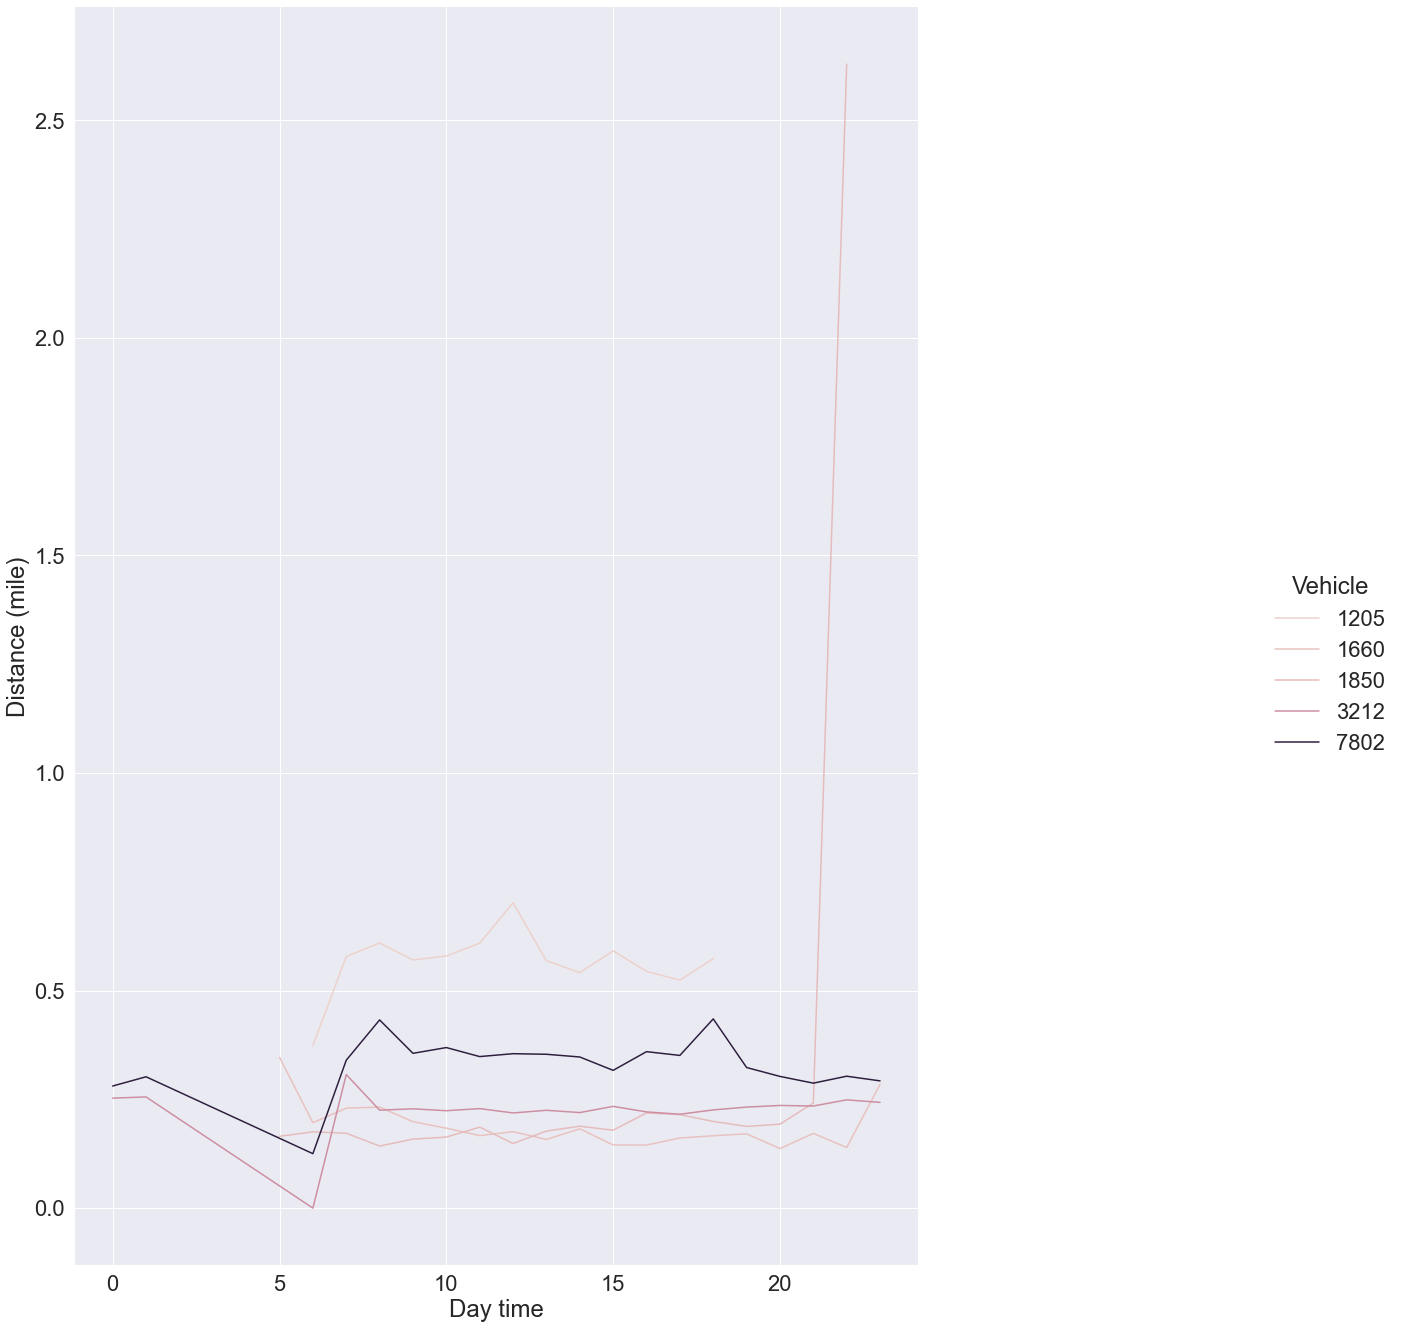

In [88]:
sns.set(font_scale=2)
egs = [1205, 1660, 1850, 3212, 7802]
ax=sns.relplot(x='Hour', y='dist',
            hue='Vehicle',
            data=df.loc[df.Vehicle.isin(egs)],
            kind='line', ci=None
           )
ax.fig.set_size_inches(25,25)
ax.set(ylabel='Distance (mile)', xlabel='Day time')
plt.show()

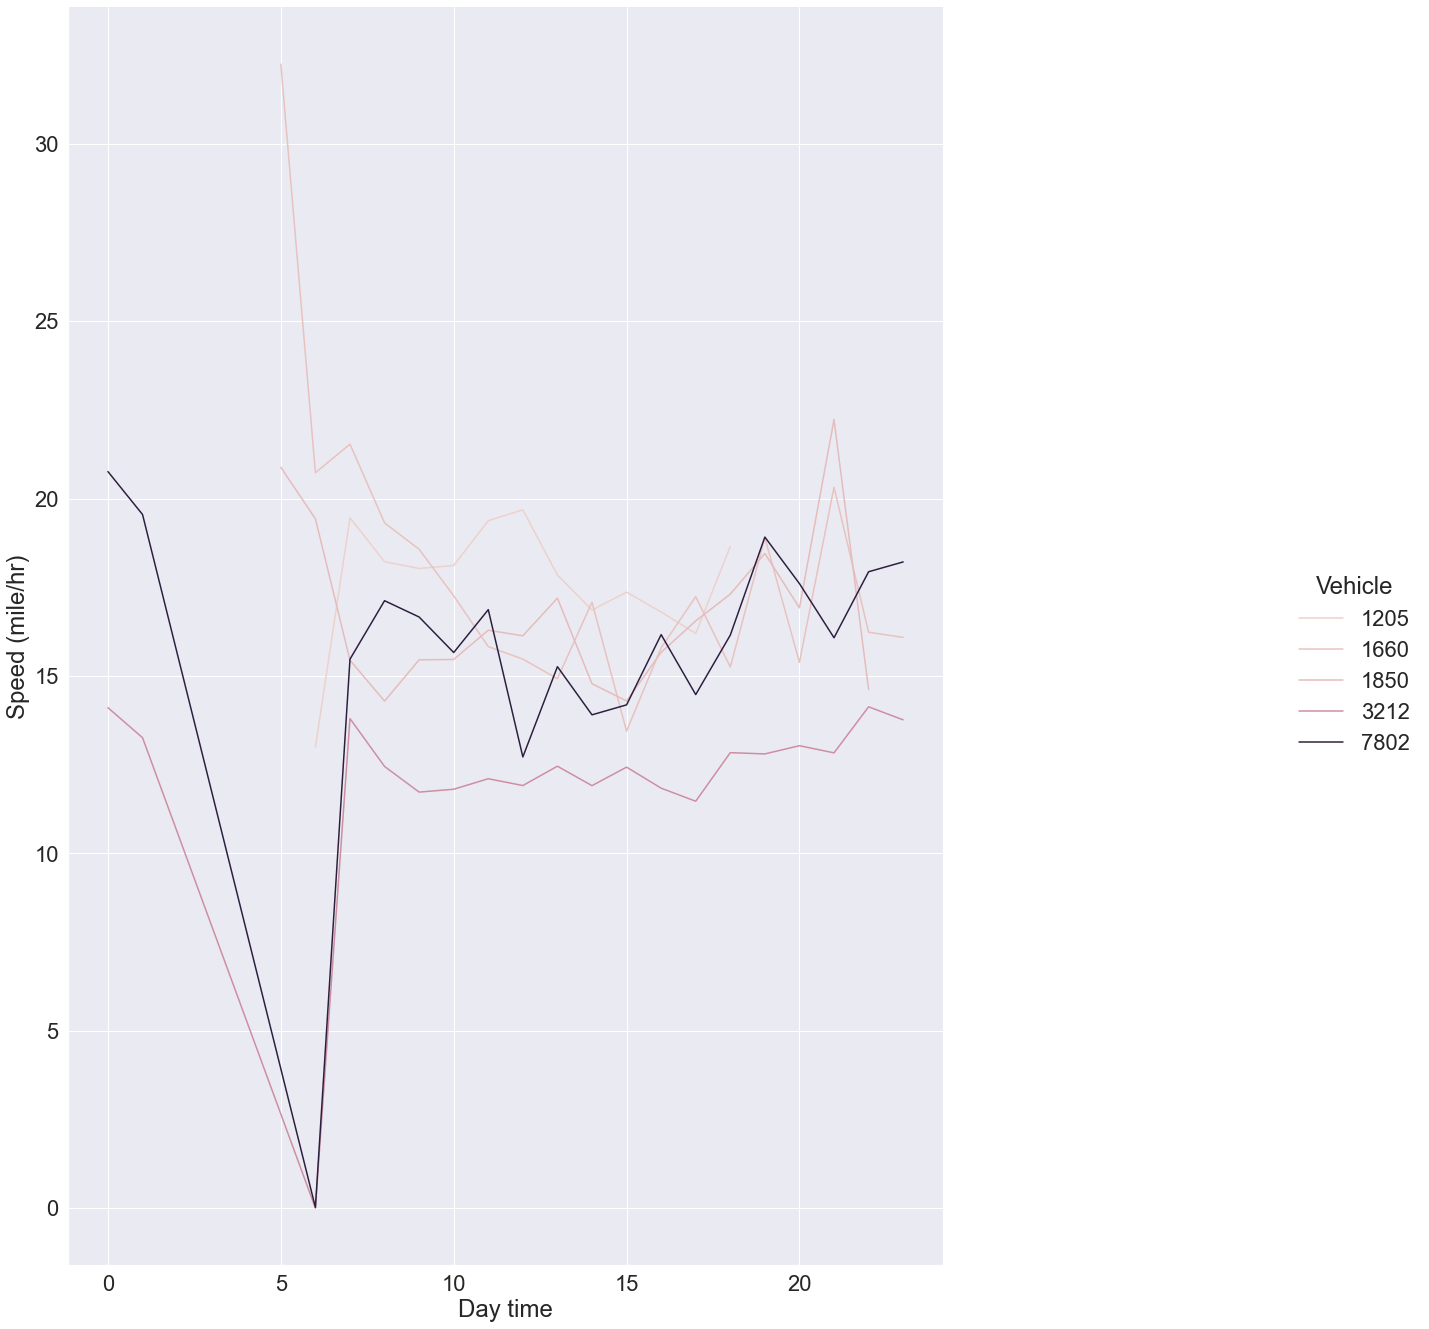

In [89]:
sns.set(font_scale=2)
egs = [1205, 1660, 1850, 3212, 7802]
ax=sns.relplot(x='Hour', y='speed',
            hue='Vehicle',
            data=df.loc[df.Vehicle.isin(egs)],
            kind='line', ci=None
           )
ax.fig.set_size_inches(25,25)
ax.set(ylabel='Speed (mile/hr)', xlabel='Day time')
plt.show()

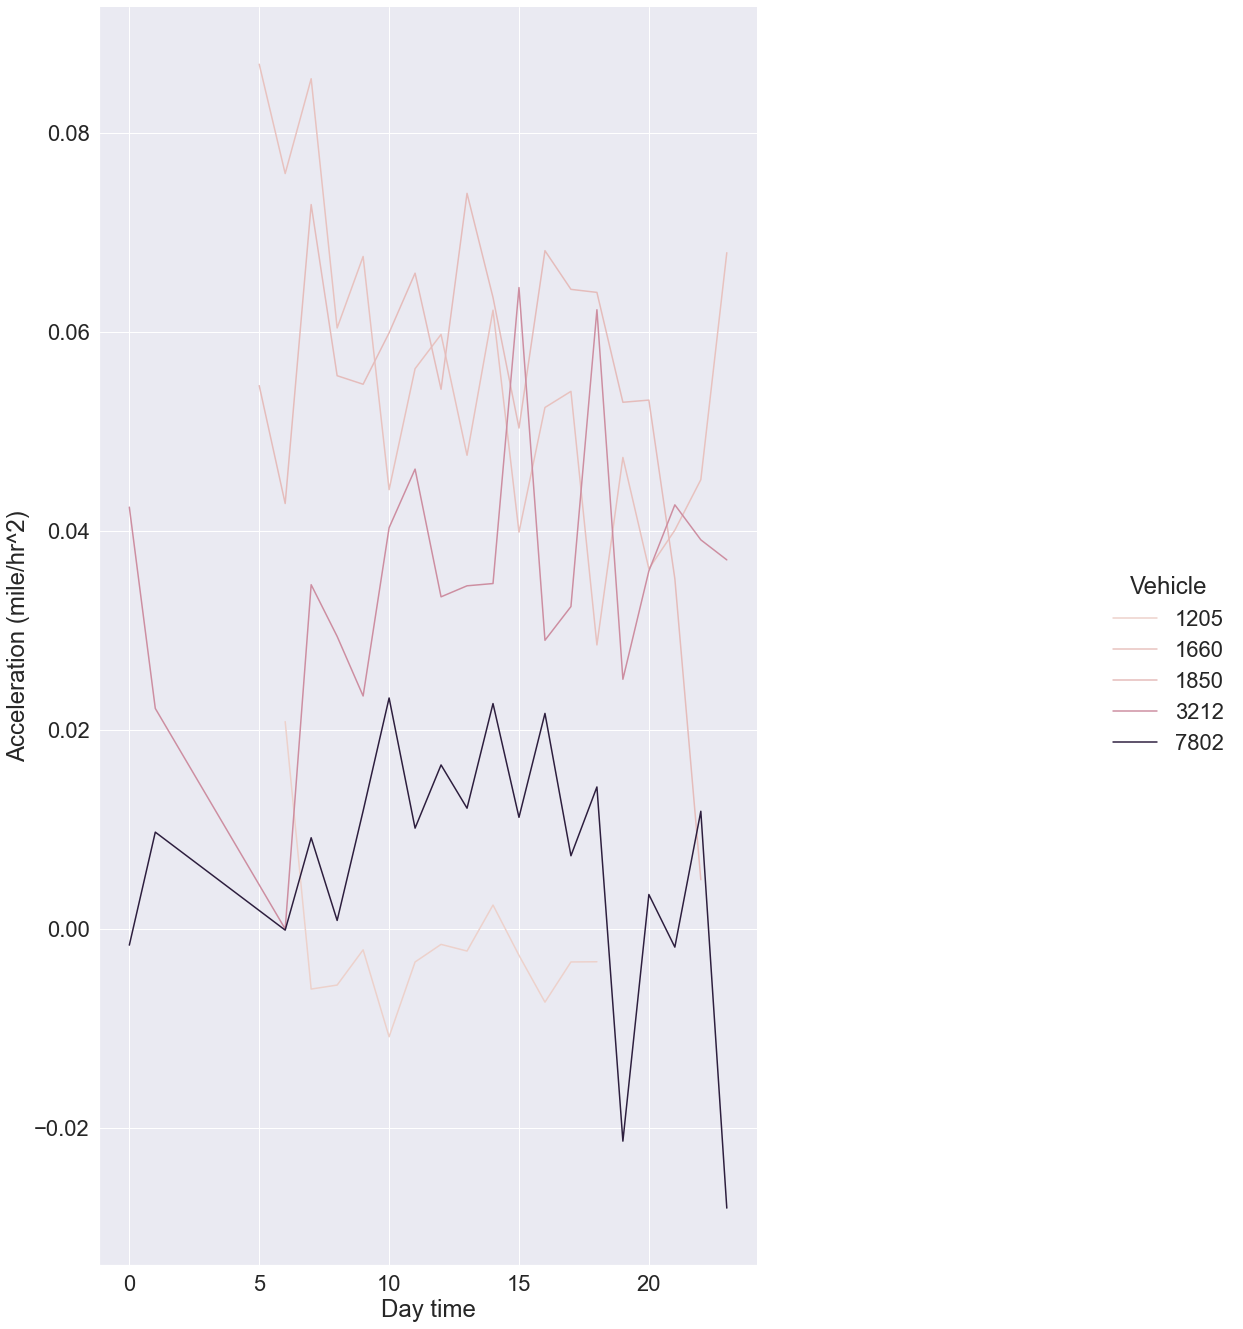

In [90]:
sns.set(font_scale=2)
egs = [1205, 1660, 1850, 3212, 7802]
ax=sns.relplot(x='Hour', y='acc',
            hue='Vehicle',
            data=df.loc[df.Vehicle.isin(egs)],
            kind='line', ci=None
           )
ax.fig.set_size_inches(25,25)
ax.set(ylabel='Acceleration (mile/hr^2)', xlabel='Day time')
plt.show()

In [91]:
#egs = [1205, 1660]
#sns.relplot(x='ServiceDateTime', y='speed',
#            hue='Vehicle',
#            data=df.loc[df.Vehicle.isin(egs)],
#            kind='line', ci=None
#           )

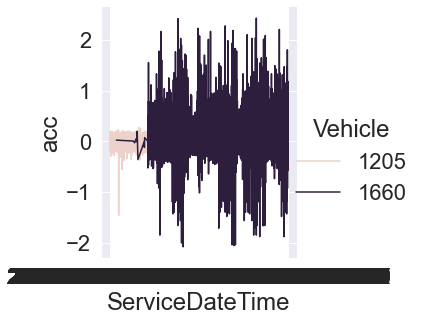

In [92]:
egs = [1205, 1660]
sns.relplot(x='ServiceDateTime', y='acc',
            hue='Vehicle',
            data=df.loc[df.Vehicle.isin(egs)],
            kind='line', ci=None
           )

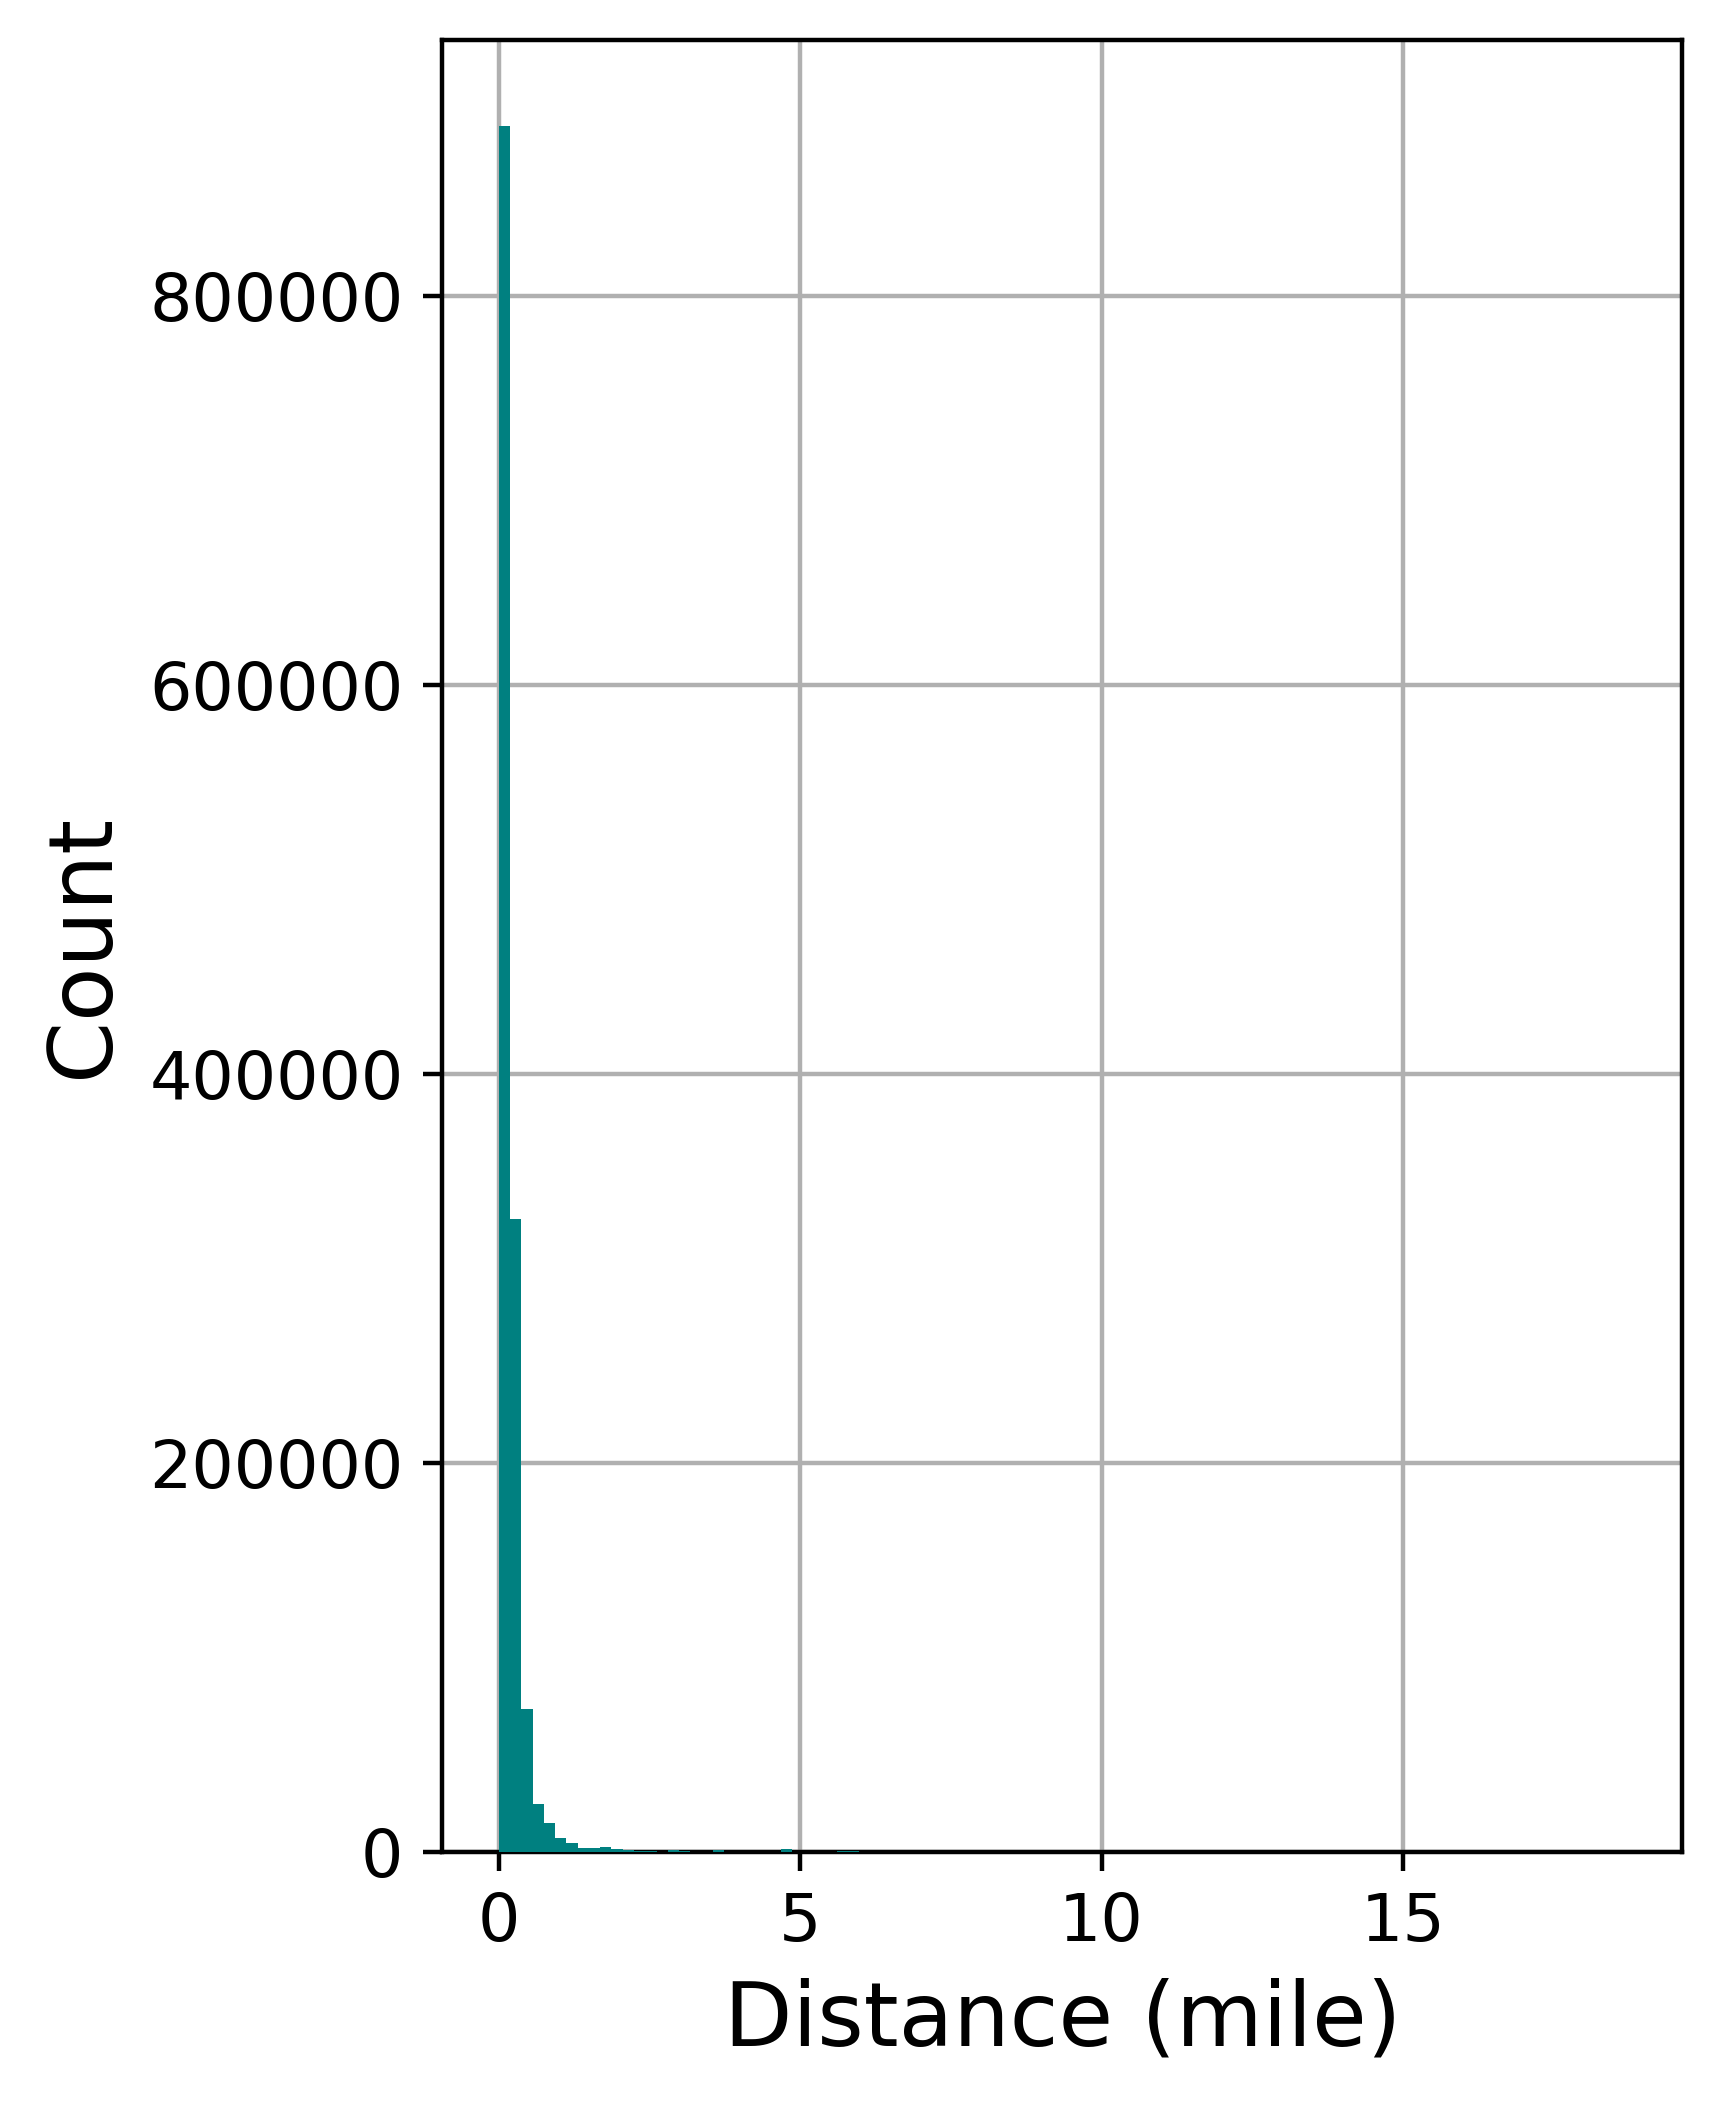

In [360]:
figure(figsize=(4 , 6), dpi=400)
ax=df['dist'].hist(bins=100, color='teal', zorder=3)
ax.set_xlabel('Distance (mile)', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig(r'../../figures/hist-trajectories-distance.png', dpi=400, bbox_inches='tight')

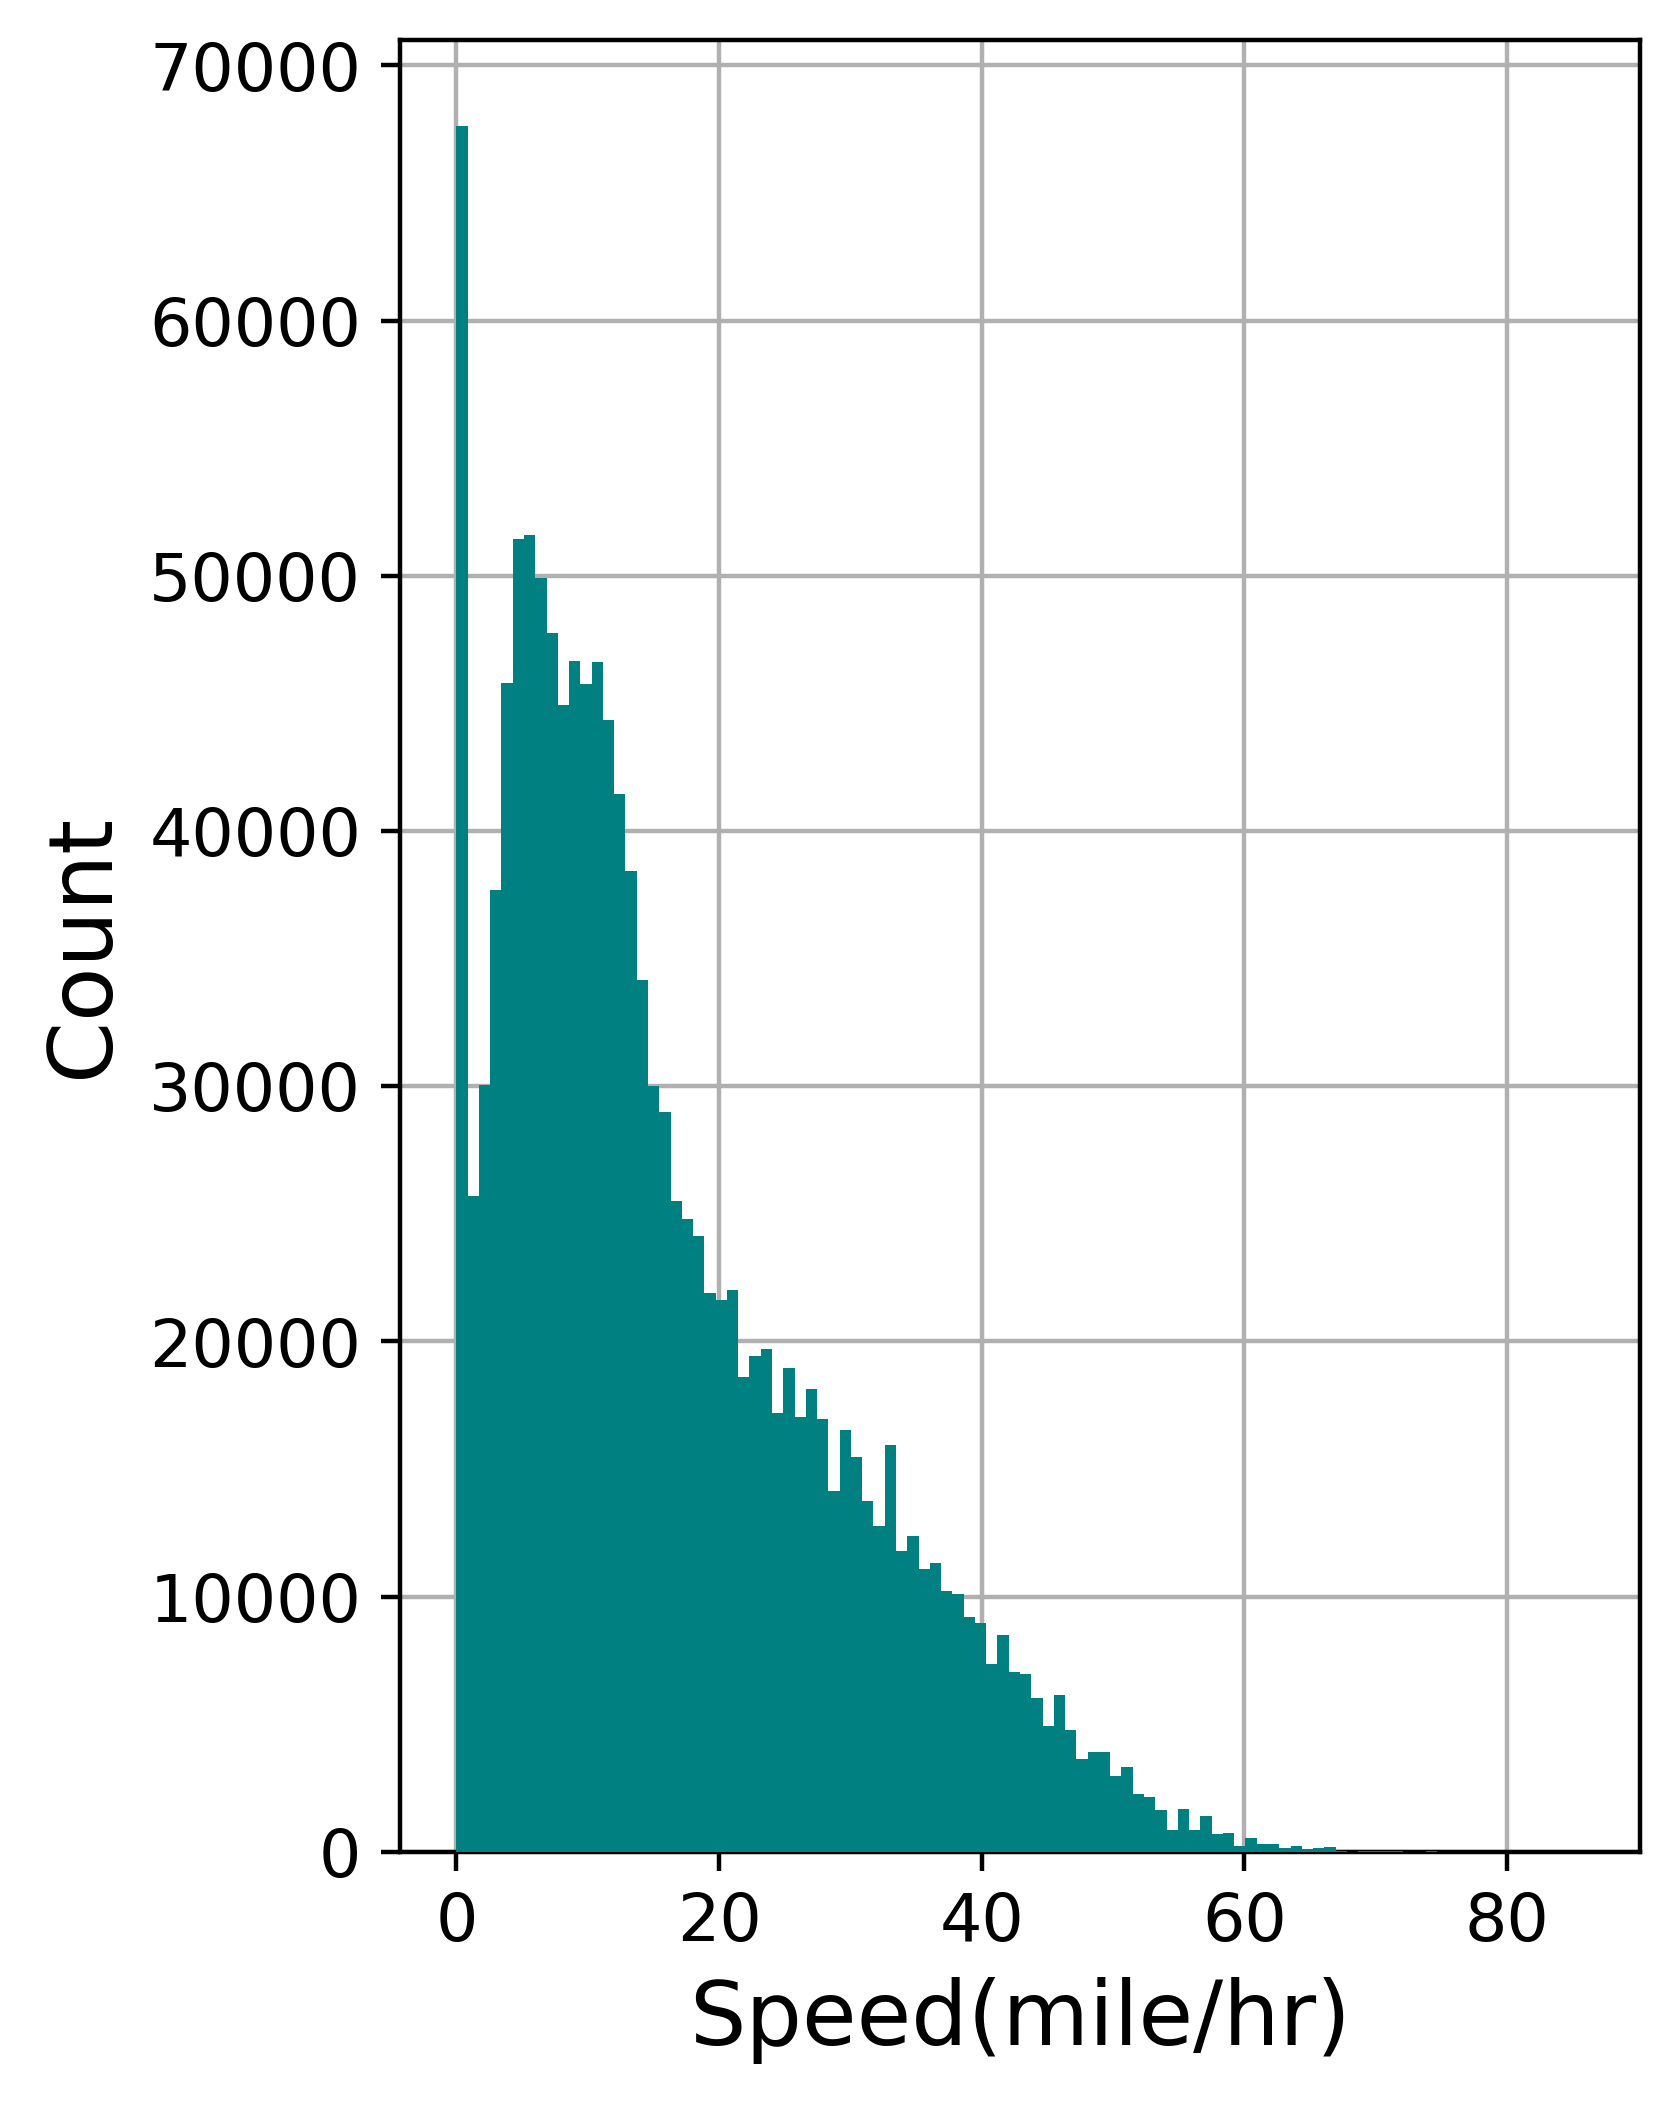

In [361]:
figure(figsize=(4 , 6), dpi=400)
ax=df['speed'].hist(bins=100, color='teal', zorder=3)
ax.set_xlabel('Speed(mile/hr)', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig(r'../../figures/hist-trajectories-speed.png', dpi=400, bbox_inches='tight')

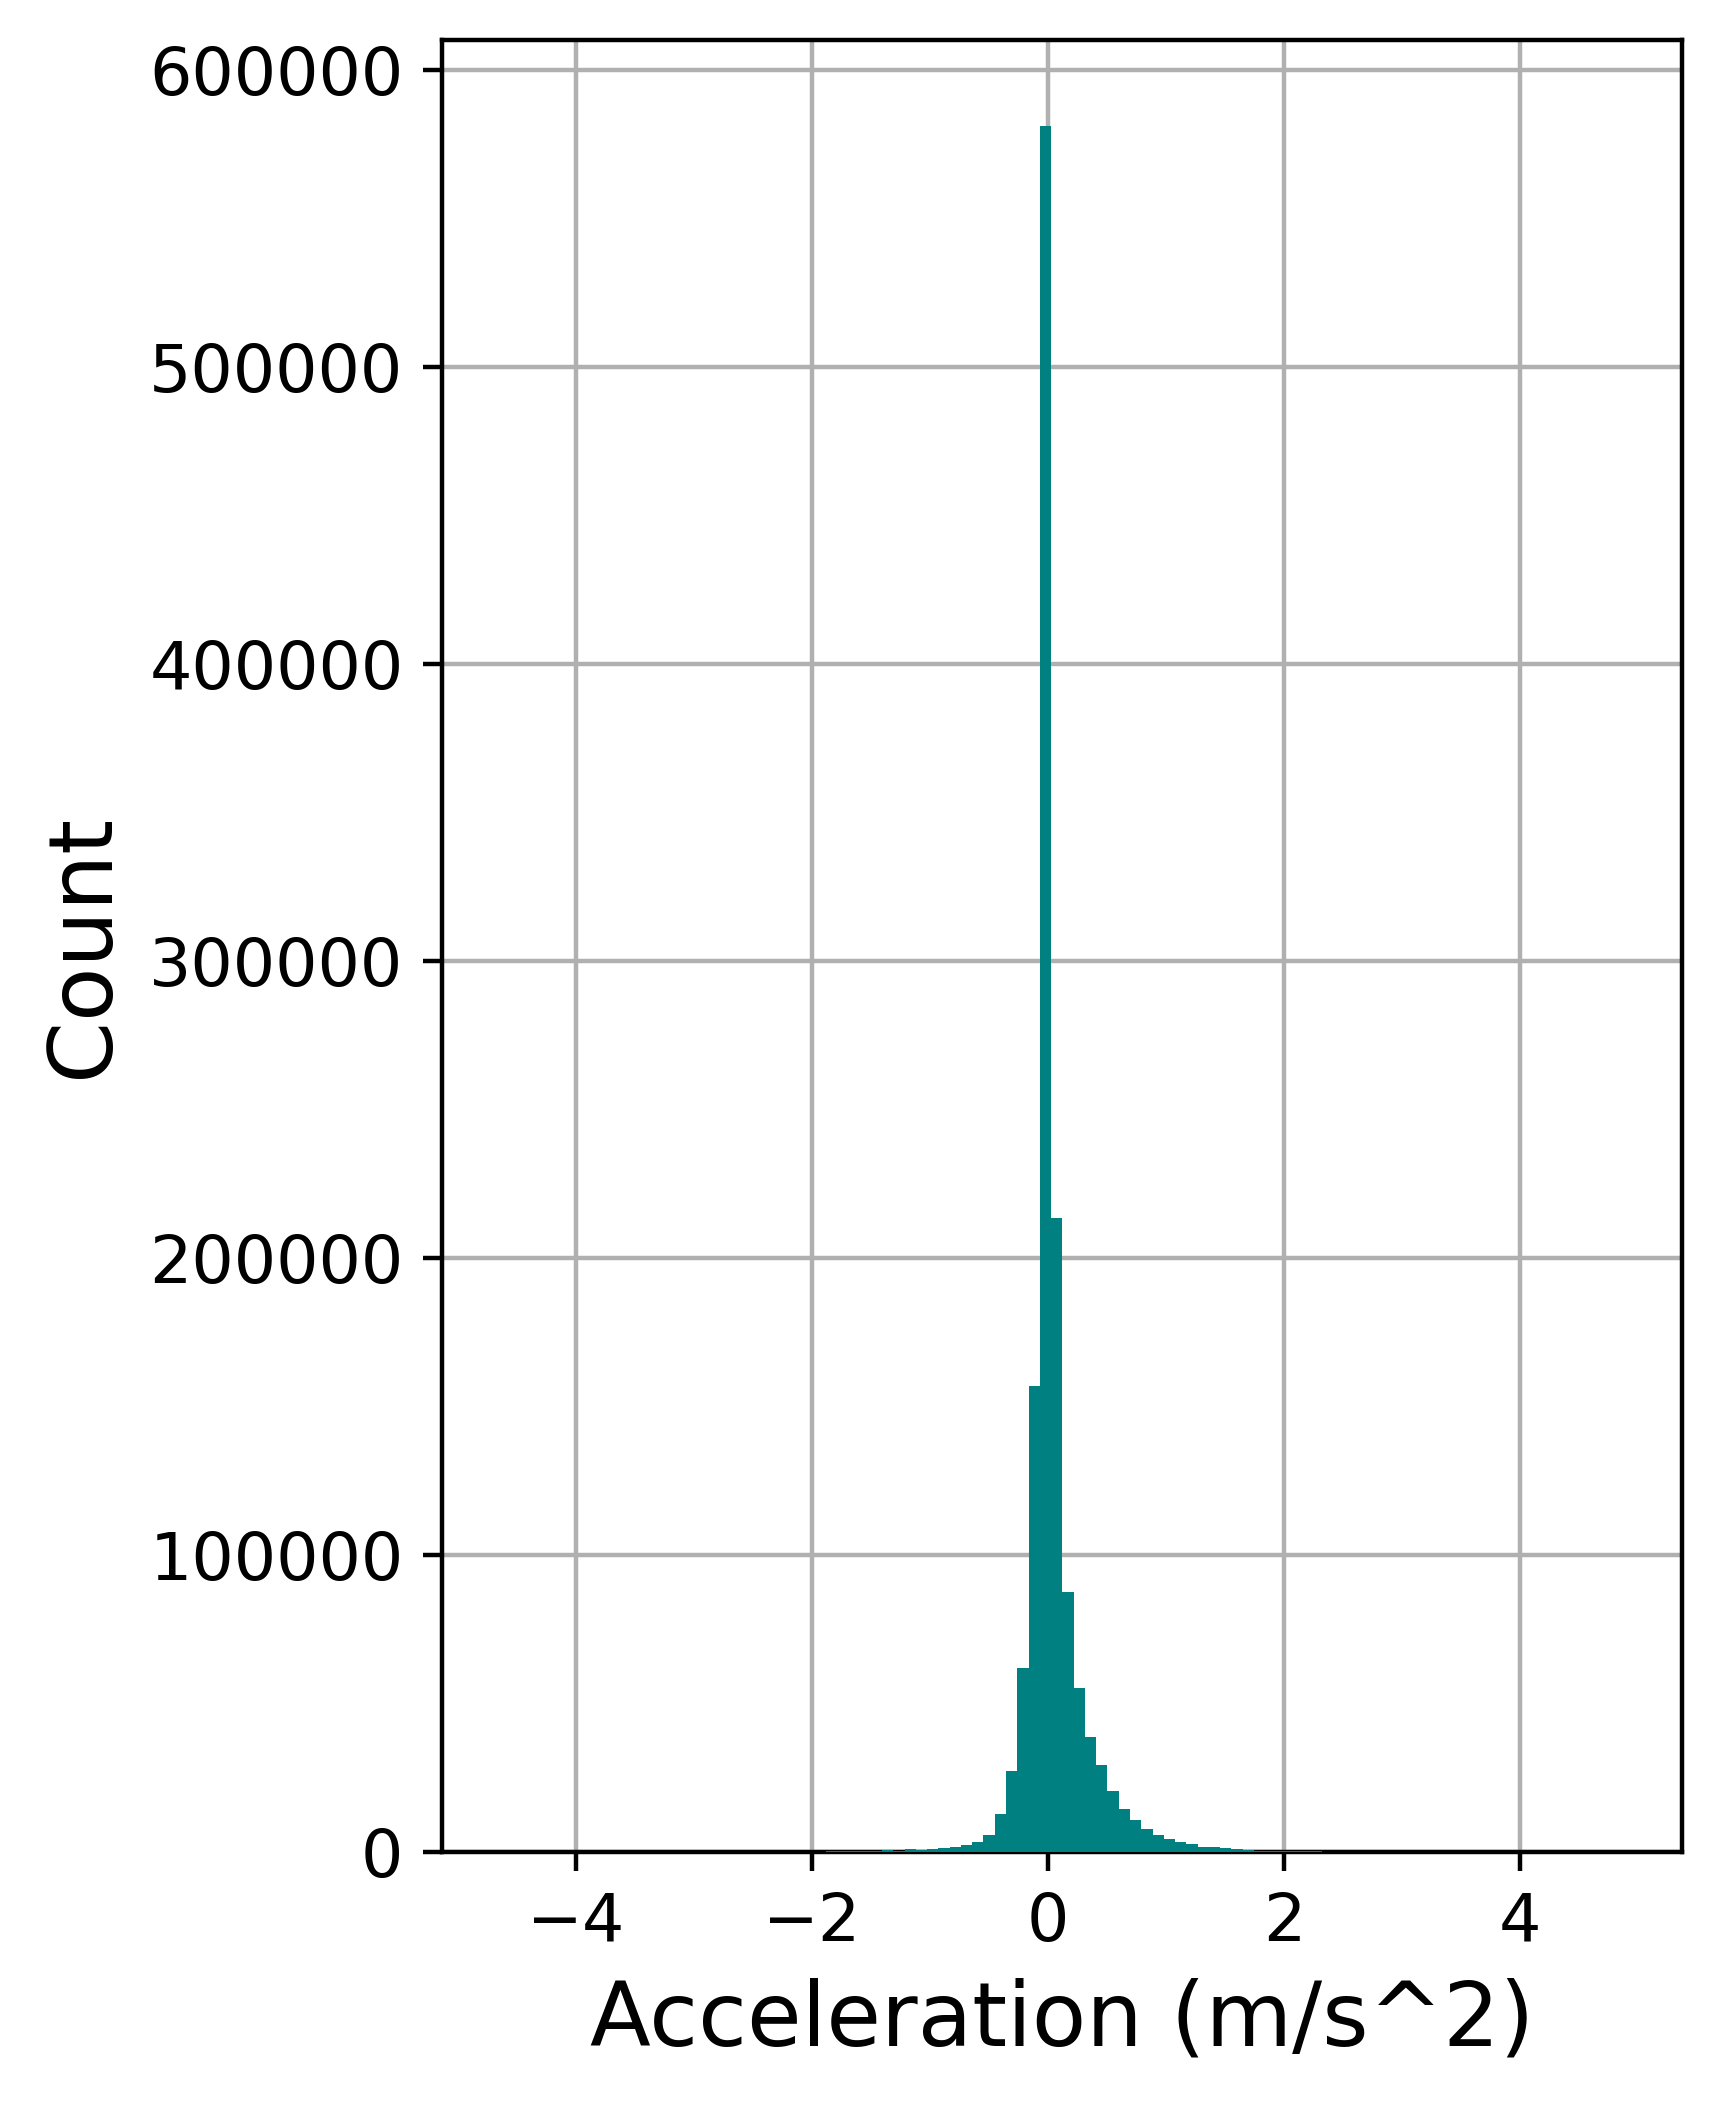

In [362]:
figure(figsize=(4, 6), dpi=400)
ax=df['acc'].hist(bins=100, color='teal', zorder=3)
ax.set_xlabel('Acceleration (m/s^2)', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig(r'../../figures/hist-trajectories-acceleration.png', dpi=400, bbox_inches='tight')

In [135]:
#df.set_index(['time', 'Vehicle'])['dist'].unstack()

In [136]:
#fig, ax = plt.subplots(figsize=(25,25))

#for key, grp in df.groupby(['Vehicle']):
#    ax = grp.plot(ax=ax, kind='scatter', x='ServiceDateTime', y='dist', label=key)

#plt.legend(loc='best')
#plt.show()

In [137]:
#df_new=df.set_index('Date')
#df_new.groupby([''])['Date'].plot(legend=True)

In [138]:
#vehicles=df['Vehicles'].unique

In [139]:
#len(vehicles)

In [140]:
#fig, ax = plt.subplots(figsize=(25,25))

#for key, grp in df.groupby(['Vehicle']):
#    ax = grp.plot(ax=ax, kind='scatter', x='ServiceDateTime', y='dist', label=key)

#plt.legend(loc='best')
#plt.show()

In [86]:
#df=df.set_index('ServiceDateTime')

In [95]:
#df=df.reset_index()

In [191]:
#df.pivot(index='ServiceDateTime', columns='Vehicle', values='dist').plot()

In [199]:
df.columns

Index(['ServiceDateTime', 'Unnamed: 0', 'DateKey', 'CalendarDate', 'Year',
       'Month', 'OpKey', 'Operator', 'RtKey', 'RtKey2', 'Route', 'RouteName',
       'TripKey', 'Trip', 'StopKey', 'Stop', 'StopName', 'Lat', 'Lon',
       'Vehicle', 'VehicleType', 'SeatedCap', 'TotalCap', 'Boards', 'Alights',
       'Onboard', 'Bike', 'Wheelchair', 'Weekday', 'Hour', 'Minute', 'Second',
       'Date', 'Daytype', 'time', 'time_delta', 'time_delta_in_seconds',
       'dist', 'speed', 'acc'],
      dtype='object')

In [214]:
len(df['Route'].unique())

49

In [215]:
len(df['Operator'].unique())

3

In [216]:
df['Route'].unique()

array(['R44', '(X) 39E', 'B43', '9999', '(X) P11', 'X92', '(X) 821',
       '(X) 804', '(X) 892', '(X) 823', '(X) 801', '(X) 820', 'G5',
       '(X) 802', 'X90', 'B4', 'R14', 'R10', 'G1', 'R29', 'B17', 'G3',
       '(X) 805', '(X) 824', '921', '(X) 803', 'G73', 'P20', 'P21', 'B6',
       'B7', 'G2', 'B12', '(X) 806', '(X) B9', 'B23', 'R24', '31', '30',
       '(X) 38', '33', '46', '45', '35', '(X) 34', 'R41', 'R42', 'B48',
       '(X) 943'], dtype=object)

In [10]:
trajectories = pd.read_csv(r'../../results/computed-trajectories.csv', delimiter=',', skiprows=0, low_memory=False)

In [11]:
trajectories.columns

Index(['Unnamed: 0.1', 'ServiceDateTime', 'Unnamed: 0', 'DateKey',
       'CalendarDate', 'Year', 'Month', 'OpKey', 'Operator', 'RtKey', 'RtKey2',
       'Route', 'RouteName', 'TripKey', 'Trip', 'StopKey', 'Stop', 'StopName',
       'Lat', 'Lon', 'Vehicle', 'VehicleType', 'SeatedCap', 'TotalCap',
       'Boards', 'Alights', 'Onboard', 'Bike', 'Wheelchair', 'Weekday', 'Hour',
       'Minute', 'Second', 'Date', 'Daytype', 'time', 'time_delta',
       'time_delta_in_seconds', 'dist', 'speed', 'acc'],
      dtype='object')

In [13]:
trajectories

Unnamed: 0.1      ServiceDateTime  Unnamed: 0  DateKey  \
0                   0  2022-04-04 06:43:24      112564     8763   
1                   1  2022-04-04 06:51:27      109326     8763   
2                   2  2022-04-04 06:51:27      112565     8763   
3                   3  2022-04-04 06:52:52      109327     8763   
4                   4  2022-04-04 06:54:33      109328     8763   
...               ...                  ...         ...      ...   
1361544       1361544  2022-04-30 23:54:20     1325566     8789   
1361545       1361545  2022-04-30 23:55:24     1325567     8789   
1361546       1361546  2022-04-30 23:56:47     1325568     8789   
1361547       1361547  2022-04-30 23:57:32     1325569     8789   
1361548       1361548  2022-04-30 23:59:29     1325570     8789   

                    CalendarDate  Year  Month  OpKey Operator  RtKey  ...  \
0        2022-04-04 00:00:00.000  2022      4      1    VATCo   3519  ...   
1        2022-04-04 00:00:00.000  2022      4      1    VATCo   3513  ...   
2        2022-04-04 00:00:00.000  2022      4      1    VATCo   3519  ...   
3        2022-04-04 00:00:00.000  2022      4      1    VATCo   3513  ...   
4        2022-04-04 00:00:00.000  2022      4      1    VATCo   3513  ...   
...                          ...   ...    ...    ...      ...    ...  ...   
1361544  2022-04-30 00:00:00.000  2022      4      1    VATCo   3515  ...   
1361545  2022-04-30 00:00:00.000  2022      4      1    VATCo   3515  ...   
1361546  2022-04-30 00:00:00.000  2022      4      1    VATCo   3515  ...   
1361547  2022-04-30 00:00:00.000  2022      4      1    VATCo   3515  ...   
1361548  2022-04-30 00:00:00.000  2022      4      1    VATCo   3515  ...   

         Minute Second        Date  Daytype      time           time_delta  \
0            43     24  2022-04-04  Weekday  06:43:24                  NaN   
1            51     27  2022-04-04  Weekday  06:51:27  2022-07-23 00:08:03   
2            51     27  2022-04-04  Weekday  06:51:27  2022-07-23 00:00:00   
3            52     52  2022-04-04  Weekday  06:52:52  2022-07-23 00:01:25   
4            54     33  2022-04-04  Weekday  06:54:33  2022-07-23 00:01:41   
...         ...    ...         ...      ...       ...                  ...   
1361544      54     20  2022-04-30  Weekend  23:54:20  2022-07-23 00:02:20   
1361545      55     24  2022-04-30  Weekend  23:55:24  2022-07-23 00:01:04   
1361546      56     47  2022-04-30  Weekend  23:56:47  2022-07-23 00:01:23   
1361547      57     32  2022-04-30  Weekend  23:57:32  2022-07-23 00:00:45   
1361548      59     29  2022-04-30  Weekend  23:59:29  2022-07-23 00:01:57   

         time_delta_in_seconds      dist      speed       acc  
0                          NaN  0.000000   0.000000  0.000000  
1                        483.0  0.627342   0.000000  0.000000  
2                          0.0  0.000000   0.000000  0.000000  
3                         85.0  0.313431  13.274729  0.069816  
4                        101.0  0.421734  15.032101  0.007778  
...                        ...       ...        ...       ...  
1361544                  140.0  0.254140   6.535024  0.003673  
1361545                   64.0  0.156799   8.819951  0.015960  
1361546                   83.0  0.144950   6.286980 -0.013643  
1361547                   45.0  0.151259  12.100708  0.057755  
1361548                  117.0  0.780486  24.014951  0.045523  

[1361549 rows x 41 columns]

In [14]:
len(trajectories['Vehicle'].unique())

178

In [219]:
type(trajectories.loc[100].at["ServiceDateTime"])

str

In [220]:
trajectories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1361549 entries, 0 to 1361548
Data columns (total 41 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0.1           1361549 non-null  int64  
 1   ServiceDateTime        1361549 non-null  object 
 2   Unnamed: 0             1361549 non-null  int64  
 3   DateKey                1361549 non-null  int64  
 4   CalendarDate           1361549 non-null  object 
 5   Year                   1361549 non-null  int64  
 6   Month                  1361549 non-null  int64  
 7   OpKey                  1361549 non-null  int64  
 8   Operator               1361549 non-null  object 
 9   RtKey                  1361549 non-null  int64  
 10  RtKey2                 1361549 non-null  int64  
 11  Route                  1361549 non-null  object 
 12  RouteName              1352172 non-null  object 
 13  TripKey                1361549 non-null  int64  
 14  Trip              

In [221]:
trajectories['ServiceDateTime']= pd.to_datetime(trajectories['ServiceDateTime'])

In [222]:
trajectories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1361549 entries, 0 to 1361548
Data columns (total 41 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0.1           1361549 non-null  int64         
 1   ServiceDateTime        1361549 non-null  datetime64[ns]
 2   Unnamed: 0             1361549 non-null  int64         
 3   DateKey                1361549 non-null  int64         
 4   CalendarDate           1361549 non-null  object        
 5   Year                   1361549 non-null  int64         
 6   Month                  1361549 non-null  int64         
 7   OpKey                  1361549 non-null  int64         
 8   Operator               1361549 non-null  object        
 9   RtKey                  1361549 non-null  int64         
 10  RtKey2                 1361549 non-null  int64         
 11  Route                  1361549 non-null  object        
 12  RouteName              13521

In [223]:
trajectories = trajectories.set_index("ServiceDateTime")
trajectories

Unnamed: 0.1  Unnamed: 0  DateKey  \
ServiceDateTime                                          
2022-04-04 06:43:24             0      112564     8763   
2022-04-04 06:51:27             1      109326     8763   
2022-04-04 06:51:27             2      112565     8763   
2022-04-04 06:52:52             3      109327     8763   
2022-04-04 06:54:33             4      109328     8763   
...                           ...         ...      ...   
2022-04-30 23:54:20       1361544     1325566     8789   
2022-04-30 23:55:24       1361545     1325567     8789   
2022-04-30 23:56:47       1361546     1325568     8789   
2022-04-30 23:57:32       1361547     1325569     8789   
2022-04-30 23:59:29       1361548     1325570     8789   

                                CalendarDate  Year  Month  OpKey Operator  \
ServiceDateTime                                                             
2022-04-04 06:43:24  2022-04-04 00:00:00.000  2022      4      1    VATCo   
2022-04-04 06:51:27  2022-04-04 00:00:00.000  2022      4      1    VATCo   
2022-04-04 06:51:27  2022-04-04 00:00:00.000  2022      4      1    VATCo   
2022-04-04 06:52:52  2022-04-04 00:00:00.000  2022      4      1    VATCo   
2022-04-04 06:54:33  2022-04-04 00:00:00.000  2022      4      1    VATCo   
...                                      ...   ...    ...    ...      ...   
2022-04-30 23:54:20  2022-04-30 00:00:00.000  2022      4      1    VATCo   
2022-04-30 23:55:24  2022-04-30 00:00:00.000  2022      4      1    VATCo   
2022-04-30 23:56:47  2022-04-30 00:00:00.000  2022      4      1    VATCo   
2022-04-30 23:57:32  2022-04-30 00:00:00.000  2022      4      1    VATCo   
2022-04-30 23:59:29  2022-04-30 00:00:00.000  2022      4      1    VATCo   

                     RtKey  RtKey2  ... Minute Second        Date  Daytype  \
ServiceDateTime                     ...                                      
2022-04-04 06:43:24   3519    1006  ...     43     24  2022-04-04  Weekday   
2022-04-04 06:51:27   3513    3380  ...     51     27  2022-04-04  Weekday   
2022-04-04 06:51:27   3519    1006  ...     51     27  2022-04-04  Weekday   
2022-04-04 06:52:52   3513    3380  ...     52     52  2022-04-04  Weekday   
2022-04-04 06:54:33   3513    3380  ...     54     33  2022-04-04  Weekday   
...                    ...     ...  ...    ...    ...         ...      ...   
2022-04-30 23:54:20   3515    1001  ...     54     20  2022-04-30  Weekend   
2022-04-30 23:55:24   3515    1001  ...     55     24  2022-04-30  Weekend   
2022-04-30 23:56:47   3515    1001  ...     56     47  2022-04-30  Weekend   
2022-04-30 23:57:32   3515    1001  ...     57     32  2022-04-30  Weekend   
2022-04-30 23:59:29   3515    1001  ...     59     29  2022-04-30  Weekend   

                         time           time_delta time_delta_in_seconds  \
ServiceDateTime                                                            
2022-04-04 06:43:24  06:43:24                  NaN                   NaN   
2022-04-04 06:51:27  06:51:27  2022-07-21 00:08:03                 483.0   
2022-04-04 06:51:27  06:51:27  2022-07-21 00:00:00                   0.0   
2022-04-04 06:52:52  06:52:52  2022-07-21 00:01:25                  85.0   
2022-04-04 06:54:33  06:54:33  2022-07-21 00:01:41                 101.0   
...                       ...                  ...                   ...   
2022-04-30 23:54:20  23:54:20  2022-07-21 00:02:20                 140.0   
2022-04-30 23:55:24  23:55:24  2022-07-21 00:01:04                  64.0   
2022-04-30 23:56:47  23:56:47  2022-07-21 00:01:23                  83.0   
2022-04-30 23:57:32  23:57:32  2022-07-21 00:00:45                  45.0   
2022-04-30 23:59:29  23:59:29  2022-07-21 00:01:57                 117.0   

                         dist      speed       acc  
ServiceDateTime                                     
2022-04-04 06:43:24  0.000000   0.000000  0.000000  
2022-04-04 06:51:27  0.627342   0.000000  0.000000  
2022-04-04 06:51:27  0.000000   0.000000  0.0000

In [224]:
trajectories["Date"]

ServiceDateTime
2022-04-04 06:43:24    2022-04-04
2022-04-04 06:51:27    2022-04-04
2022-04-04 06:51:27    2022-04-04
2022-04-04 06:52:52    2022-04-04
2022-04-04 06:54:33    2022-04-04
                          ...    
2022-04-30 23:54:20    2022-04-30
2022-04-30 23:55:24    2022-04-30
2022-04-30 23:56:47    2022-04-30
2022-04-30 23:57:32    2022-04-30
2022-04-30 23:59:29    2022-04-30
Name: Date, Length: 1361549, dtype: object

In [225]:
selected_date=['2022-04-04']
plot_data=trajectories.loc[trajectories.Date.isin(selected_date)]

In [226]:
plot_data

Unnamed: 0.1  Unnamed: 0  DateKey  \
ServiceDateTime                                          
2022-04-04 06:43:24             0      112564     8763   
2022-04-04 06:51:27             1      109326     8763   
2022-04-04 06:51:27             2      112565     8763   
2022-04-04 06:52:52             3      109327     8763   
2022-04-04 06:54:33             4      109328     8763   
...                           ...         ...      ...   
2022-04-04 19:00:30       1348358      111110     8763   
2022-04-04 19:01:28       1348359      111111     8763   
2022-04-04 19:02:59       1348360      111112     8763   
2022-04-04 19:05:54       1348361      109322     8763   
2022-04-04 19:05:54       1348362      111113     8763   

                                CalendarDate  Year  Month  OpKey Operator  \
ServiceDateTime                                                             
2022-04-04 06:43:24  2022-04-04 00:00:00.000  2022      4      1    VATCo   
2022-04-04 06:51:27  2022-04-04 00:00:00.000  2022      4      1    VATCo   
2022-04-04 06:51:27  2022-04-04 00:00:00.000  2022      4      1    VATCo   
2022-04-04 06:52:52  2022-04-04 00:00:00.000  2022      4      1    VATCo   
2022-04-04 06:54:33  2022-04-04 00:00:00.000  2022      4      1    VATCo   
...                                      ...   ...    ...    ...      ...   
2022-04-04 19:00:30  2022-04-04 00:00:00.000  2022      4      1    VATCo   
2022-04-04 19:01:28  2022-04-04 00:00:00.000  2022      4      1    VATCo   
2022-04-04 19:02:59  2022-04-04 00:00:00.000  2022      4      1    VATCo   
2022-04-04 19:05:54  2022-04-04 00:00:00.000  2022      4      1    VATCo   
2022-04-04 19:05:54  2022-04-04 00:00:00.000  2022      4      1    VATCo   

                     RtKey  RtKey2  ... Minute Second        Date  Daytype  \
ServiceDateTime                     ...                                      
2022-04-04 06:43:24   3519    1006  ...     43     24  2022-04-04  Weekday   
2022-04-04 06:51:27   3513    3380  ...     51     27  2022-04-04  Weekday   
2022-04-04 06:51:27   3519    1006  ...     51     27  2022-04-04  Weekday   
2022-04-04 06:52:52   3513    3380  ...     52     52  2022-04-04  Weekday   
2022-04-04 06:54:33   3513    3380  ...     54     33  2022-04-04  Weekday   
...                    ...     ...  ...    ...    ...         ...      ...   
2022-04-04 19:00:30   3515    1001  ...      0     30  2022-04-04  Weekday   
2022-04-04 19:01:28   3515    1001  ...      1     28  2022-04-04  Weekday   
2022-04-04 19:02:59   3515    1001  ...      2     59  2022-04-04  Weekday   
2022-04-04 19:05:54   3410    1007  ...      5     54  2022-04-04  Weekday   
2022-04-04 19:05:54   3515    1001  ...      5     54  2022-04-04  Weekday   

                         time           time_delta time_delta_in_seconds  \
ServiceDateTime                                                            
2022-04-04 06:43:24  06:43:24                  NaN                   NaN   
2022-04-04 06:51:27  06:51:27  2022-07-21 00:08:03                 483.0   
2022-04-04 06:51:27  06:51:27  2022-07-21 00:00:00                   0.0   
2022-04-04 06:52:52  06:52:52  2022-07-21 00:01:25                  85.0   
2022-04-04 06:54:33  06:54:33  2022-07-21 00:01:41                 101.0   
...                       ...                  ...                   ...   
2022-04-04 19:00:30  19:00:30  2022-07-21 00:02:14                 134.0   
2022-04-04 19:01:28  19:01:28  2022-07-21 00:00:58                  58.0   
2022-04-04 19:02:59  19:02:59  2022-07-21 00:01:31                  91.0   
2022-04-04 19:05:54  19:05:54  2022-07-21 00:02:55                 175.0   
2022-04-04 19:05:54  19:05:54  2022-07-21 00:00:00                   0.0   

                         dist      speed       acc  
ServiceDateTime                                     
2022-04-04 06:43:24  0.000000   0.000000  0.000000  
2022-04-04 06:51:27  0.627342   0.000000  0.000000  
2022-04-04 06:51:27  0.000000   0.000000  0.0000

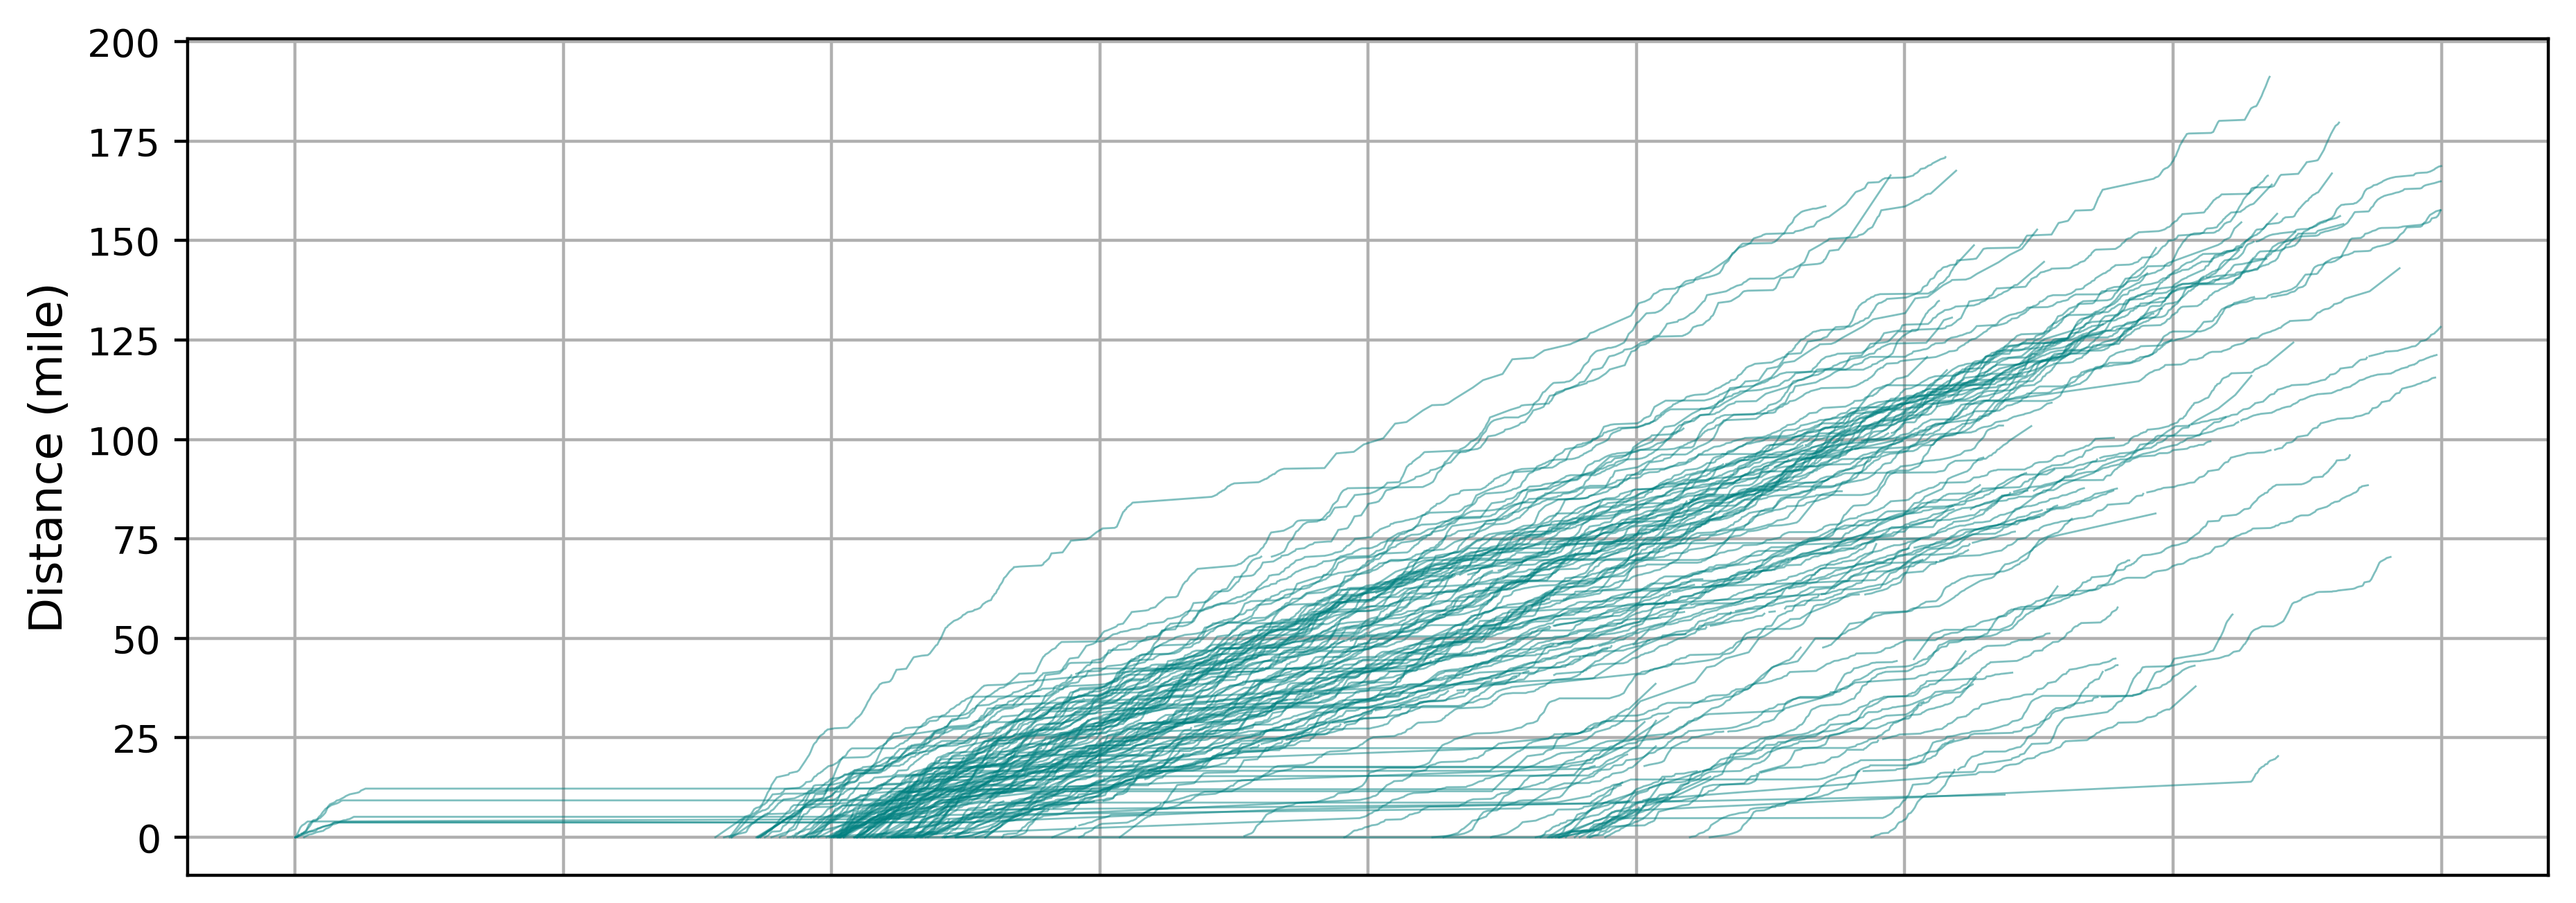

In [363]:
# set size

figure(figsize=(11, 4), dpi=400)

# Plot
vehicle=plot_data['Vehicle'].unique()
for v in vehicle:
    plot_df=plot_data[plot_data['Vehicle']==v]
    plt.plot(plot_df["dist"].cumsum(), marker='', color='teal', linewidth=0.5, alpha=0.5)

# Remove x-ticks
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

# Labelling 

#plt.xlabel("time")
plt.ylabel("Distance (mile)", fontsize=12)
#plt.title("Pandas Time Series Plot")
plt.yticks(fontsize=10)
plt.grid()

# Saving
plt.savefig(r'../../figures/trajectories-distance.png', dpi=400, bbox_inches='tight')


# Display

plt.show()

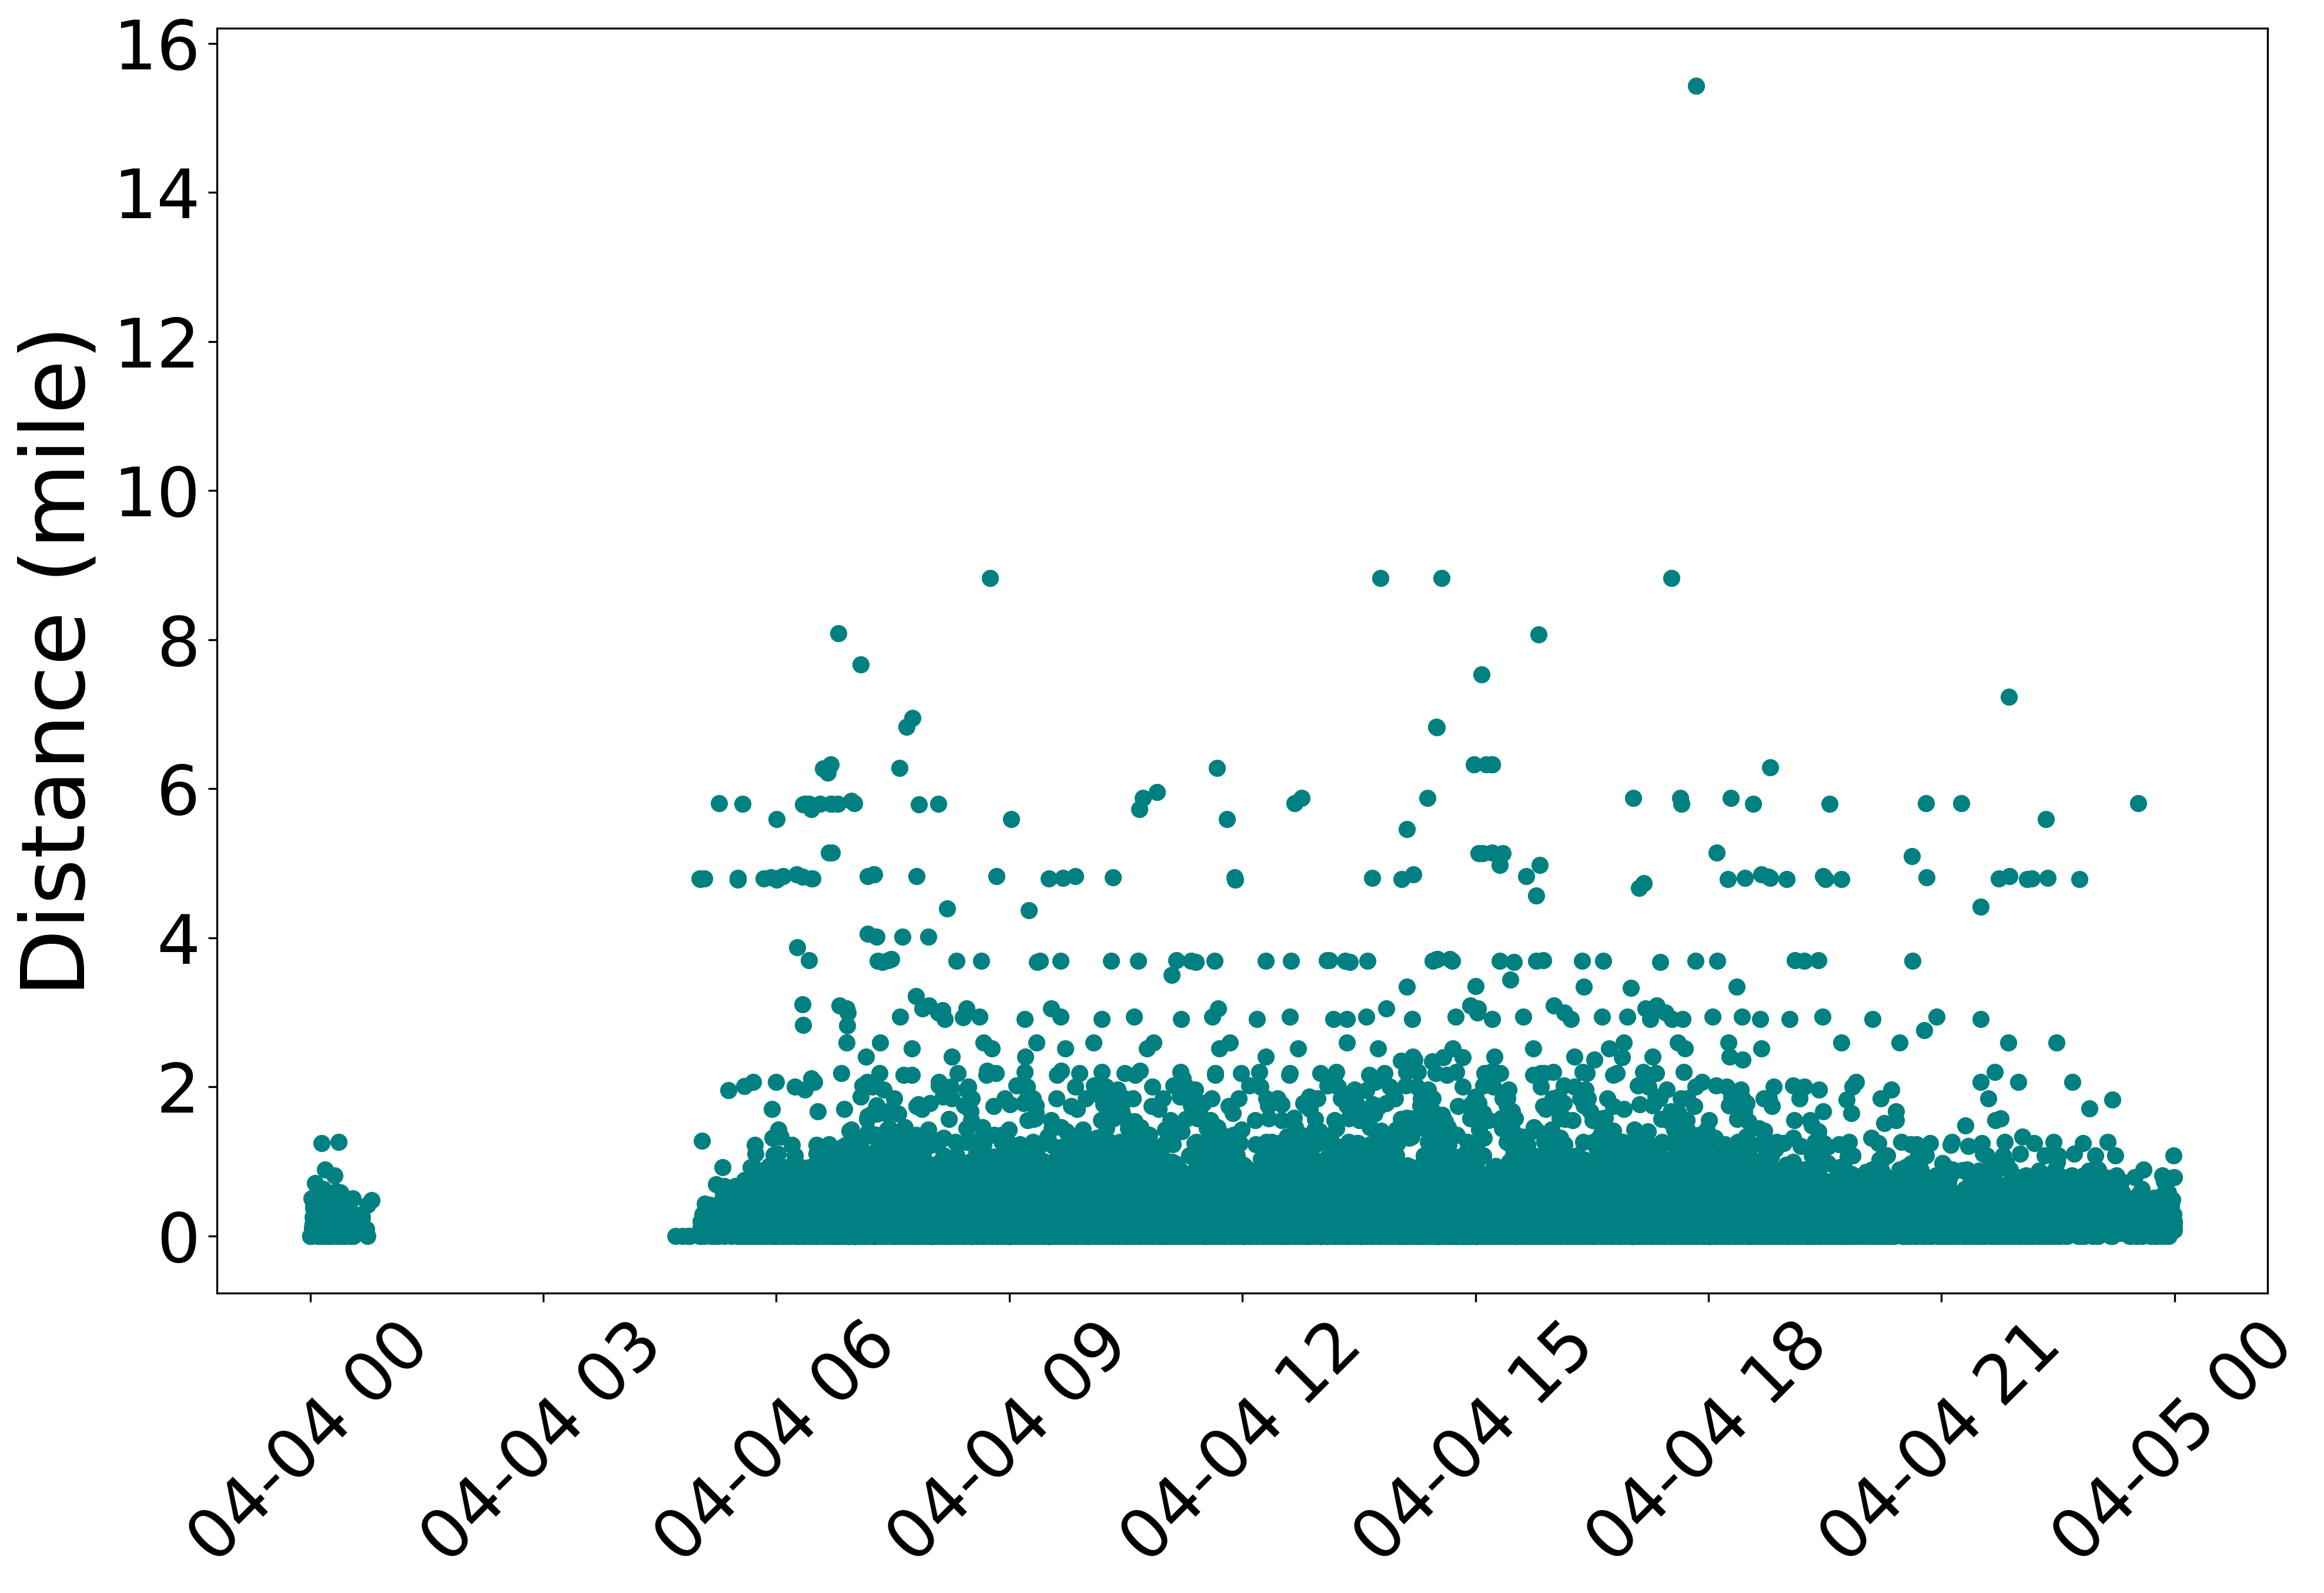

In [255]:
figure(figsize=(15, 9.5), dpi=300)
plt.plot_date(x=plot_data.index , y=plot_data["dist"], fmt='o', tz=None, xdate=True, ydate=False, color='teal')
plt.ylabel("Distance (mile)", fontsize=36)
plt.xticks(fontsize=28, rotation = 45)
plt.yticks(fontsize=28)
# plt.savefig(r'../../figures/trajectories-distance.png', dpi=400, bbox_inches='tight')
plt.show()

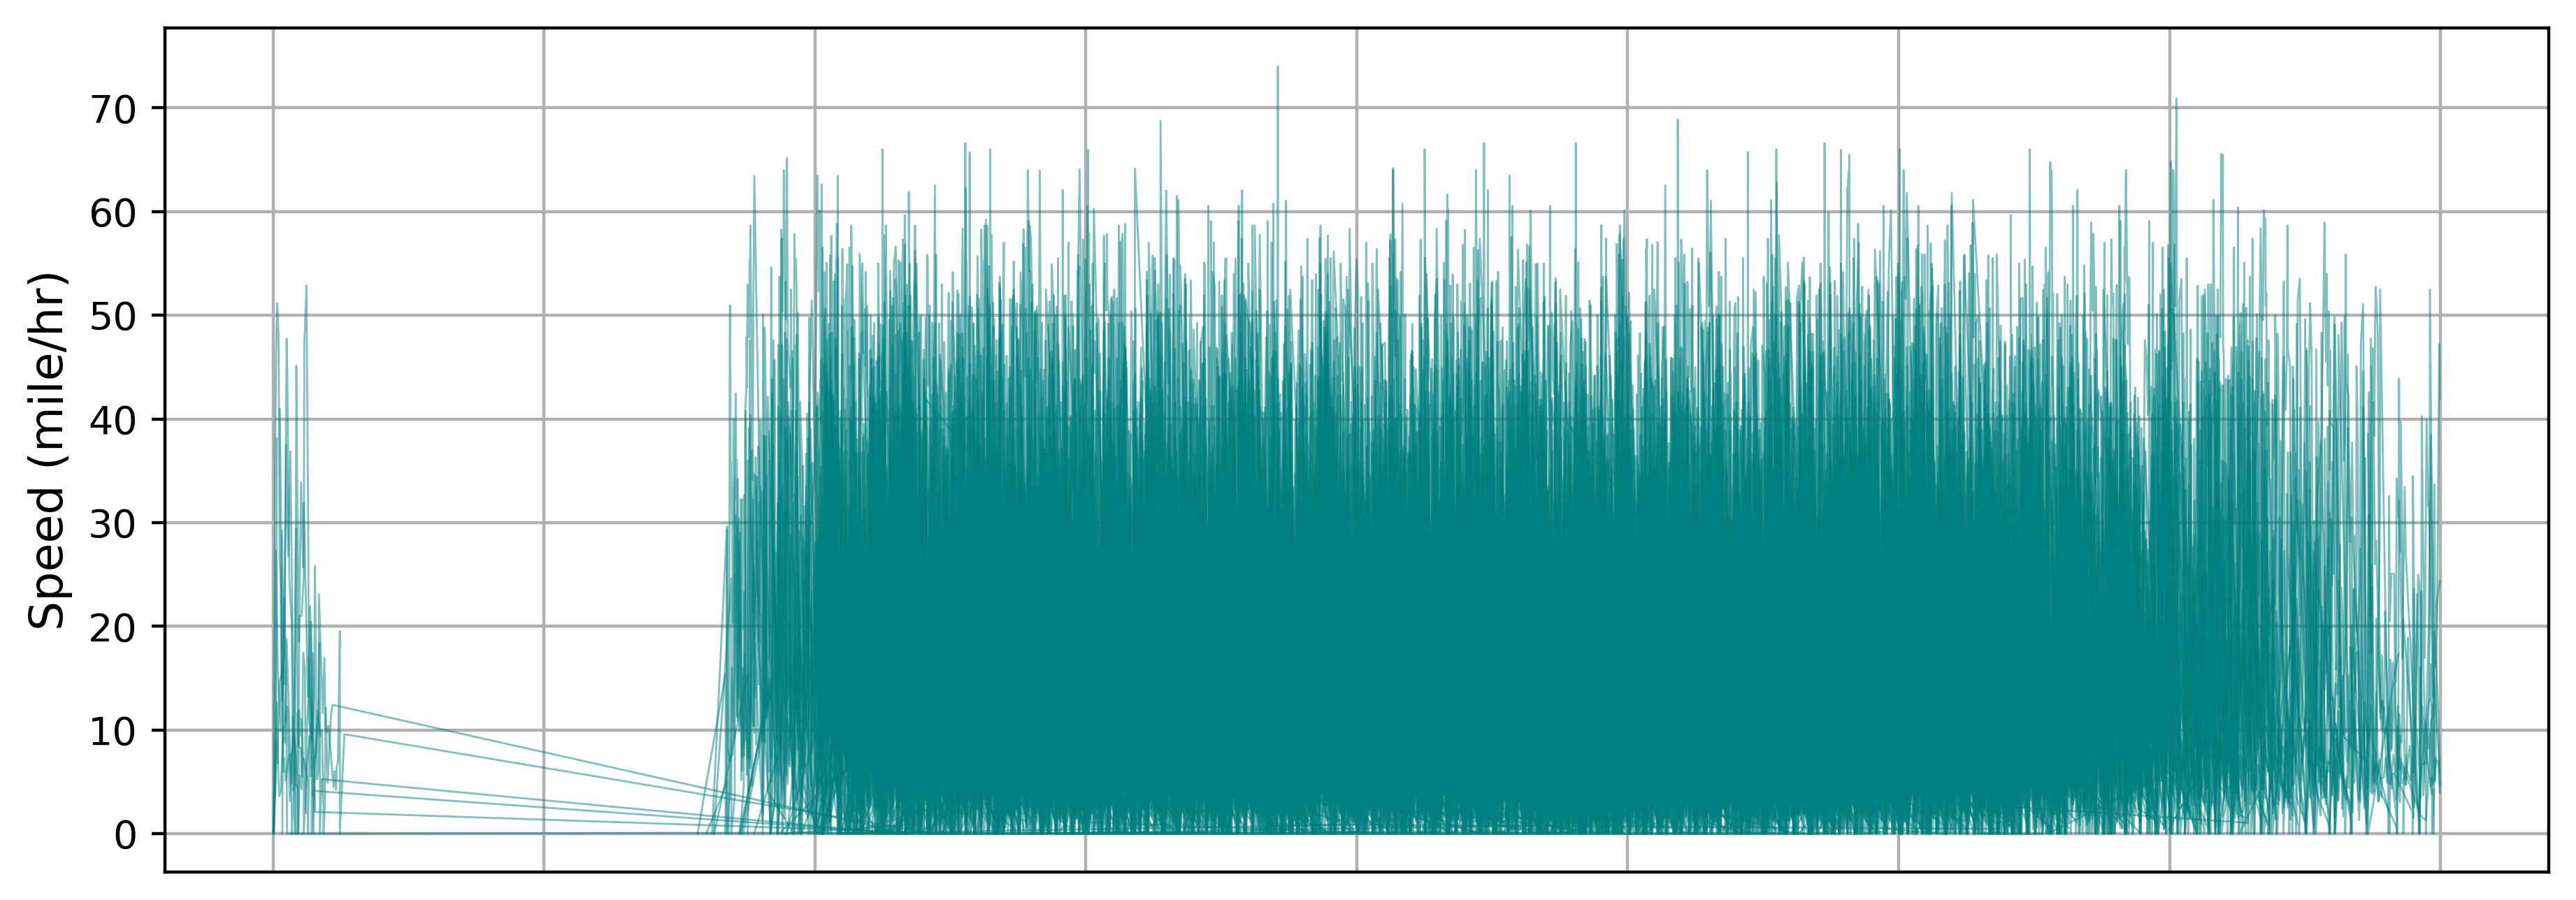

In [364]:
# set size

figure(figsize=(11, 4), dpi=400)

# Plot
vehicle=plot_data['Vehicle'].unique()
for v in vehicle:
    plot_df=plot_data[plot_data['Vehicle']==v]
    plt.plot(plot_df["speed"], marker='', color='teal', linewidth=0.5, alpha=0.5)



# Remove x-ticks
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

# Labelling 

#plt.xlabel("time")
plt.ylabel("Speed (mile/hr)", fontsize=12)
plt.yticks(fontsize=10)
#plt.title("Pandas Time Series Plot")
plt.grid()

# Saving
plt.savefig(r'../../figures/trajectories-speed.png', dpi=400, bbox_inches='tight')

# Display

plt.show()

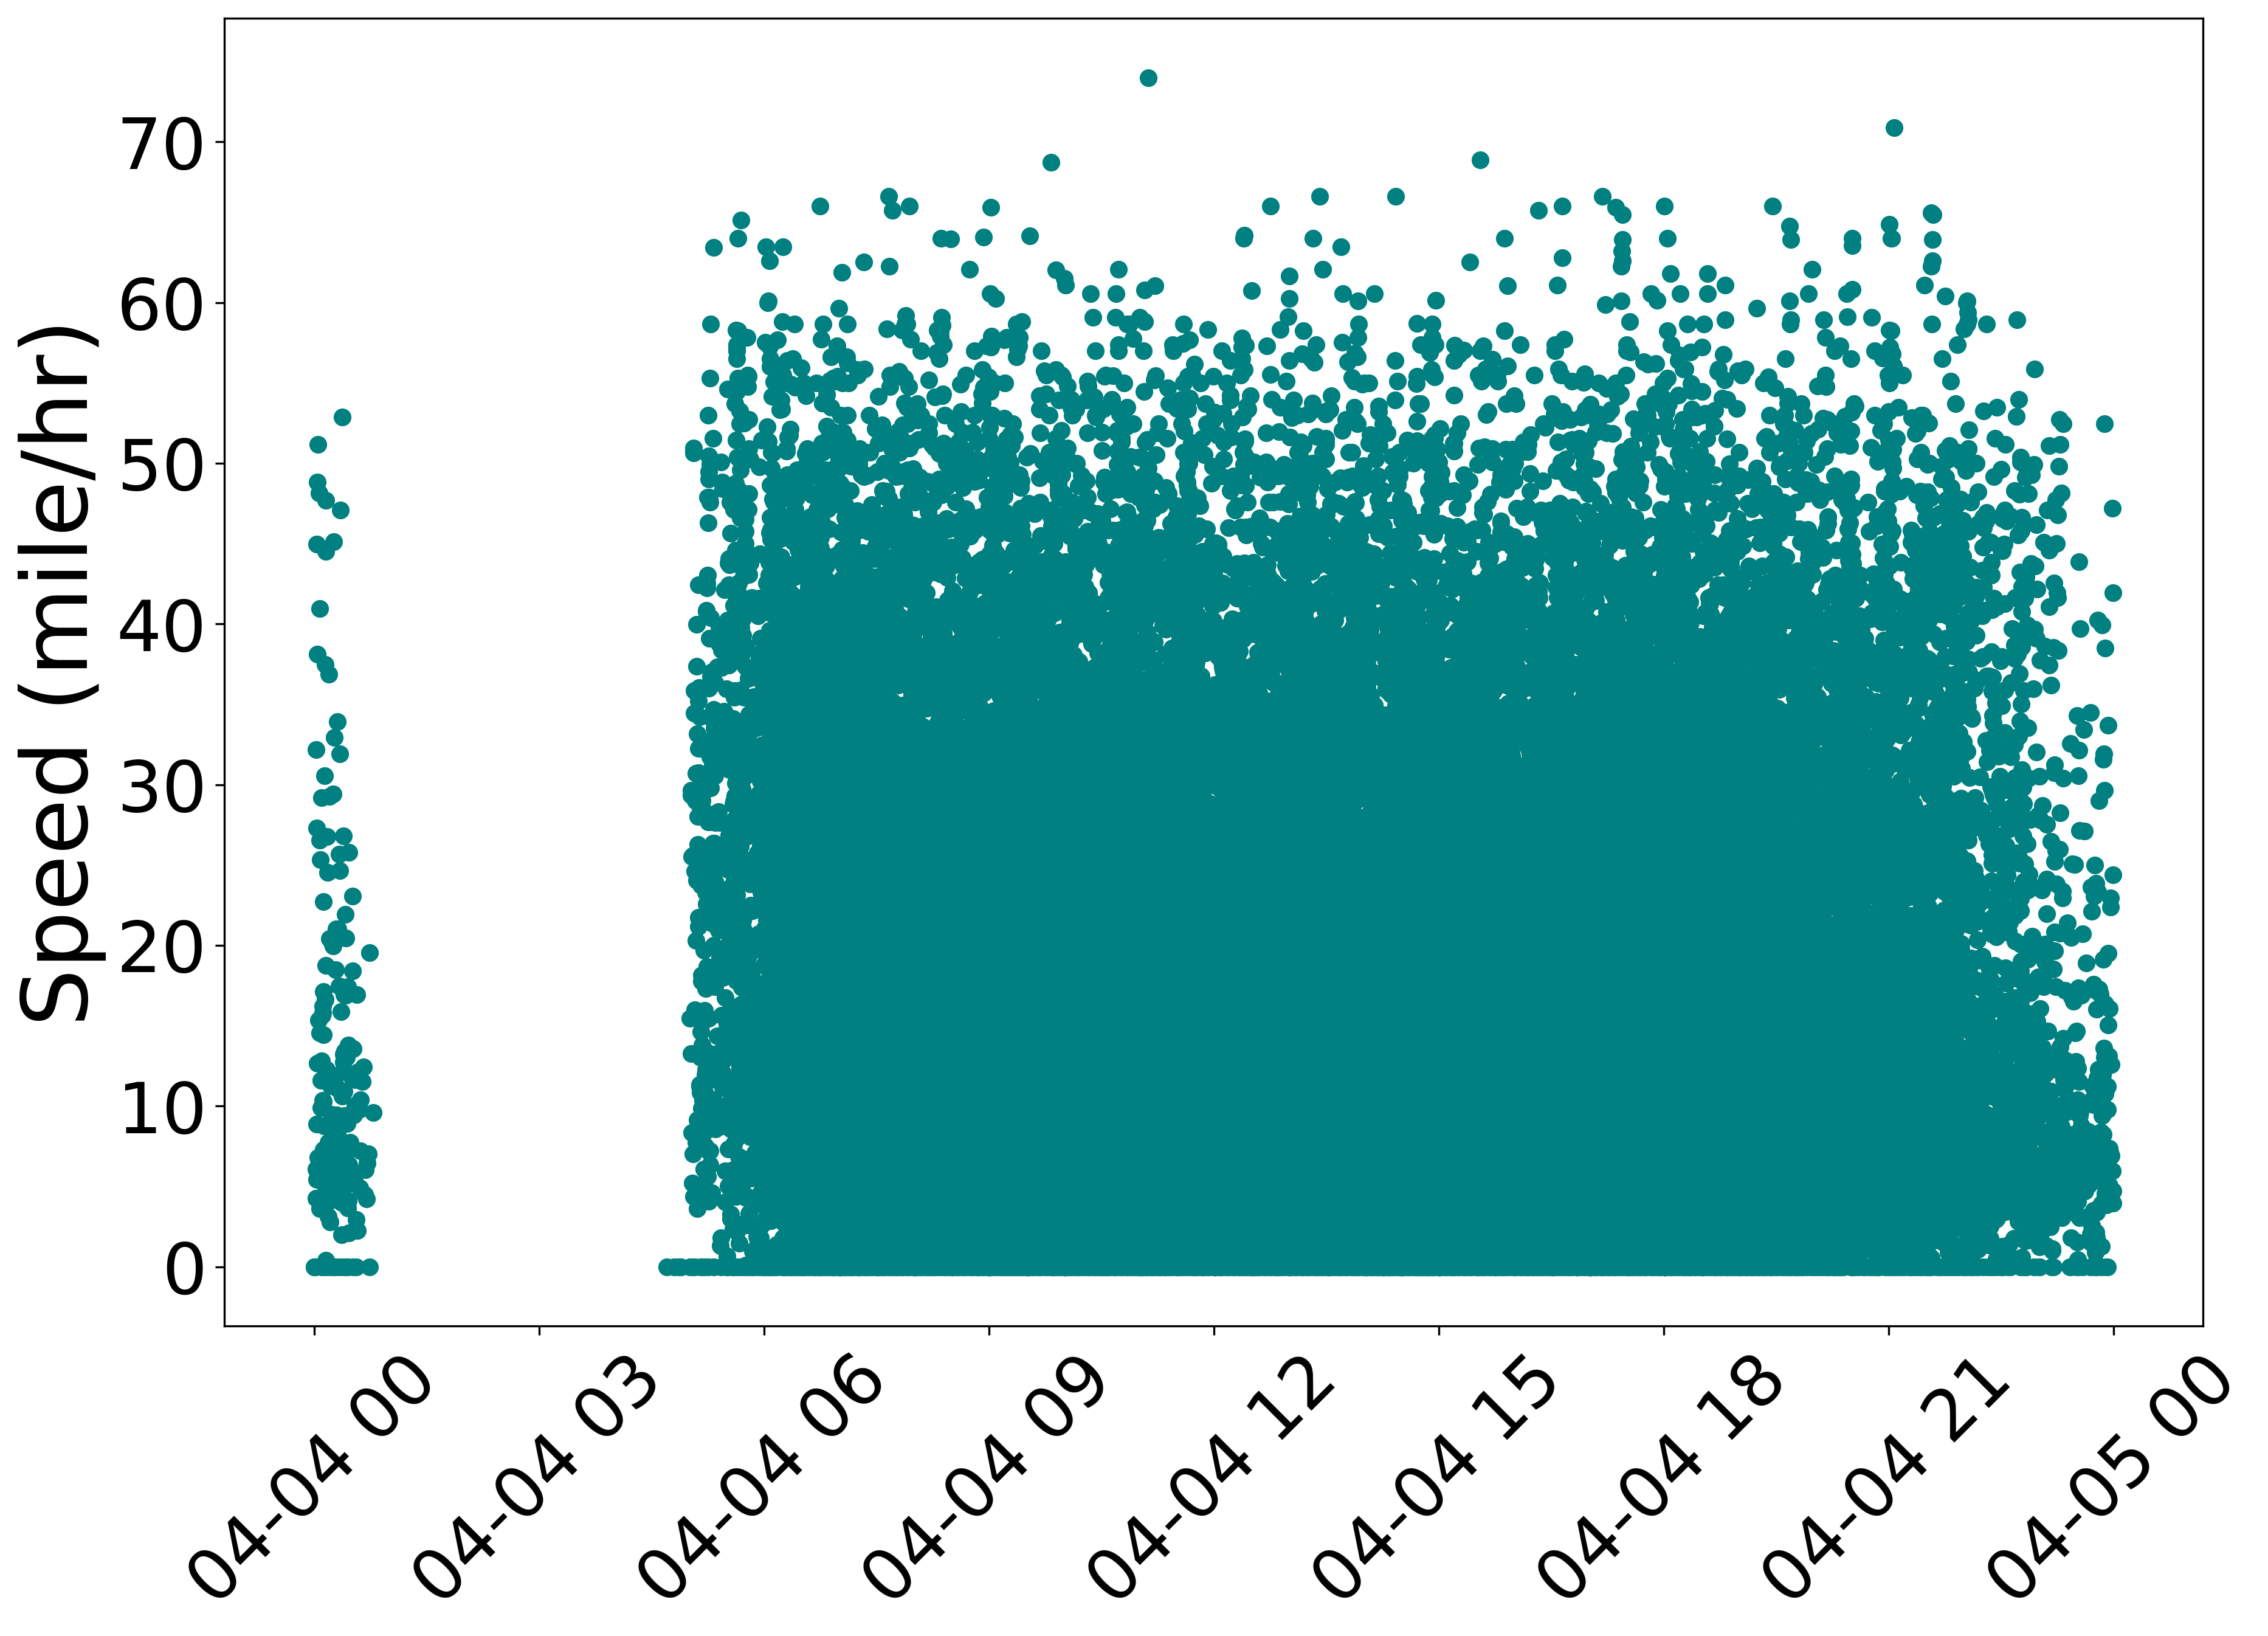

In [231]:
figure(figsize=(14, 9.5), dpi=300)
plt.plot_date(x=plot_data.index , y=plot_data["speed"], fmt='o', tz=None, xdate=True, ydate=False, color='teal')
plt.ylabel("Speed (mile/hr)", fontsize=36)
plt.xticks(fontsize=28, rotation = 45)
plt.yticks(fontsize=28)
# plt.savefig(r'../../figures/trajectories-speed.png', dpi=400, bbox_inches='tight')
plt.show()

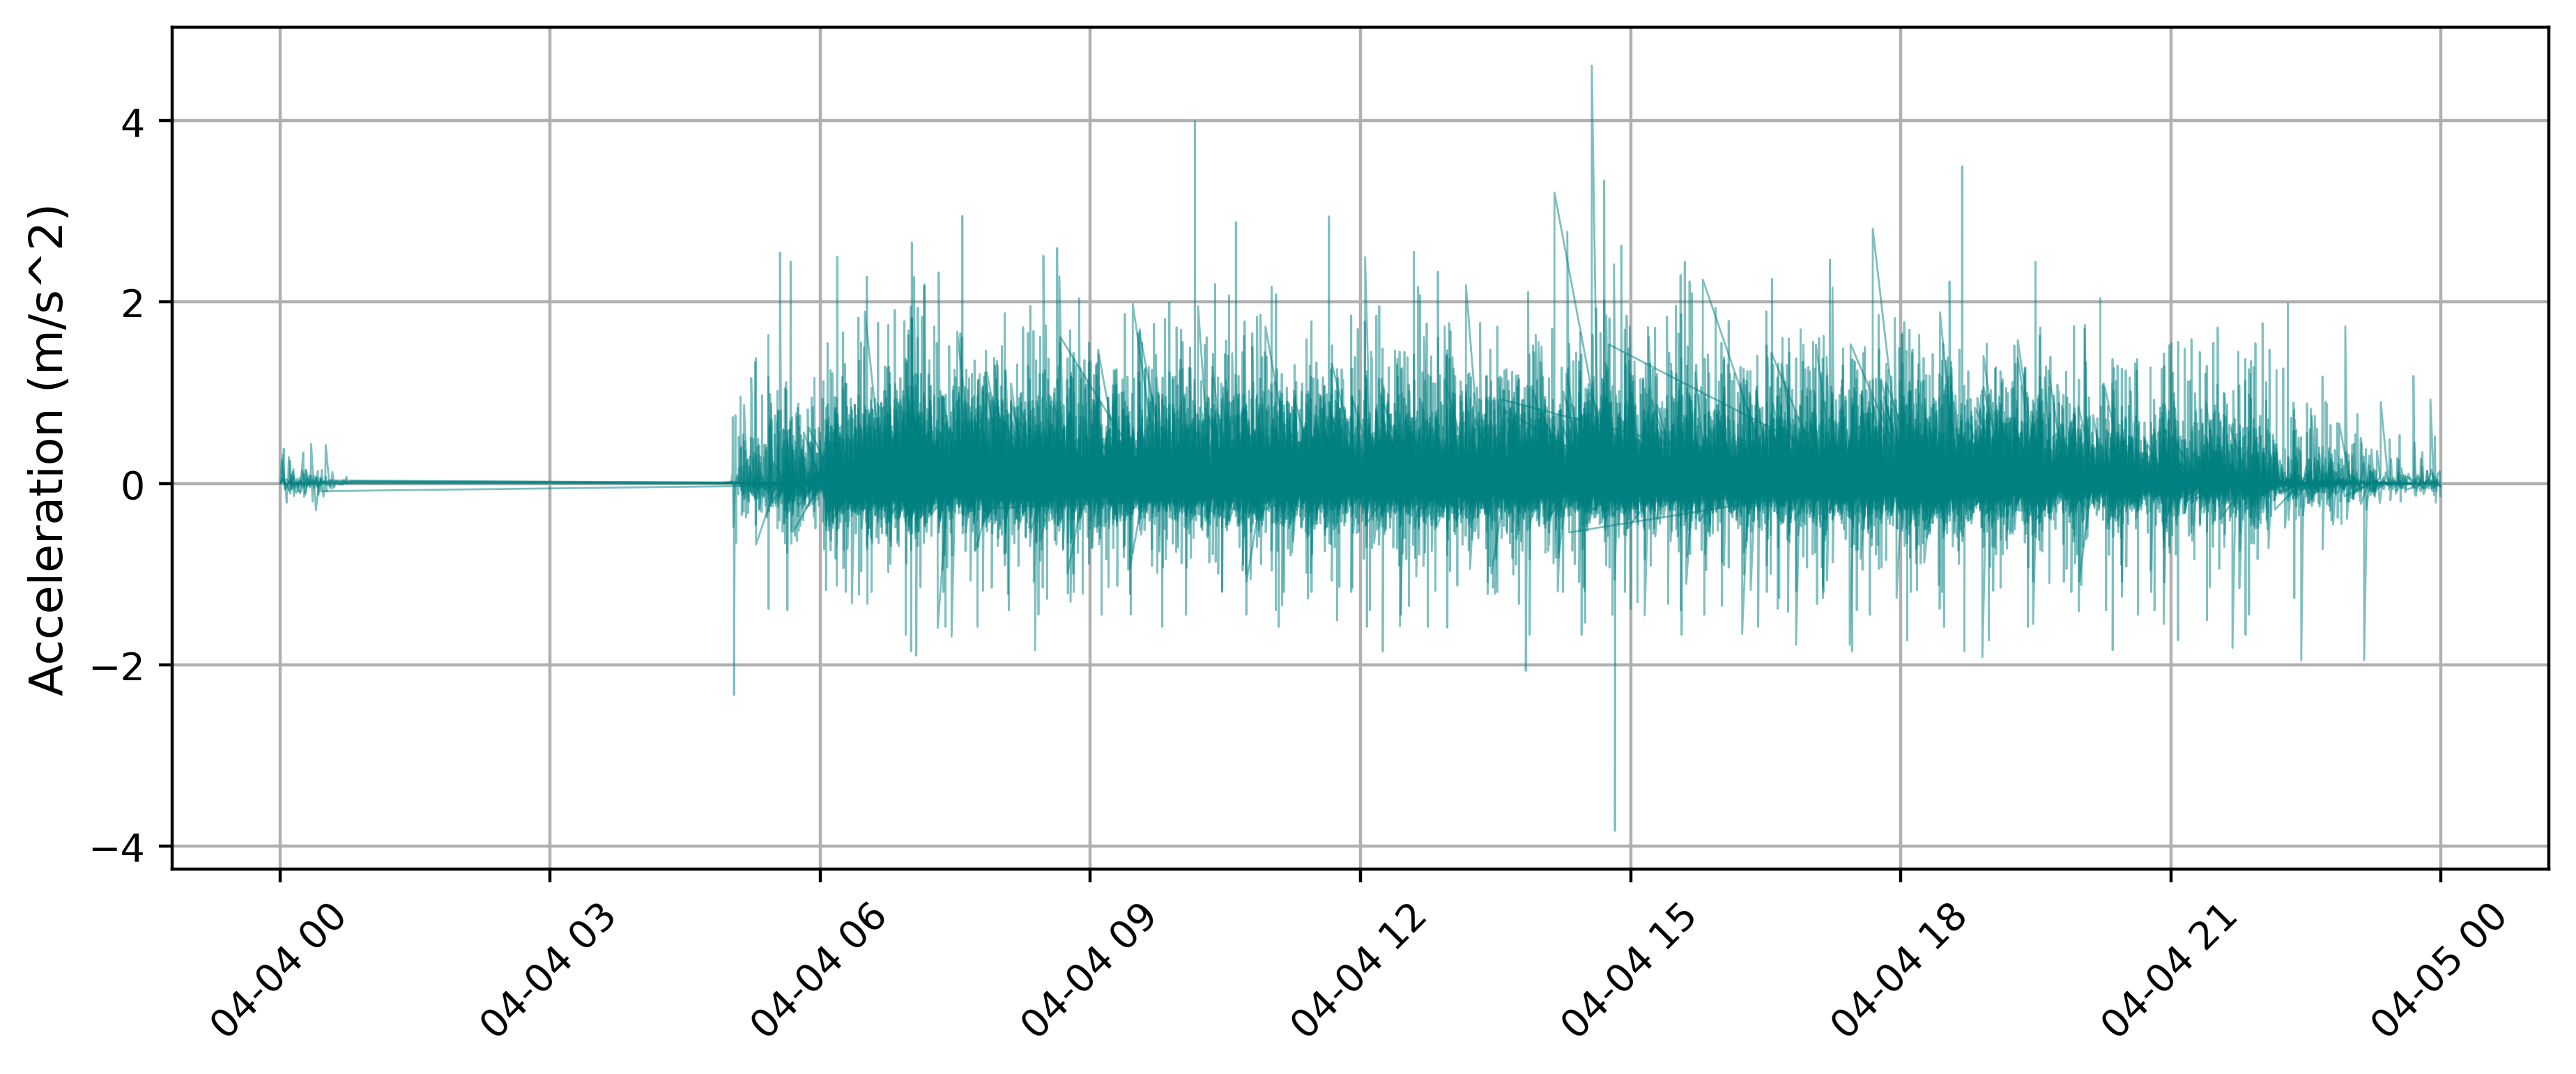

In [365]:
# set size

figure(figsize=(11, 4), dpi=400)

# Plot
vehicle=plot_data['Vehicle'].unique()
for v in vehicle:
    plot_df=plot_data[plot_data['Vehicle']==v]
    plt.plot(plot_df["acc"], marker='', color='teal', linewidth=0.5, alpha=0.5)


# Labelling 

#plt.xlabel("time")
plt.ylabel("Acceleration (m/s^2)", fontsize=12)
plt.xticks(fontsize=10, rotation = 45)
plt.yticks(fontsize=10)
#plt.title("Pandas Time Series Plot")
plt.grid()


# Saving
plt.savefig(r'../../figures/trajectories-acceleration.png', dpi=400, bbox_inches='tight')

# Display

plt.show()

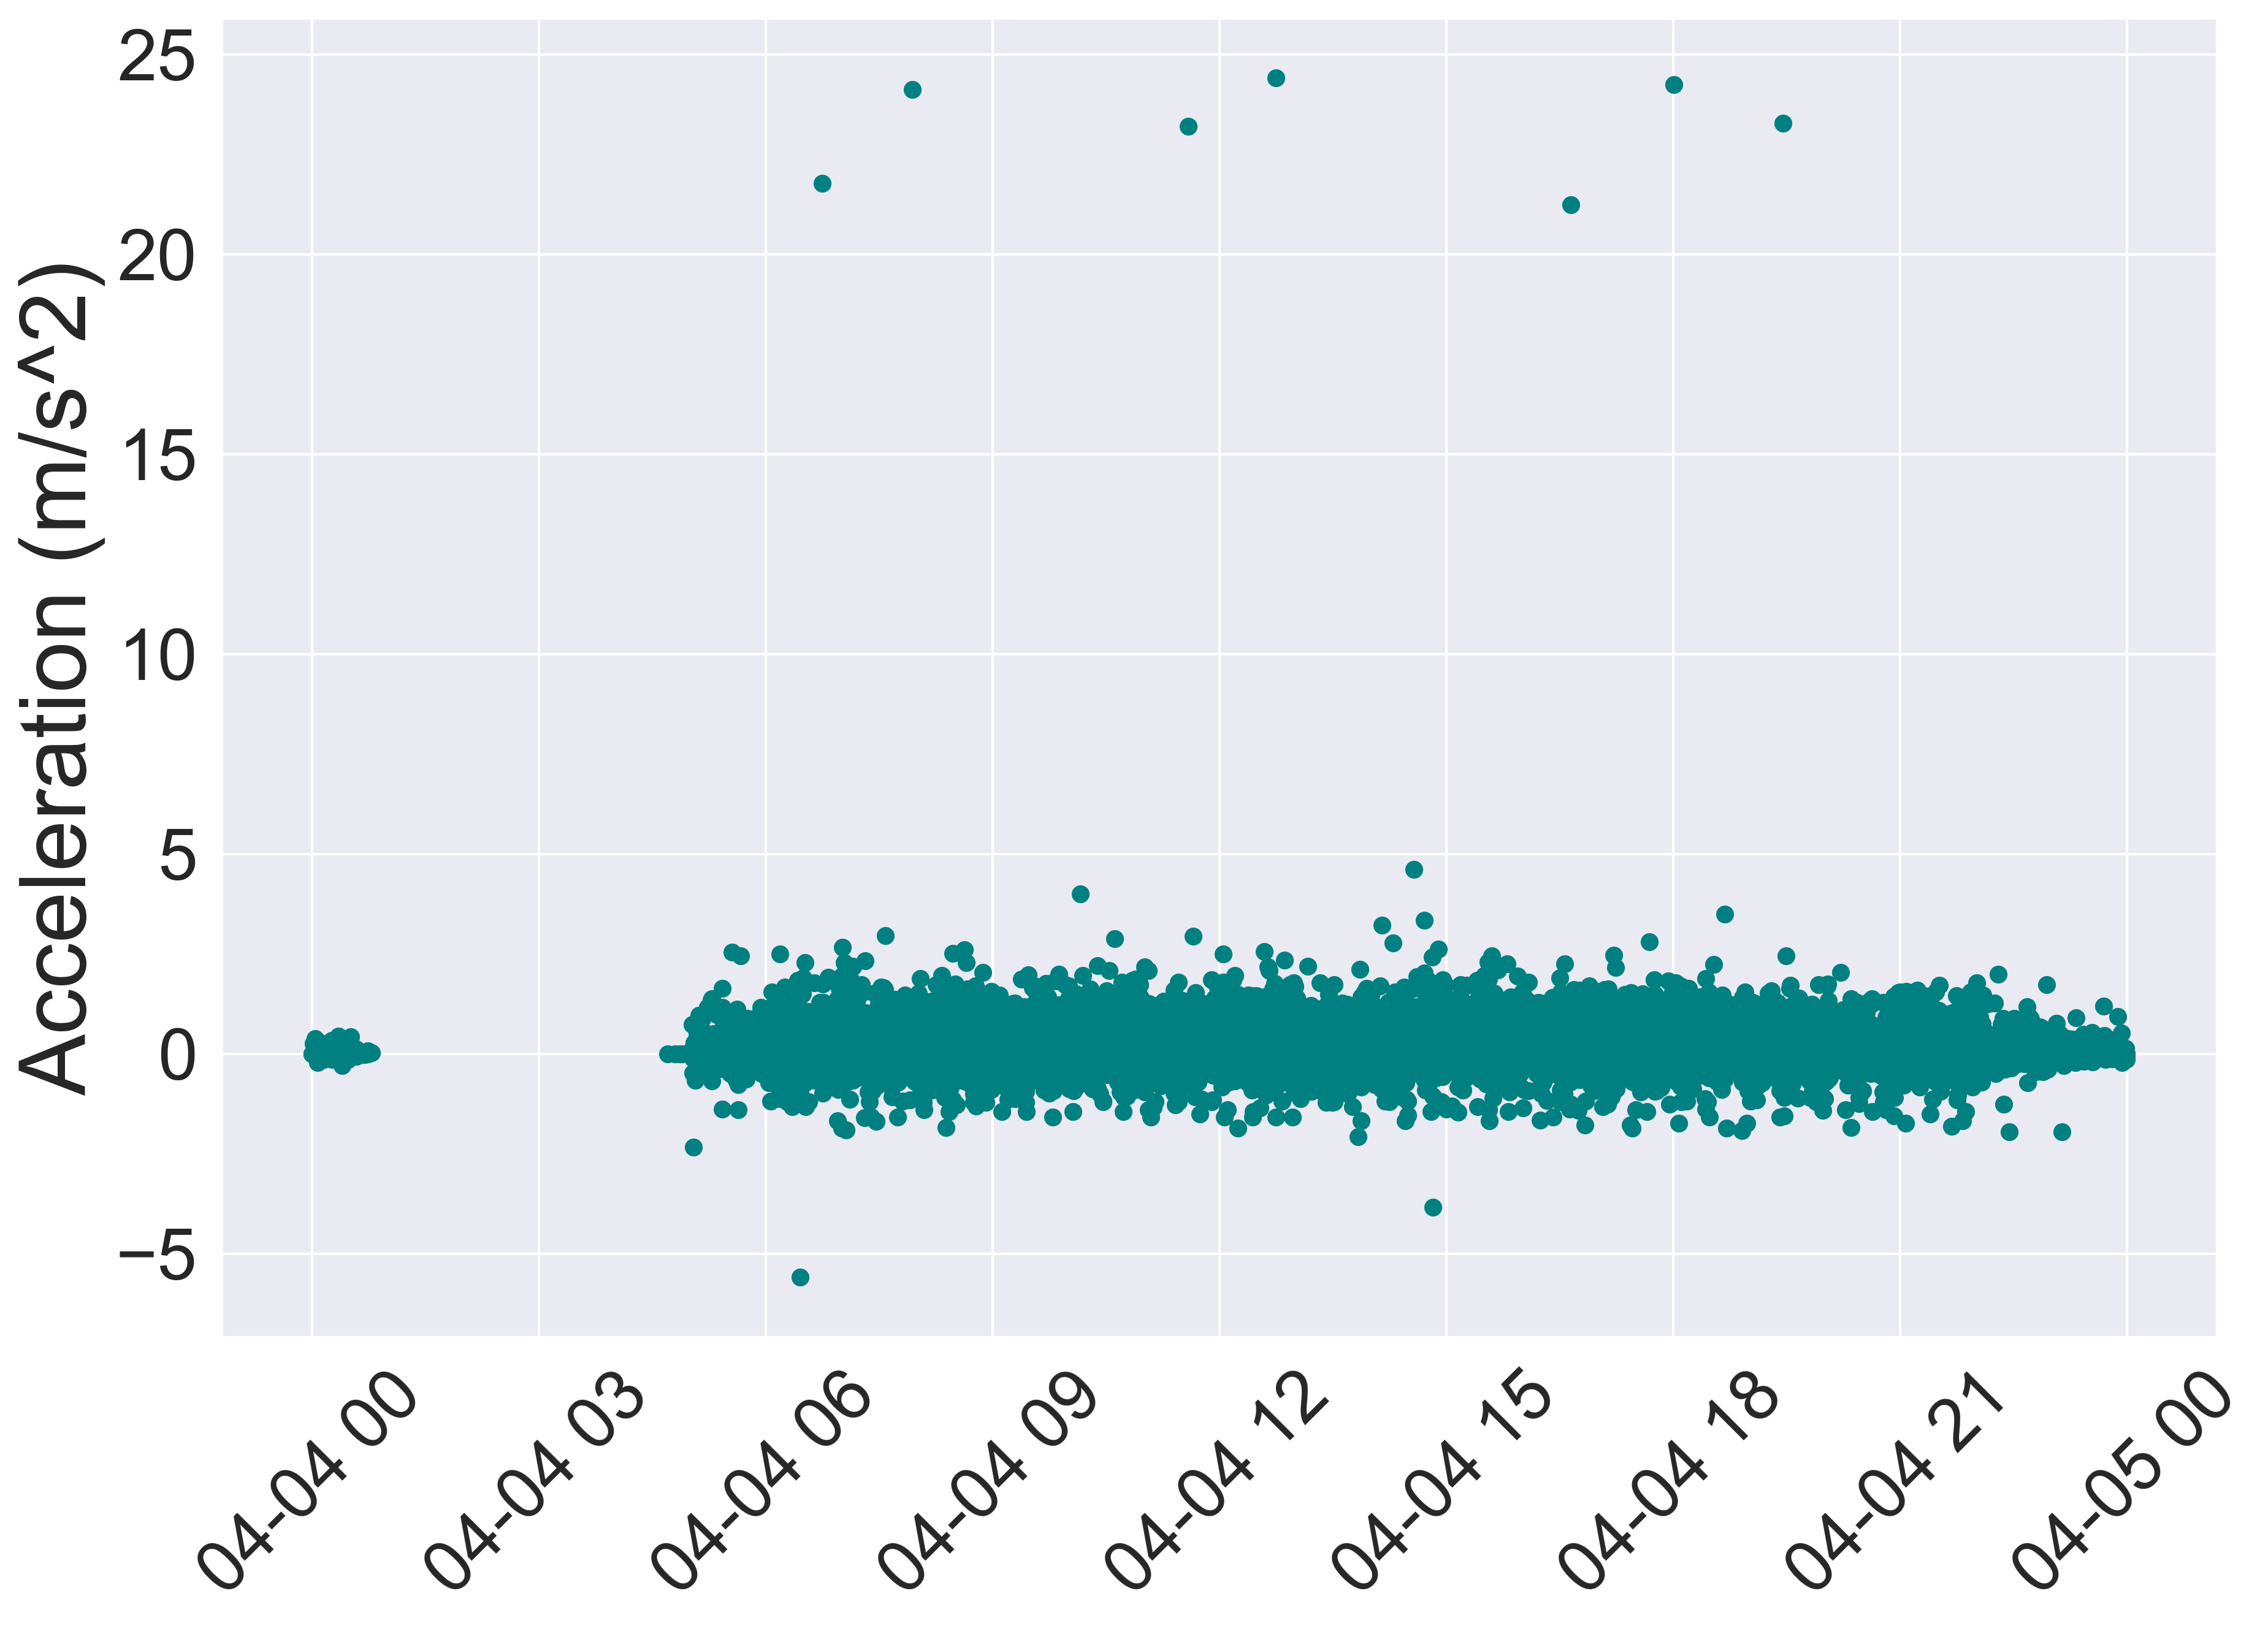

In [204]:
figure(figsize=(14, 9.5), dpi=300)
plt.plot_date(x=plot_data.index , y=plot_data["acc"], fmt='o', tz=None, xdate=True, ydate=False, color='teal')
plt.ylabel("Acceleration (m/s^2)", fontsize=36)
plt.xticks(fontsize=28, rotation = 45)
plt.yticks(fontsize=28)
# plt.savefig(r'../../figures/trajectories-acceleration.png', dpi=400, bbox_inches='tight')
plt.show()

In [23]:
trajectories=trajectories.reset_index()
trajectories.head()

ServiceDateTime  Unnamed: 0.1  Unnamed: 0  DateKey  \
0 2022-04-04 06:43:24             0      112564     8763   
1 2022-04-04 06:51:27             1      109326     8763   
2 2022-04-04 06:51:27             2      112565     8763   
3 2022-04-04 06:52:52             3      109327     8763   
4 2022-04-04 06:54:33             4      109328     8763   

              CalendarDate  Year  Month  OpKey Operator  RtKey  ...  Weekday  \
0  2022-04-04 00:00:00.000  2022      4      1    VATCo   3519  ...        2   
1  2022-04-04 00:00:00.000  2022      4      1    VATCo   3513  ...        2   
2  2022-04-04 00:00:00.000  2022      4      1    VATCo   3519  ...        2   
3  2022-04-04 00:00:00.000  2022      4      1    VATCo   3513  ...        2   
4  2022-04-04 00:00:00.000  2022      4      1    VATCo   3513  ...        2   

  Hour Minute  Second        Date  Daytype      time      dist      speed  \
0    6     43      24  2022-04-04  Weekday  06:43:24  0.000000   0.000000   
1    6     51      27  2022-04-04  Weekday  06:51:27  0.627342   0.000000   
2    6     51      27  2022-04-04  Weekday  06:51:27  0.000000   0.000000   
3    6     52      52  2022-04-04  Weekday  06:52:52  0.313431  13.274729   
4    6     54      33  2022-04-04  Weekday  06:54:33  0.421734  15.032101   

        acc  
0  0.000000  
1  0.000000  
2  0.000000  
3  0.069816  
4  0.007778  

[5 rows x 39 columns]

In [24]:
trajectories.sort_values(by=['ServiceDateTime','Vehicle'], ascending=True, inplace=True)

In [25]:
trajectories['Vehicle']

1062086    3303
1346943    7901
1174966    3317
1213526    3322
1213527    3322
           ... 
1245865    3325
1057256    3301
1361548    7902
1031475    3222
1245866    3325
Name: Vehicle, Length: 1361549, dtype: int64

In [26]:
#trajectories['time_delta'] = trajectories.groupby(['Vehicle', 'Date'])['ServiceDateTime'].diff()

In [27]:
trajectories['time_delta'].max()

Timedelta('0 days 20:26:36')

In [28]:
trajectories['time_delta'].median()

Timedelta('0 days 00:00:41')

In [29]:
trajectories['time_delta'].min()

Timedelta('0 days 00:00:00')

In [30]:
trajectories['time_delta'].unique()

array([         'NaT',              0,    17000000000, ...,
       12664000000000,  3338000000000, 56031000000000],
      dtype='timedelta64[ns]')

In [31]:
#trajectories.time_delta=trajectories.time_delta.astype(str).str.replace('0 days ', '')

In [32]:
#trajectories['time_delta']= pd.to_datetime(trajectories['time_delta'])

In [34]:
#trajectories['time_delta_in_seconds'] = trajectories['time_delta'].dt.hour * 3600 + trajectories['time_delta'].dt.minute * 60 + trajectories['time_delta'].dt.second

In [35]:
trajectories['time_delta_in_seconds'].unique()

array([       nan, 0.0000e+00, 1.7000e+01, ..., 1.2664e+04, 3.3380e+03,
       5.6031e+04])

In [311]:
trajectories.head()

Unnamed: 0.1  Unnamed: 0  DateKey  \
ServiceDateTime                                          
2022-04-04 06:43:24             0      112564     8763   
2022-04-04 06:51:27             1      109326     8763   
2022-04-04 06:51:27             2      112565     8763   
2022-04-04 06:52:52             3      109327     8763   
2022-04-04 06:54:33             4      109328     8763   

                                CalendarDate  Year  Month  OpKey Operator  \
ServiceDateTime                                                             
2022-04-04 06:43:24  2022-04-04 00:00:00.000  2022      4      1    VATCo   
2022-04-04 06:51:27  2022-04-04 00:00:00.000  2022      4      1    VATCo   
2022-04-04 06:51:27  2022-04-04 00:00:00.000  2022      4      1    VATCo   
2022-04-04 06:52:52  2022-04-04 00:00:00.000  2022      4      1    VATCo   
2022-04-04 06:54:33  2022-04-04 00:00:00.000  2022      4      1    VATCo   

                     RtKey  RtKey2  ... Minute Second        Date  Daytype  \
ServiceDateTime                     ...                                      
2022-04-04 06:43:24   3519    1006  ...     43     24  2022-04-04  Weekday   
2022-04-04 06:51:27   3513    3380  ...     51     27  2022-04-04  Weekday   
2022-04-04 06:51:27   3519    1006  ...     51     27  2022-04-04  Weekday   
2022-04-04 06:52:52   3513    3380  ...     52     52  2022-04-04  Weekday   
2022-04-04 06:54:33   3513    3380  ...     54     33  2022-04-04  Weekday   

                         time           time_delta time_delta_in_seconds  \
ServiceDateTime                                                            
2022-04-04 06:43:24  06:43:24                  NaN                   NaN   
2022-04-04 06:51:27  06:51:27  2022-07-21 00:08:03                 483.0   
2022-04-04 06:51:27  06:51:27  2022-07-21 00:00:00                   0.0   
2022-04-04 06:52:52  06:52:52  2022-07-21 00:01:25                  85.0   
2022-04-04 06:54:33  06:54:33  2022-07-21 00:01:41                 101.0   

                         dist      speed       acc  
ServiceDateTime                                     
2022-04-04 06:43:24  0.000000   0.000000  0.000000  
2022-04-04 06:51:27  0.627342   0.000000  0.000000  
2022-04-04 06:51:27  0.000000   0.000000  0.000000  
2022-04-04 06:52:52  0.313431  13.274729  0.069816  
2022-04-04 06:54:33  0.421734  15.032101  0.007778  

[5 rows x 40 columns]

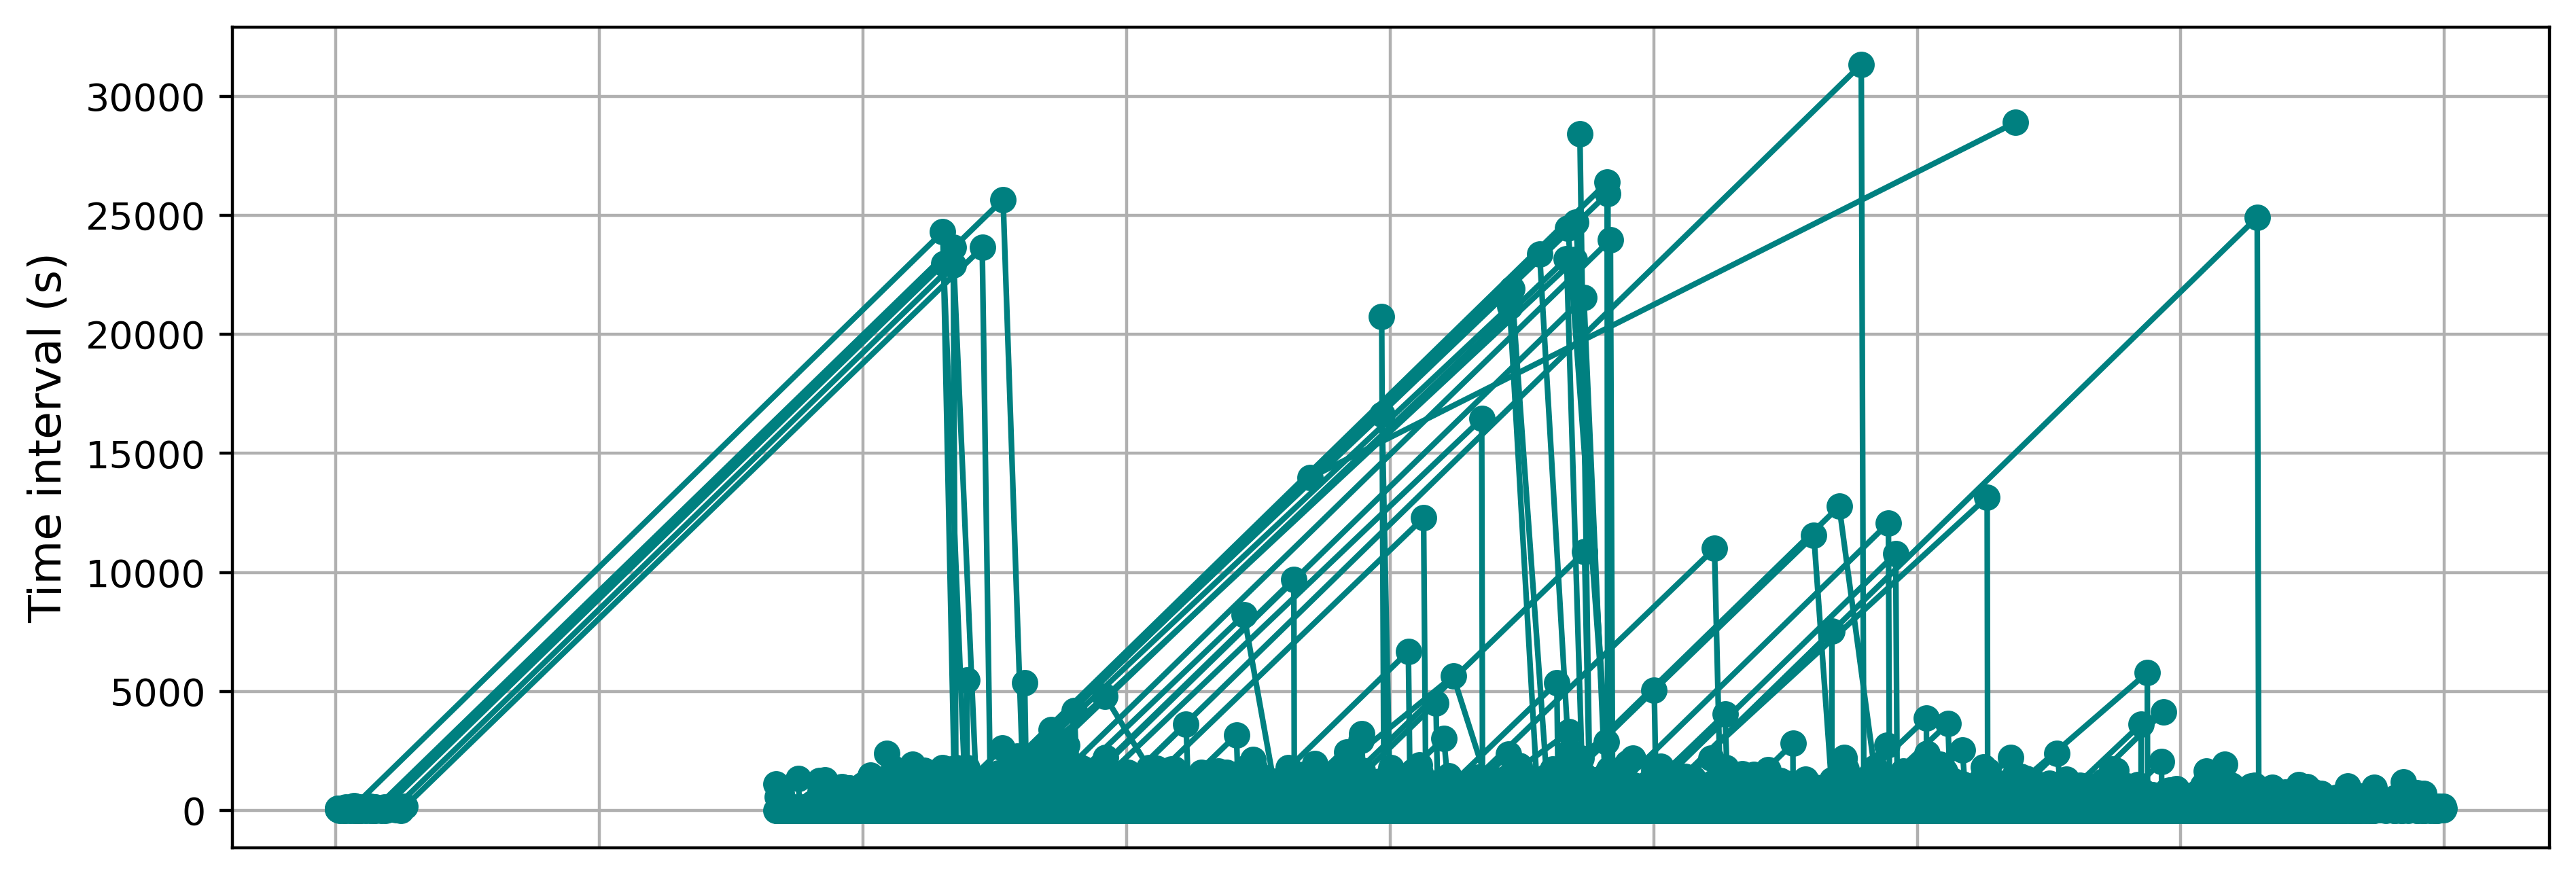

In [312]:
# set size

figure(figsize=(11, 4), dpi=400)

# Plot
vehicle=plot_data['Vehicle'].unique()
for v in vehicle:
    plot_df=plot_data[plot_data['Vehicle']==v]
    plt.plot(plot_df["time_delta_in_seconds"], marker='o', color='teal')



# Remove x-ticks
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

# Labelling 

#plt.xlabel("time")
plt.ylabel("Time interval (s)", fontsize=12)
plt.yticks(fontsize=10)
#plt.title("Pandas Time Series Plot")
plt.grid()

# Saving
plt.savefig(r'../../figures/time-intervals.png', dpi=400, bbox_inches='tight')

# Display

plt.show()

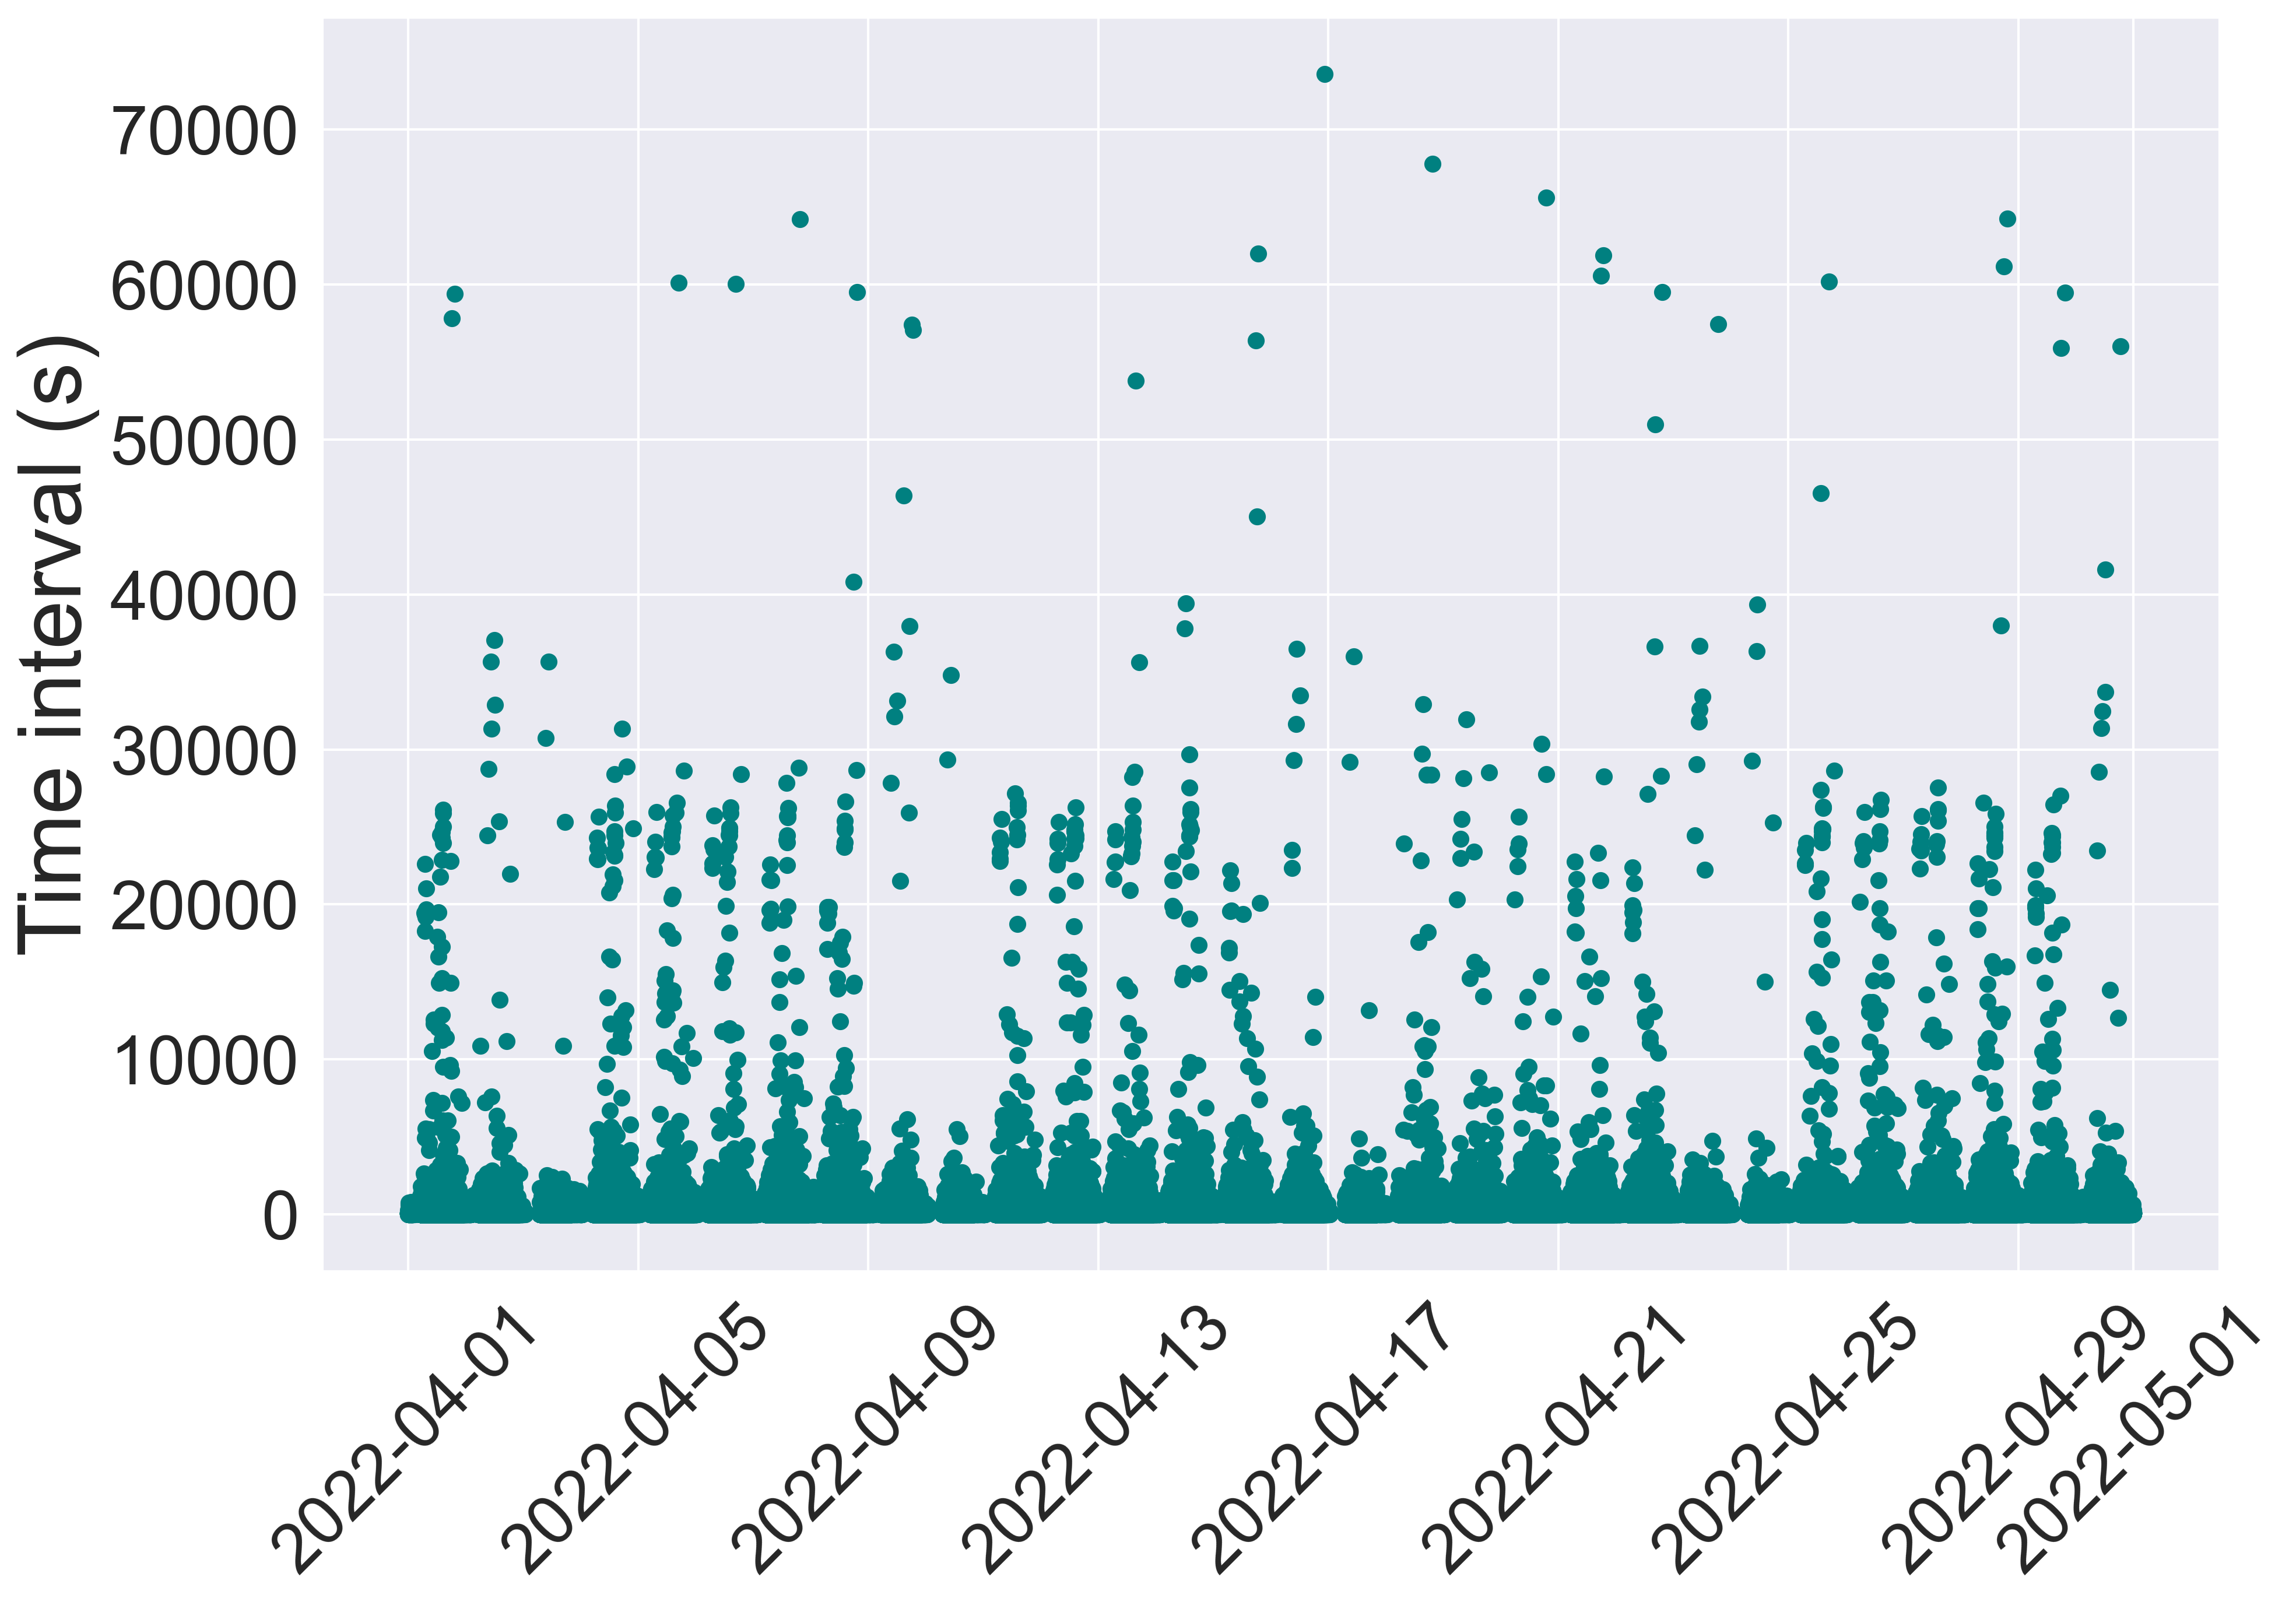

In [258]:
figure(figsize=(14, 9.5), dpi=300)
plt.plot_date(x=trajectories['ServiceDateTime']  , y=trajectories["time_delta_in_seconds"], fmt='o', tz=None, xdate=True, ydate=False, color='teal')
plt.ylabel("Time interval (s)", fontsize=36)
plt.xticks(fontsize=28, rotation = 45)
plt.yticks(fontsize=28)
#plt.savefig(r'../../figures/time-intervals.png', dpi=400, bbox_inches='tight')
plt.show()

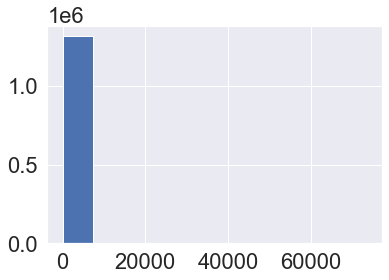

In [259]:
df_time_intervals = trajectories[trajectories['time_delta_in_seconds'] > 0]
plt.hist(df_time_intervals['time_delta_in_seconds'])
#plt.savefig(r'../../figures/hist-time-intervals.png', dpi=400, bbox_inches='tight')
plt.show()

In [264]:
len(df['Route'].unique())

49

In [275]:
trajectories.to_csv(r'../../results/computed-trajectories-v02.csv')

In [290]:
df_acc = trajectories.sort_values('acc', ascending=False)
df_acc['acc']

388111     366.432779
640285     290.453593
749058     115.547654
395478      60.633283
395361      60.573972
              ...    
1057244           NaN
1256736           NaN
1256737           NaN
1057245           NaN
1256738           NaN
Name: acc, Length: 1361549, dtype: float64

In [281]:
df_dist = trajectories.sort_values('dist', ascending=False)
df_dist['dist']

58281      18.700636
108414     15.433128
34204      15.433128
83989      15.433128
84389      15.433128
             ...    
1245847          NaN
1057244          NaN
1256736          NaN
1256737          NaN
1057245          NaN
Name: dist, Length: 1361549, dtype: float64

In [289]:
df_speed = trajectories.sort_values('speed', ascending=False)
df_speed['speed'].head(50000)

640285     1302.567192
388111      831.948441
395361      413.425971
395478      413.425971
749058      271.761947
              ...     
1179787      44.405755
1215421      44.405755
1176321      44.405755
1239187      44.405755
1070230      44.405755
Name: speed, Length: 50000, dtype: float64

In [293]:
trajectories['dist'].max()

18.700636389473715

In [310]:
trajectories['dist'].median()

0.13982343973076

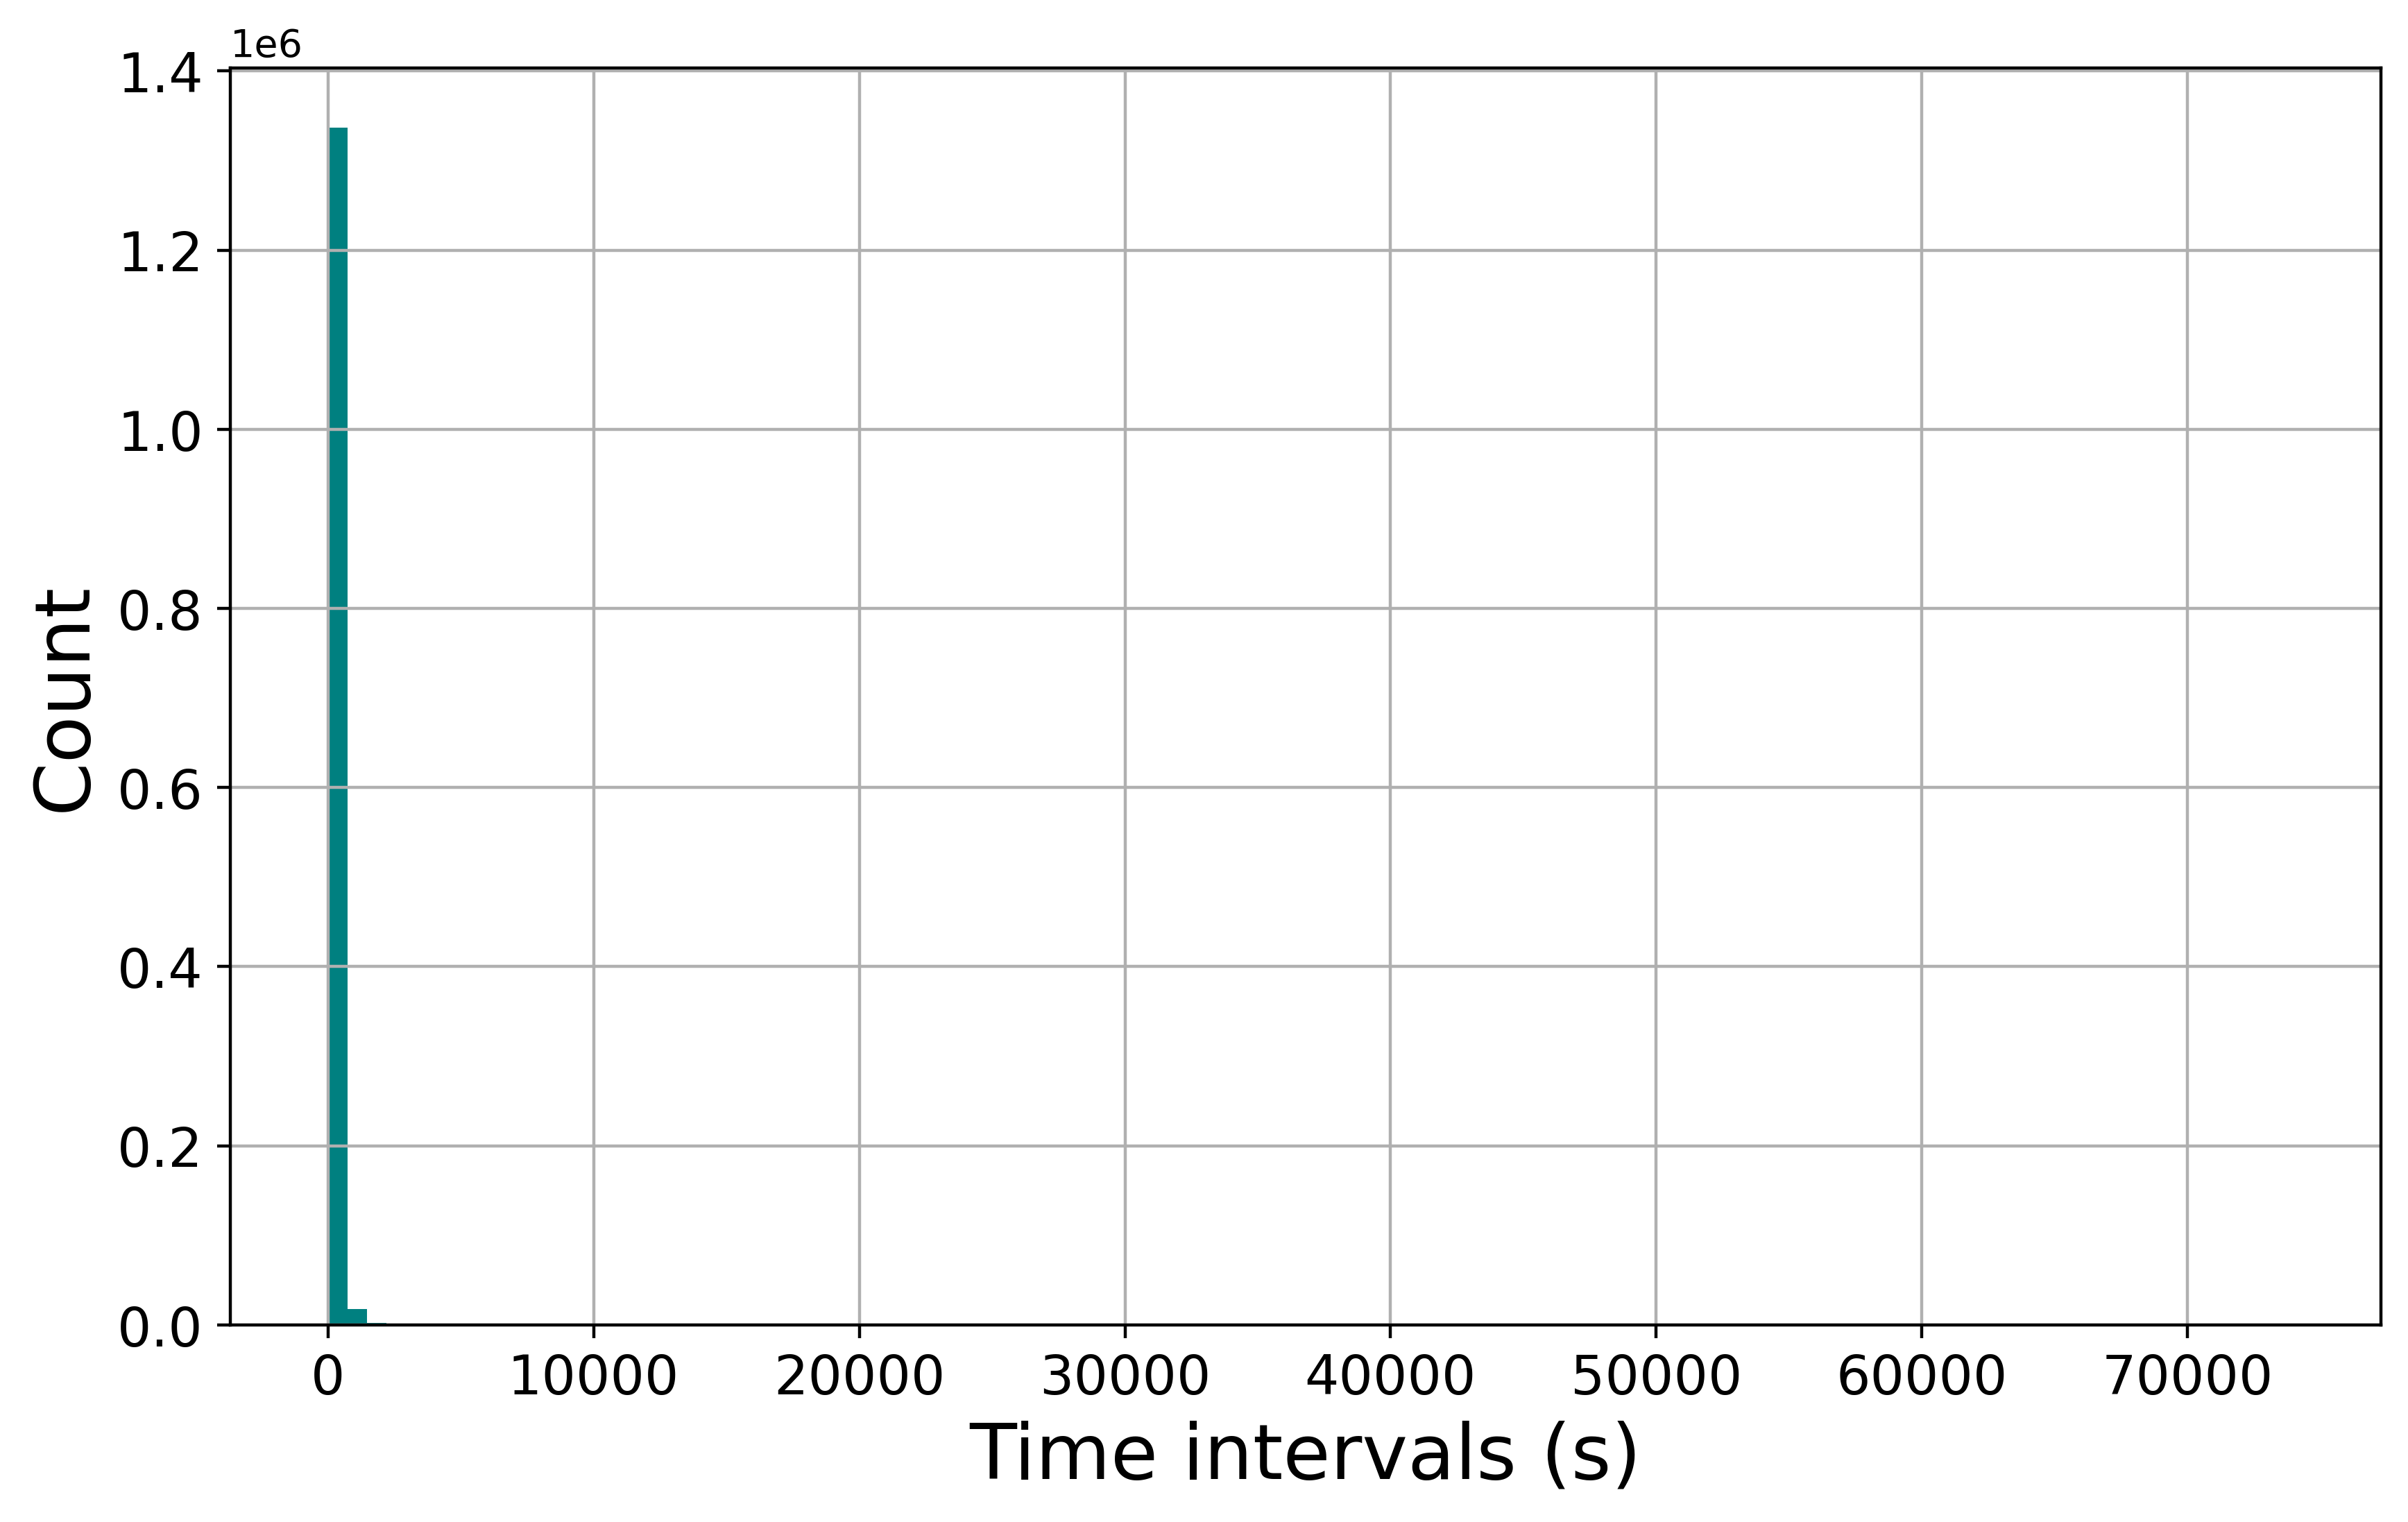

In [318]:
figure(figsize=(10, 6), dpi=400)
ax=trajectories['time_delta_in_seconds'].hist(bins=100, color='teal')
ax.set_xlabel('Time intervals (s)', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig(r'../../figures/hist-time-intervals.png', dpi=400, bbox_inches='tight')

In [315]:
trajectories['time_delta_in_seconds'].max()

73596.0

In [316]:
trajectories['time_delta_in_seconds'].median()

41.0

In [317]:
trajectories['time_delta_in_seconds'].mean()

93.28536946247958

In [323]:
df_dist_outliers=trajectories[trajectories['dist']>15]

In [324]:
df_dist_outliers

Unnamed: 0.1  Unnamed: 0  DateKey  \
ServiceDateTime                                          
2022-04-05 17:53:05         34204      206300     8764   
2022-04-18 17:13:14         58281      757850     8777   
2022-04-25 17:50:45         70610     1060393     8784   
2022-04-04 17:50:27         73742      152939     8763   
2022-04-08 06:35:13         83989      366354     8767   
2022-04-08 17:52:24         84389      366875     8767   
2022-04-01 17:51:03        108414       43654     8760   
2022-04-11 17:55:02        111686      437762     8770   
2022-04-11 08:52:46        129899      469666     8770   
2022-04-18 15:25:51        132613      757842     8777   
2022-04-29 17:55:46        144419     1273091     8788   
2022-04-12 06:30:46        325383      529847     8771   
2022-04-13 06:37:44        381295      544246     8772   
2022-04-12 06:38:18        388784      491128     8771   
2022-04-27 06:37:33        415631     1168049     8786   
2022-04-18 05:30:25        445600      787246     8777   

                                CalendarDate  Year  Month  OpKey Operator  \
ServiceDateTime                                                             
2022-04-05 17:53:05  2022-04-05 00:00:00.000  2022      4      2    SATCo   
2022-04-18 17:13:14  2022-04-18 00:00:00.000  2022      4      2    SATCo   
2022-04-25 17:50:45  2022-04-25 00:00:00.000  2022      4      2    SATCo   
2022-04-04 17:50:27  2022-04-04 00:00:00.000  2022      4      2    SATCo   
2022-04-08 06:35:13  2022-04-08 00:00:00.000  2022      4      2    SATCo   
2022-04-08 17:52:24  2022-04-08 00:00:00.000  2022      4      2    SATCo   
2022-04-01 17:51:03  2022-04-01 00:00:00.000  2022      4      2    SATCo   
2022-04-11 17:55:02  2022-04-11 00:00:00.000  2022      4      2    SATCo   
2022-04-11 08:52:46  2022-04-11 00:00:00.000  2022      4      2    SATCo   
2022-04-18 15:25:51  2022-04-18 00:00:00.000  2022      4      2    SATCo   
2022-04-29 17:55:46  2022-04-29 00:00:00.000  2022      4      2    SATCo   
2022-04-12 06:30:46  2022-04-12 00:00:00.000  2022      4      2    SATCo   
2022-04-13 06:37:44  2022-04-13 00:00:00.000  2022      4      2    SATCo   
2022-04-12 06:38:18  2022-04-12 00:00:00.000  2022      4      2    SATCo   
2022-04-27 06:37:33  2022-04-27 00:00:00.000  2022      4      2    SATCo   
2022-04-18 05:30:25  2022-04-18 00:00:00.000  2022      4      2    SATCo   

                     RtKey  RtKey2  ... Minute Second        Date  Daytype  \
ServiceDateTime                     ...                                      
2022-04-05 17:53:05   3630    1104  ...     53      5  2022-04-05  Weekday   
2022-04-18 17:13:14   3631    1104  ...     13     14  2022-04-18  Weekday   
2022-04-25 17:50:45   3631    1104  ...     50     45  2022-04-25  Weekday   
2022-04-04 17:50:27   3630    1104  ...     50     27  2022-04-04  Weekday   
2022-04-08 06:35:13   3620    3285  ...     35     13  2022-04-08  Weekday   
2022-04-08 17:52:24   3630    1104  ...     52     24  2022-04-08  Weekday   
2022-04-01 17:51:03   3630    1104  ...     51      3  2022-04-01  Weekday   
2022-04-11 17:55:02   3631    1104  ...     55      2  2022-04-11  Weekday   
2022-04-11 08:52:46   3655    1099  ...     52     46  2022-04-11  Weekday   
2022-04-18 15:25:51   3631    1104  ...     25     51  2022-04-18  Weekday   
2022-04-29 17:55:46   3631    1104  ...     55     46  2022-04-29  Weekday   
2022-04-12 06:30:46   3664    3285  ...     30     46  2022-04-12  Weekday   
2022-04-13 06:37:44   3631    1104  ...     37     44  2022-04-13  Weekday   
2022-04-12 06:38:18   3631    1104  ...     38     18  2022-04-12  Weekday   
2022-04-27 06:37:33   3645    1086  ...     37     33  2022-04-27  Weekday   
2022-04-18 05:30:25   3655    1099  ...     30     25  2022-04-18  Weekday   

                         time           time_delta time_delta_in_seconds  \
ServiceDateTime                                                            
2022-04-05 17:53:05  17:53:05  2

In [327]:
df_time_intervals_outliers=trajectories[trajectories['time_delta_in_seconds']>50000]

In [328]:
df_time_intervals_outliers

Unnamed: 0.1  Unnamed: 0  DateKey  \
ServiceDateTime                                          
2022-04-21 18:53:04       1049579      948594     8780   
2022-04-13 15:42:18       1125185      587700     8772   
2022-04-18 19:28:03       1148306      795469     8777   
2022-04-20 18:51:56       1171769      898015     8779   
2022-04-15 18:41:54       1179445      694124     8774   
2022-04-09 18:11:21       1186001      411711     8768   
2022-04-16 22:22:13       1239908      734460     8775   
2022-04-05 16:49:19       1307711      163144     8764   
2022-04-06 16:50:01       1307952      216585     8765   
2022-04-25 16:51:07       1332812     1056403     8784   
2022-04-01 18:14:07       1334372        1944     8760   
2022-04-01 19:24:26       1347071          21     8760   
2022-04-07 19:25:06       1349116      269361     8766   
2022-04-08 19:24:57       1349412      323256     8767   
2022-04-09 18:37:44       1349696      380420     8768   
2022-04-22 19:24:55       1353820      950795     8781   
2022-04-28 17:53:40       1355758     1214980     8787   
2022-04-29 17:43:24       1356050     1268769     8788   
2022-04-30 18:38:10       1356367     1326715     8789   
2022-04-15 17:50:30       1358234      646219     8774   
2022-04-21 17:47:00       1358859      900195     8780   
2022-04-22 16:20:48       1359155      952535     8781   
2022-04-23 18:40:39       1359510     1004566     8782   
2022-04-28 19:23:58       1360556     1214984     8787   
2022-04-29 19:24:38       1360853     1268774     8788   

                                CalendarDate  Year  Month  OpKey Operator  \
ServiceDateTime                                                             
2022-04-21 18:53:04  2022-04-21 00:00:00.000  2022      4      3    UMASS   
2022-04-13 15:42:18  2022-04-13 00:00:00.000  2022      4      3    UMASS   
2022-04-18 19:28:03  2022-04-18 00:00:00.000  2022      4      3    UMASS   
2022-04-20 18:51:56  2022-04-20 00:00:00.000  2022      4      3    UMASS   
2022-04-15 18:41:54  2022-04-15 00:00:00.000  2022      4      3    UMASS   
2022-04-09 18:11:21  2022-04-09 00:00:00.000  2022      4      3    UMASS   
2022-04-16 22:22:13  2022-04-16 00:00:00.000  2022      4      3    UMASS   
2022-04-05 16:49:19  2022-04-05 00:00:00.000  2022      4      1    VATCo   
2022-04-06 16:50:01  2022-04-06 00:00:00.000  2022      4      1    VATCo   
2022-04-25 16:51:07  2022-04-25 00:00:00.000  2022      4      1    VATCo   
2022-04-01 18:14:07  2022-04-01 00:00:00.000  2022      4      1    VATCo   
2022-04-01 19:24:26  2022-04-01 00:00:00.000  2022      4      1    VATCo   
2022-04-07 19:25:06  2022-04-07 00:00:00.000  2022      4      1    VATCo   
2022-04-08 19:24:57  2022-04-08 00:00:00.000  2022      4      1    VATCo   
2022-04-09 18:37:44  2022-04-09 00:00:00.000  2022      4      1    VATCo   
2022-04-22 19:24:55  2022-04-22 00:00:00.000  2022      4      1    VATCo   
2022-04-28 17:53:40  2022-04-28 00:00:00.000  2022      4      1    VATCo   
2022-04-29 17:43:24  2022-04-29 00:00:00.000  2022      4      1    VATCo   
2022-04-30 18:38:10  2022-04-30 00:00:00.000  2022      4      1    VATCo   
2022-04-15 17:50:30  2022-04-15 00:00:00.000  2022      4      1    VATCo   
2022-04-21 17:47:00  2022-04-21 00:00:00.000  2022      4      1    VATCo   
2022-04-22 16:20:48  2022-04-22 00:00:00.000  2022      4      1    VATCo   
2022-04-23 18:40:39  2022-04-23 00:00:00.000  2022      4      1    VATCo   
2022-04-28 19:23:58  2022-04-28 00:00:00.000  2022      4      1    VATCo   
2022-04-29 19:24:38  2022-04-29 00:00:00.000  2022      4      1    VATCo   

                     RtKey  RtKey2  ... Minute Second        Date  Daytype  \
ServiceDateTime                     ...                                      
2022-04-21 18:53:04   3626    1734  ...     53      4  2022-04-21  Weekday   
2022-04-13 15:42:18   3624    1737  ...     42     18  2022-04-13  Weekday   
2022-04-18 19:28:03   3624    1737  ...     28      3  2022-04